<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# MiniProject2
# Vehicle Insurance Claim Fraud Detection

Vehicle insurance fraud poses a significant financial risk to insurers, leading to increased claim costs, delayed processing, and higher premiums. Common schemes include staged accidents, phantom passengers, and inflated injury claims—all designed to extract undue payouts.

These fraudulent activities erode profitability, strain operational resources, and damage customer trust.

This project leverages data science to address the problem proactively. By analyzing patterns in historical claims data, the goal is to develop a fraud detection model that flags high-risk claims for further investigation. Early detection will reduce financial losses, streamline claims processing, and improve overall risk management.

# Data Dictionary #
- **Month**: The month in which the insurance claim was made.
- **WeekOfMonth**: The week of the month in which the insurance claim was made.
- **DayOfWeek**: The day of the week on which the insurance claim was made.
- **Make**: The manufacturer of the vehicle involved in the claim.
- **AccidentArea**: The area where the accident occurred (e.g., urban, rural).
- **DayOfWeekClaimed**: The day of the week on which the insurance claim was processed.
- **MonthClaimed**: The month in which the insurance claim was processed.
- **WeekOfMonthClaimed**: The week of the month in which the insurance claim was processed.
- **Sex**: The gender of the policyholder.
- **MaritalStatus**: The material status of the policyholder.
- **Age**: The age of the policyholder.
- **Fault**: Indicates whether the policyholder was at fault in the accident.
- **PolicyType**: The type of insurance policy (e.g., comprehensive, third-party).
- **VehicleCategory**: The category of the vehicle (e.g., sedan, SUV).
- **VehiclePrice**: The price of vehicle.
- **FraudFound_P**: Indicates whether fraud was detected in the insurance claim.
- **PolicyNumber**: The unique identifier for the insurance policy.
- **RepNumber**: The unique identifier for the insurance representative handling the claim.
- **Deductible**: The amount that the policy holder must pay out of pocket before the insurance company pays the remaining costs.
- **DriverRating**: The rating of the driver, often based on driving history or other factors.
- **Days_Policy_Accident**: The number of days since the policy was issued until the accident occurred.
- **Days_Policy_Claim**: The number of days since the policy was issued until the claim was made.
- **PastNumberOfClaims**: The number of claims previously made by the policyholder.
- **AgeOfVehicle**: The age of the vehicle involved in the claim.
- **AgeOfPolicyHolder**: The age of the policyholder.
- **PoliceReportFiled**: Indicates whether a police report was filed for the accident.
- **WitnessPresent**: Indicates whether a witness was present at the scene of the accident.
- **AgentType**: The type of insurance agent handling the policy (e.g., internal, external)
- **NumberOfSuppliments**: The number of supplementary documents or claims related to the main claim, categorized into ranges.
- **AddressChange_Claim**: Indicates whether the address of the policyholder was changed at the time of the claim, categorized into ranges.
- **NumberOfCars**: The number of cars insured under the policy, categorized into ranges.
- **Year**: The year in which the claim was made or processed.
- **BasePolicy**: The base policy type (e.g., Liability, Collision, All Perils).

### 1. Load Data

The dataset includes detailed information on vehicles (such as attributes, model, and accident history) along with insurance policy details (including policy type, tenure, and coverage). The objective is to identify whether a given claim is fraudulent, as indicated by the target variable FraudFound_P.

In [5]:
#!pip install xgboost

In [6]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score

# Encoding
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [7]:
fraud_csv = 'C:/Yan/Labs/MiniProject2/fraud.csv'
fraud = pd.read_csv(fraud_csv)

### 2. EDA

- Explore dataset. Clean data (if required)
- Find features to predict class

In [9]:
fraud.head().T

0                  1                  2  \
Month                               Dec                Jan                Oct   
WeekOfMonth                           5                  3                  5   
DayOfWeek                     Wednesday          Wednesday             Friday   
Make                              Honda              Honda              Honda   
AccidentArea                      Urban              Urban              Urban   
DayOfWeekClaimed                Tuesday             Monday           Thursday   
MonthClaimed                        Jan                Jan                Nov   
WeekOfMonthClaimed                    1                  4                  2   
Sex                              Female               Male               Male   
MaritalStatus                    Single             Single            Married   
Age                                  21                 34                 47   
Fault                     Policy Holder      Policy Holder      Policy Holder   
PolicyType            Sport - Liability  Sport - Collision  Sport - Collision   
VehicleCategory                   Sport              Sport              Sport   
VehiclePrice            more than 69000    more than 69000    more than 69000   
FraudFound_P                          0                  0                  0   
PolicyNumber                          1                  2                  3   
RepNumber                            12                 15                  7   
Deductible                          300                400                400   
DriverRating                          1                  4                  3   
Days_Policy_Accident       more than 30       more than 30       more than 30   
Days_Policy_Claim          more than 30       more than 30       more than 30   
PastNumberOfClaims                 none               none                  1   
AgeOfVehicle                    3 years            6 years            7 years   
AgeOfPolicyHolder              26 to 30           31 to 35           41 to 50   
PoliceReportFiled                    No                Yes                 No   
WitnessPresent                       No                 No                 No   
AgentType                      External           External           External   
NumberOfSuppliments                none               none               none   
AddressChange_Claim              1 year          no change          no change   
NumberOfCars                     3 to 4          1 vehicle          1 vehicle   
Year                               1994               1994               1994   
BasePolicy                    Liability          Collision          Collision   

                                      3                  4  
Month                               Jun                Jan  
WeekOfMonth                           2                  5  
DayOfWeek                      Saturday             Monday  
Make                             Toyota              Honda  
AccidentArea                      Rural              Urban  
DayOfWeekClaimed                 Friday            Tuesday  
MonthClaimed                        Jul                Feb  
WeekOfMonthClaimed                    1                  2  
Sex                                Male             Female  
MaritalStatus                   Married             Single  
Age                                  65                 27  
Fault                       Third Party        Third Party  
PolicyType            Sedan - Liability  Sport - Collision  
VehicleCategory                   Sport              Sport  
VehiclePrice             20000 to 29000    more than 69000  
FraudFound_P                          0                  0  
PolicyNumber                          4                  5  
RepNumber                             4                  3  
Deductible                          400                400  
DriverRating                          2                  1  
Da

In [10]:
fraud.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [11]:
fraud.duplicated().sum()

0

In [12]:
# Summarize the characteristic of dataset
def summarize(DataFrame):
    
    summary = pd.DataFrame()
    
    # Data Type
    summary['Data Type'] = DataFrame.dtypes
    # N Unique
    summary['N Unique'] = DataFrame.nunique()
    # Unique
    summary['Unique'] = DataFrame.apply(lambda x: x.unique().tolist())
    # Max
    summary['Max'] = DataFrame.apply(lambda x: x.max() if pd.api.types.is_numeric_dtype(x) else '-')
    # Min
    summary['Min'] = DataFrame.apply(lambda x: x.min() if pd.api.types.is_numeric_dtype(x) else '-')
    
    # Measures of Central Tendency: Mean, Median, Mode 
    summary['Mean'] = DataFrame.apply(lambda x: round(x.mean(), 2) if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Median'] = DataFrame.apply(lambda x: x.median() if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Mode'] = DataFrame.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else '-')
    
    # Measures of Dispersion: Range, Variance, Standard Deviation
    summary['Range'] = DataFrame.apply(lambda x: x.max() - x.min() if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Variance'] = DataFrame.apply(lambda x: x.var() if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Standard Deviation'] = DataFrame.apply(lambda x: x.std() if pd.api.types.is_numeric_dtype(x) else '-')
    
    # Measures of Shape: Skewness, Kurtosis
    summary['Skewness'] = DataFrame.apply(lambda x: round(x.skew(), 2) if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Kurtosis'] = DataFrame.apply(lambda x: round(x.kurt(), 2) if pd.api.types.is_numeric_dtype(x) else '-')
    
    return summary

In [13]:
summary = summarize(fraud)
summary

Data Type  N Unique  \
Month                   object        12   
WeekOfMonth              int64         5   
DayOfWeek               object         7   
Make                    object        19   
AccidentArea            object         2   
DayOfWeekClaimed        object         8   
MonthClaimed            object        13   
WeekOfMonthClaimed       int64         5   
Sex                     object         2   
MaritalStatus           object         4   
Age                      int64        66   
Fault                   object         2   
PolicyType              object         9   
VehicleCategory         object         3   
VehiclePrice            object         6   
FraudFound_P             int64         2   
PolicyNumber             int64     15420   
RepNumber                int64        16   
Deductible               int64         4   
DriverRating             int64         4   
Days_Policy_Accident    object         5   
Days_Policy_Claim       object         4   
PastNumberOfClaims      object         4   
AgeOfVehicle            object         8   
AgeOfPolicyHolder       object         9   
PoliceReportFiled       object         2   
WitnessPresent          object         2   
AgentType               object         2   
NumberOfSuppliments     object         4   
AddressChange_Claim     object         5   
NumberOfCars            object         5   
Year                     int64         3   
BasePolicy              object         3   

                                                                 Unique  \
Month                 [Dec, Jan, Oct, Jun, Feb, Nov, Apr, Mar, Aug, ...   
WeekOfMonth                                             [5, 3, 2, 4, 1]   
DayOfWeek             [Wednesday, Friday, Saturday, Monday, Tuesday,...   
Make                  [Honda, Toyota, Ford, Mazda, Chevrolet, Pontia...   
AccidentArea                                             [Urban, Rural]   
DayOfWeekClaimed      [Tuesday, Monday, Thursday, Friday, Wednesday,...   
MonthClaimed          [Jan, Nov, Jul, Feb, Mar, Dec, Apr, Aug, May, ...   
WeekOfMonthClaimed                                      [1, 4, 2, 3, 5]   
Sex                                                      [Female, Male]   
MaritalStatus                        [Single, Married, Widow, Divorced]   
Age                   [21, 34, 47, 65, 27, 20, 36, 0, 30, 42, 71, 52...   
Fault                                      [Policy Holder, Third Party]   
PolicyType            [Sport - Liability, Sport - Collision, Sedan -...   
VehicleCategory                                 [Sport, Utility, Sedan]   
VehiclePrice          [more than 69000, 20000 to 29000, 30000 to 390...   
FraudFound_P                                                     [0, 1]   
PolicyNumber          [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
RepNumber             [12, 15, 7, 4, 3, 14, 1, 13, 11, 16, 6, 2, 8, ...   
Deductible                                         [300, 400, 500, 700]   
DriverRating                                               [1, 4, 3, 2]   
Days_Policy_Accident    [more than 30, 15 to 30, none, 1 to 7, 8 to 15]   
Days_Policy_Claim               [more than 30, 15 to 30, 8 to 15, none]   
PastNumberOfClaims                       [none, 1, 2 to 4, more than 4]   
AgeOfVehicle          [3 years, 6 years, 7 years, more than 7, 5 yea...   
AgeOfPolicyHolder     [26 to 30, 31 to 35, 41 to 50, 51 to 65, 21 to...   
PoliceReportFiled                                             [No, Yes]   
WitnessPresent                                                [No, Yes]   
AgentType                                          [External, Internal]   
NumberOfSuppliments                 [none, more than 5, 3 to 5, 1 to 2]   
AddressChange_Claim   [1 year, no change, 4 to 8 years, 2 to 3 years...   
NumberOfCars          [3 to 4, 1 vehicle, 2 vehicles, 5 to 8, more t...   
Year                                                 [1994, 1995, 1996]   
BasePolicy                           [Liability, 

- There are no missing values in the dataset.

- The "PolicyNumber" is an identification number and can be dropped.

- The features "Sex", "PoliceReportFiled", and "WitnessPresent" are Boolean and should be converted to 0 or 1.

- The features "AccidentArea", "Fault", and "AgentType" each have only two unique values, so they can also be converted to 0 or 1.

- The "Age" feature has a minimum value of 0, which is nonsensical and needs to be addressed.

- The features "FraudFound_P" and "Deductible" are highly skewed, as their skewness falls outside the range of -0.5 to 0.5.

- The features "WeekOfMonth", "WeekOfMonthClaimed", "FraudFound_P", "Deductible", and "DriverRating" show high kurtosis, with values outside the range of -1 to 1.


In [15]:
pd.set_option('display.max_colwidth', None)
summary['Unique']

Month                                                                                                                                                                                                                                                                                                                                                                    [Dec, Jan, Oct, Jun, Feb, Nov, Apr, Mar, Aug, Jul, May, Sep]
WeekOfMonth                                                                                                                                                                                                                                                                                                                                                                                                           [5, 3, 2, 4, 1]
DayOfWeek                                                                                                                                                   

- "DayOfWeekClaimed", "MonthClaimed" contains a 0

In [17]:
# Check DayOfWeekClaimed == 0
fraud[fraud['DayOfWeekClaimed'] == '0']

Month  WeekOfMonth DayOfWeek   Make AccidentArea DayOfWeekClaimed  \
1516   Jul            2    Monday  Honda        Rural                0   

     MonthClaimed  WeekOfMonthClaimed   Sex MaritalStatus  ...  AgeOfVehicle  \
1516            0                   1  Male        Single  ...           new   

     AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
1516          16 to 17                No             No  External   

      NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
1516                 none            no change     1 vehicle  1994  All Perils  

[1 rows x 33 columns]

In [18]:
# Check DayOfWeekClaimed == 0
fraud[fraud['MonthClaimed'] == '0']

Month  WeekOfMonth DayOfWeek   Make AccidentArea DayOfWeekClaimed  \
1516   Jul            2    Monday  Honda        Rural                0   

     MonthClaimed  WeekOfMonthClaimed   Sex MaritalStatus  ...  AgeOfVehicle  \
1516            0                   1  Male        Single  ...           new   

     AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
1516          16 to 17                No             No  External   

      NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
1516                 none            no change     1 vehicle  1994  All Perils  

[1 rows x 33 columns]

In [19]:
# Drop DayOfWeekClaimed & MonthClaimed == 0, since the 0 in the same row and only one row, so we can drop it
fraud = fraud[~(fraud['MonthClaimed']=='0')]

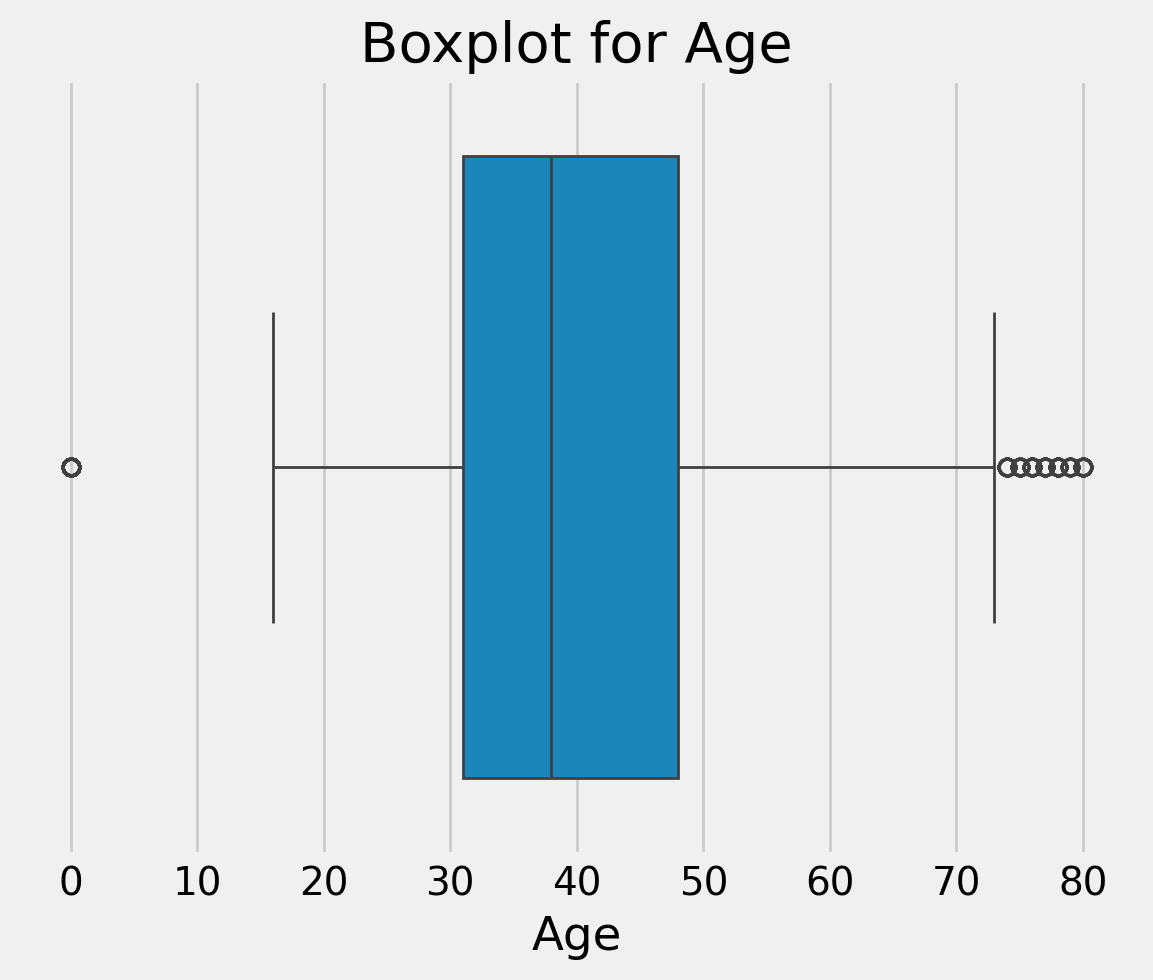

In [20]:
# Create a boxplot for the 'Age' column
sns.boxplot(x=fraud['Age'])

# Show the plot
plt.title('Boxplot for Age')
plt.show()

In [21]:
# Check Age == 0
print(fraud[fraud['Age']==0].shape)
fraud[fraud['Age']==0].sample(3)

(319, 33)


Month  WeekOfMonth DayOfWeek   Make AccidentArea DayOfWeekClaimed  \
58      May            1    Monday  Honda        Rural        Wednesday   
12251   Sep            4  Saturday  Honda        Urban           Friday   
6938    Feb            3    Sunday  Honda        Urban        Wednesday   

      MonthClaimed  WeekOfMonthClaimed   Sex MaritalStatus  ...  AgeOfVehicle  \
58             May                   4  Male        Single  ...           new   
12251          Oct                   3  Male        Single  ...           new   
6938           Mar                   2  Male        Single  ...           new   

      AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
58             16 to 17                No             No  External   
12251          16 to 17                No             No  External   
6938           16 to 17                No             No  External   

       NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  \
58                    none            no change     1 vehicle  1994   
12251                 none            no change     1 vehicle  1996   
6938                  none            no change     1 vehicle  1995   

       BasePolicy  
58      Liability  
12251  All Perils  
6938   All Perils  

[3 rows x 33 columns]

In [22]:
# Analysis row with Age == 0
fraud[fraud['Age']==0]['AgeOfPolicyHolder'].unique() #Result = array(['16 to 17'], dtype=object)

array(['16 to 17'], dtype=object)

In [23]:
# Because the row with Age == 0, only appear in row with AgeOfPolicyHolder == '16 to 17', i will impute with 16.5
fraud['Age'] = fraud['Age'].replace({0:16.5})

In [24]:
# Drop PolicyNumber
fraud = fraud.drop(columns='PolicyNumber')

In [25]:
fraud.shape

(15419, 32)

In [26]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15419 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15419 non-null  object 
 1   WeekOfMonth           15419 non-null  int64  
 2   DayOfWeek             15419 non-null  object 
 3   Make                  15419 non-null  object 
 4   AccidentArea          15419 non-null  object 
 5   DayOfWeekClaimed      15419 non-null  object 
 6   MonthClaimed          15419 non-null  object 
 7   WeekOfMonthClaimed    15419 non-null  int64  
 8   Sex                   15419 non-null  object 
 9   MaritalStatus         15419 non-null  object 
 10  Age                   15419 non-null  float64
 11  Fault                 15419 non-null  object 
 12  PolicyType            15419 non-null  object 
 13  VehicleCategory       15419 non-null  object 
 14  VehiclePrice          15419 non-null  object 
 15  FraudFound_P          15

In [27]:
fraud_counts = fraud['FraudFound_P'].value_counts(normalize=True)
fraud_counts

FraudFound_P
0    0.940139
1    0.059861
Name: proportion, dtype: float64

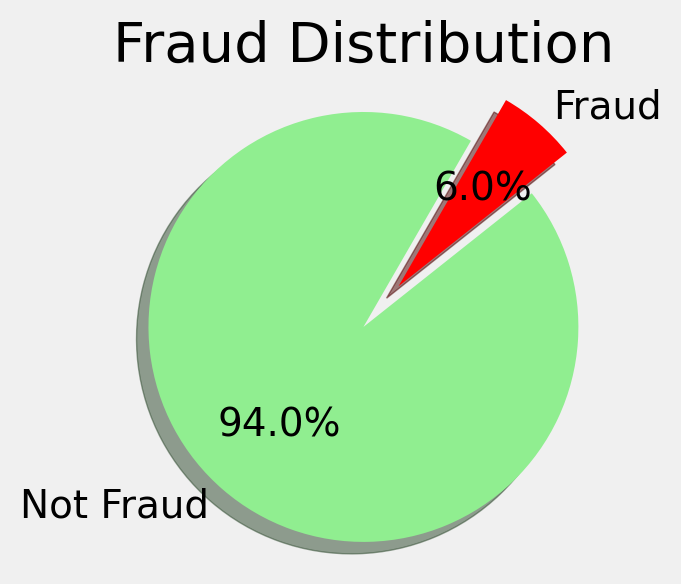

In [28]:
labels = ['Not Fraud' if i == 0 else 'Fraud' for i in fraud_counts.index]
plt.figure(figsize=(3, 3))
explode = (0, 0.25)
plt.pie(fraud_counts.values, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=60, colors=['lightgreen', 'red'])
plt.title('Fraud Distribution')
plt.axis('equal')  # Ensures pie is circular
plt.show()

- The Target Variable "Fraud_Found_P" is **highly imbalanced**.

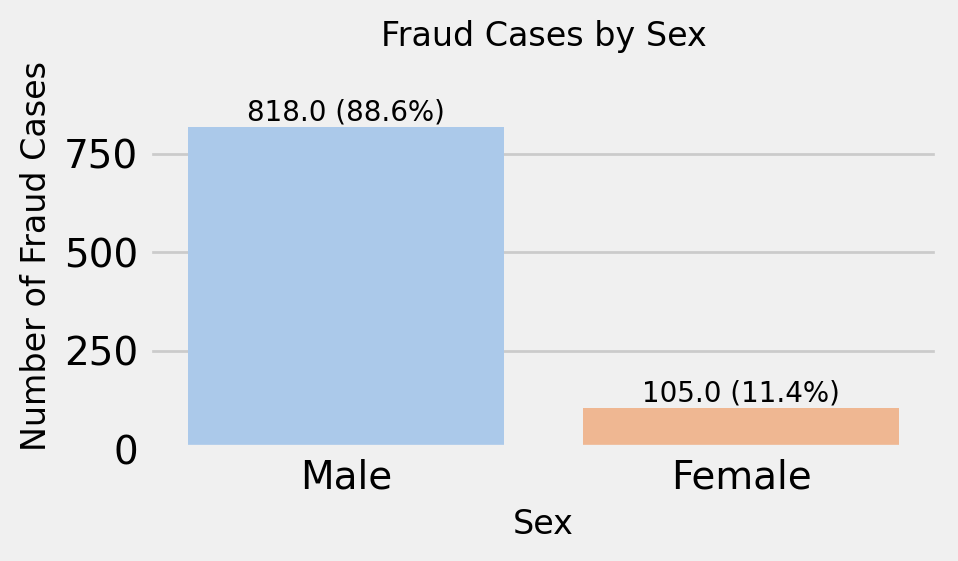

In [30]:
# Fraud Dection by Sex

# Step 1: Filter fraud cases
fraud_1 = fraud[fraud['FraudFound_P'] == 1]

# Step 2: Create countplot
plt.figure(figsize=(5, 3))
ax = sns.countplot(data=fraud_1, x='Sex', palette='pastel')

# Step 3: Add count + percent labels on bars
total = len(fraud_1)
for bar in ax.patches:
    count = bar.get_height()
    percent = 100 * count / total
    label = f'{count} ({percent:.1f}%)'
    ax.text(bar.get_x() + bar.get_width()/2,
            count + 1, label,
            ha='center', va='bottom', fontsize=10)

# Step 4: Customize appearance
plt.title('Fraud Cases by Sex', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.ylim(0, max(p.get_height() for p in ax.patches) * 1.2)
plt.tight_layout()
plt.show()


- The data shows that men are involved in more fraud cases than women.

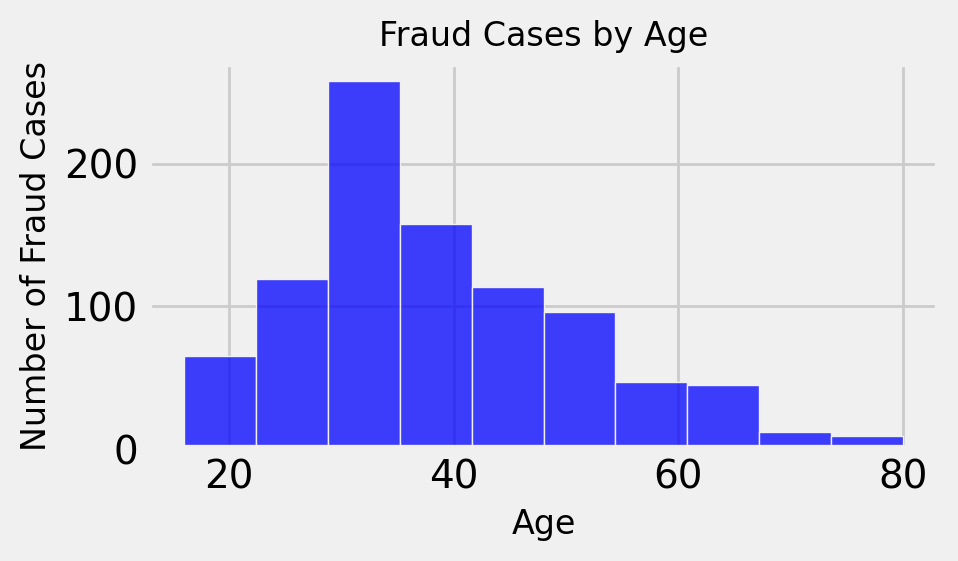

In [32]:
# Fraud Detection by Age
fraud_1 = fraud[fraud['FraudFound_P'] == 1]

# Plot histogram of Age
plt.figure(figsize=(5, 3))
sns.histplot(data=fraud_1, x='Age', bins=10, kde=False, color='blue')

plt.title('Fraud Cases by Age', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.tight_layout()
plt.show()

- Fraud is most frequently detected among teenagers. Teenagers have weak financial power as they have not yet started their economic activities.

In [34]:
# Default (vertical + sort by percentage)
def plot_fraud_percentage_bar(data, group_col, target_col='FraudFound_P',
                              sort_by='percentage', title=None, figsize=(16, 8),
                              horizontal=False):
    """
    Plots fraud percentage and count for any categorical column.

    Parameters:
    - data: DataFrame
    - group_col: column to group by (e.g., 'Make')
    - target_col: binary column indicating fraud (default='FraudFound_P')
    - sort_by: 'percentage', 'count', or None
    - title: optional custom plot title
    - figsize: figure size
    - horizontal: if True, plot horizontal bars
    """

    # Group and calculate
    grouped = data.groupby(group_col)[target_col]
    fraud_count = grouped.sum()
    total_count = grouped.count()
    fraud_pct = (fraud_count / total_count) * 100

    # Create DataFrame
    df = pd.DataFrame({
        group_col: fraud_count.index,
        'FraudCount': fraud_count.values,
        'TotalCount': total_count.values,
        'FraudPercentage': fraud_pct.values
    })

    # Sort if requested
    if sort_by == 'percentage':
        df = df.sort_values('FraudPercentage', ascending=False)
    elif sort_by == 'count':
        df = df.sort_values('FraudCount', ascending=False)
    # else: keep original order

    # Plot
    plt.figure(figsize=figsize)
    
    if horizontal:
        ax = sns.barplot(data=df, y=group_col, x='FraudPercentage', palette='viridis')
        for bar, count, pct in zip(ax.patches, df['FraudCount'], df['FraudPercentage']):
            width = bar.get_width()
            label = f'{int(count)} ({pct:.1f}%)'
            ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                    label, va='center', fontsize=12)
        plt.xlabel('Fraud Percentage (%)')
        plt.ylabel(group_col)
    else:
        ax = sns.barplot(data=df, x=group_col, y='FraudPercentage', palette='viridis')
        for bar, count, pct in zip(ax.patches, df['FraudCount'], df['FraudPercentage']):
            height = bar.get_height()
            label = f'{int(count)} ({pct:.1f}%)'
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.3,
                    label, ha='center', va='bottom', fontsize=8)
        plt.ylabel('Fraud Percentage (%)', fontsize=18)
        plt.xlabel(group_col, fontsize=18)
        plt.xticks(rotation=45, ha='right', fontsize=10)

    # Final touches
    plt.title(title or f'Fraud Count and Percentage by {group_col}', fontsize=20)
    plt.tight_layout()
    plt.show()


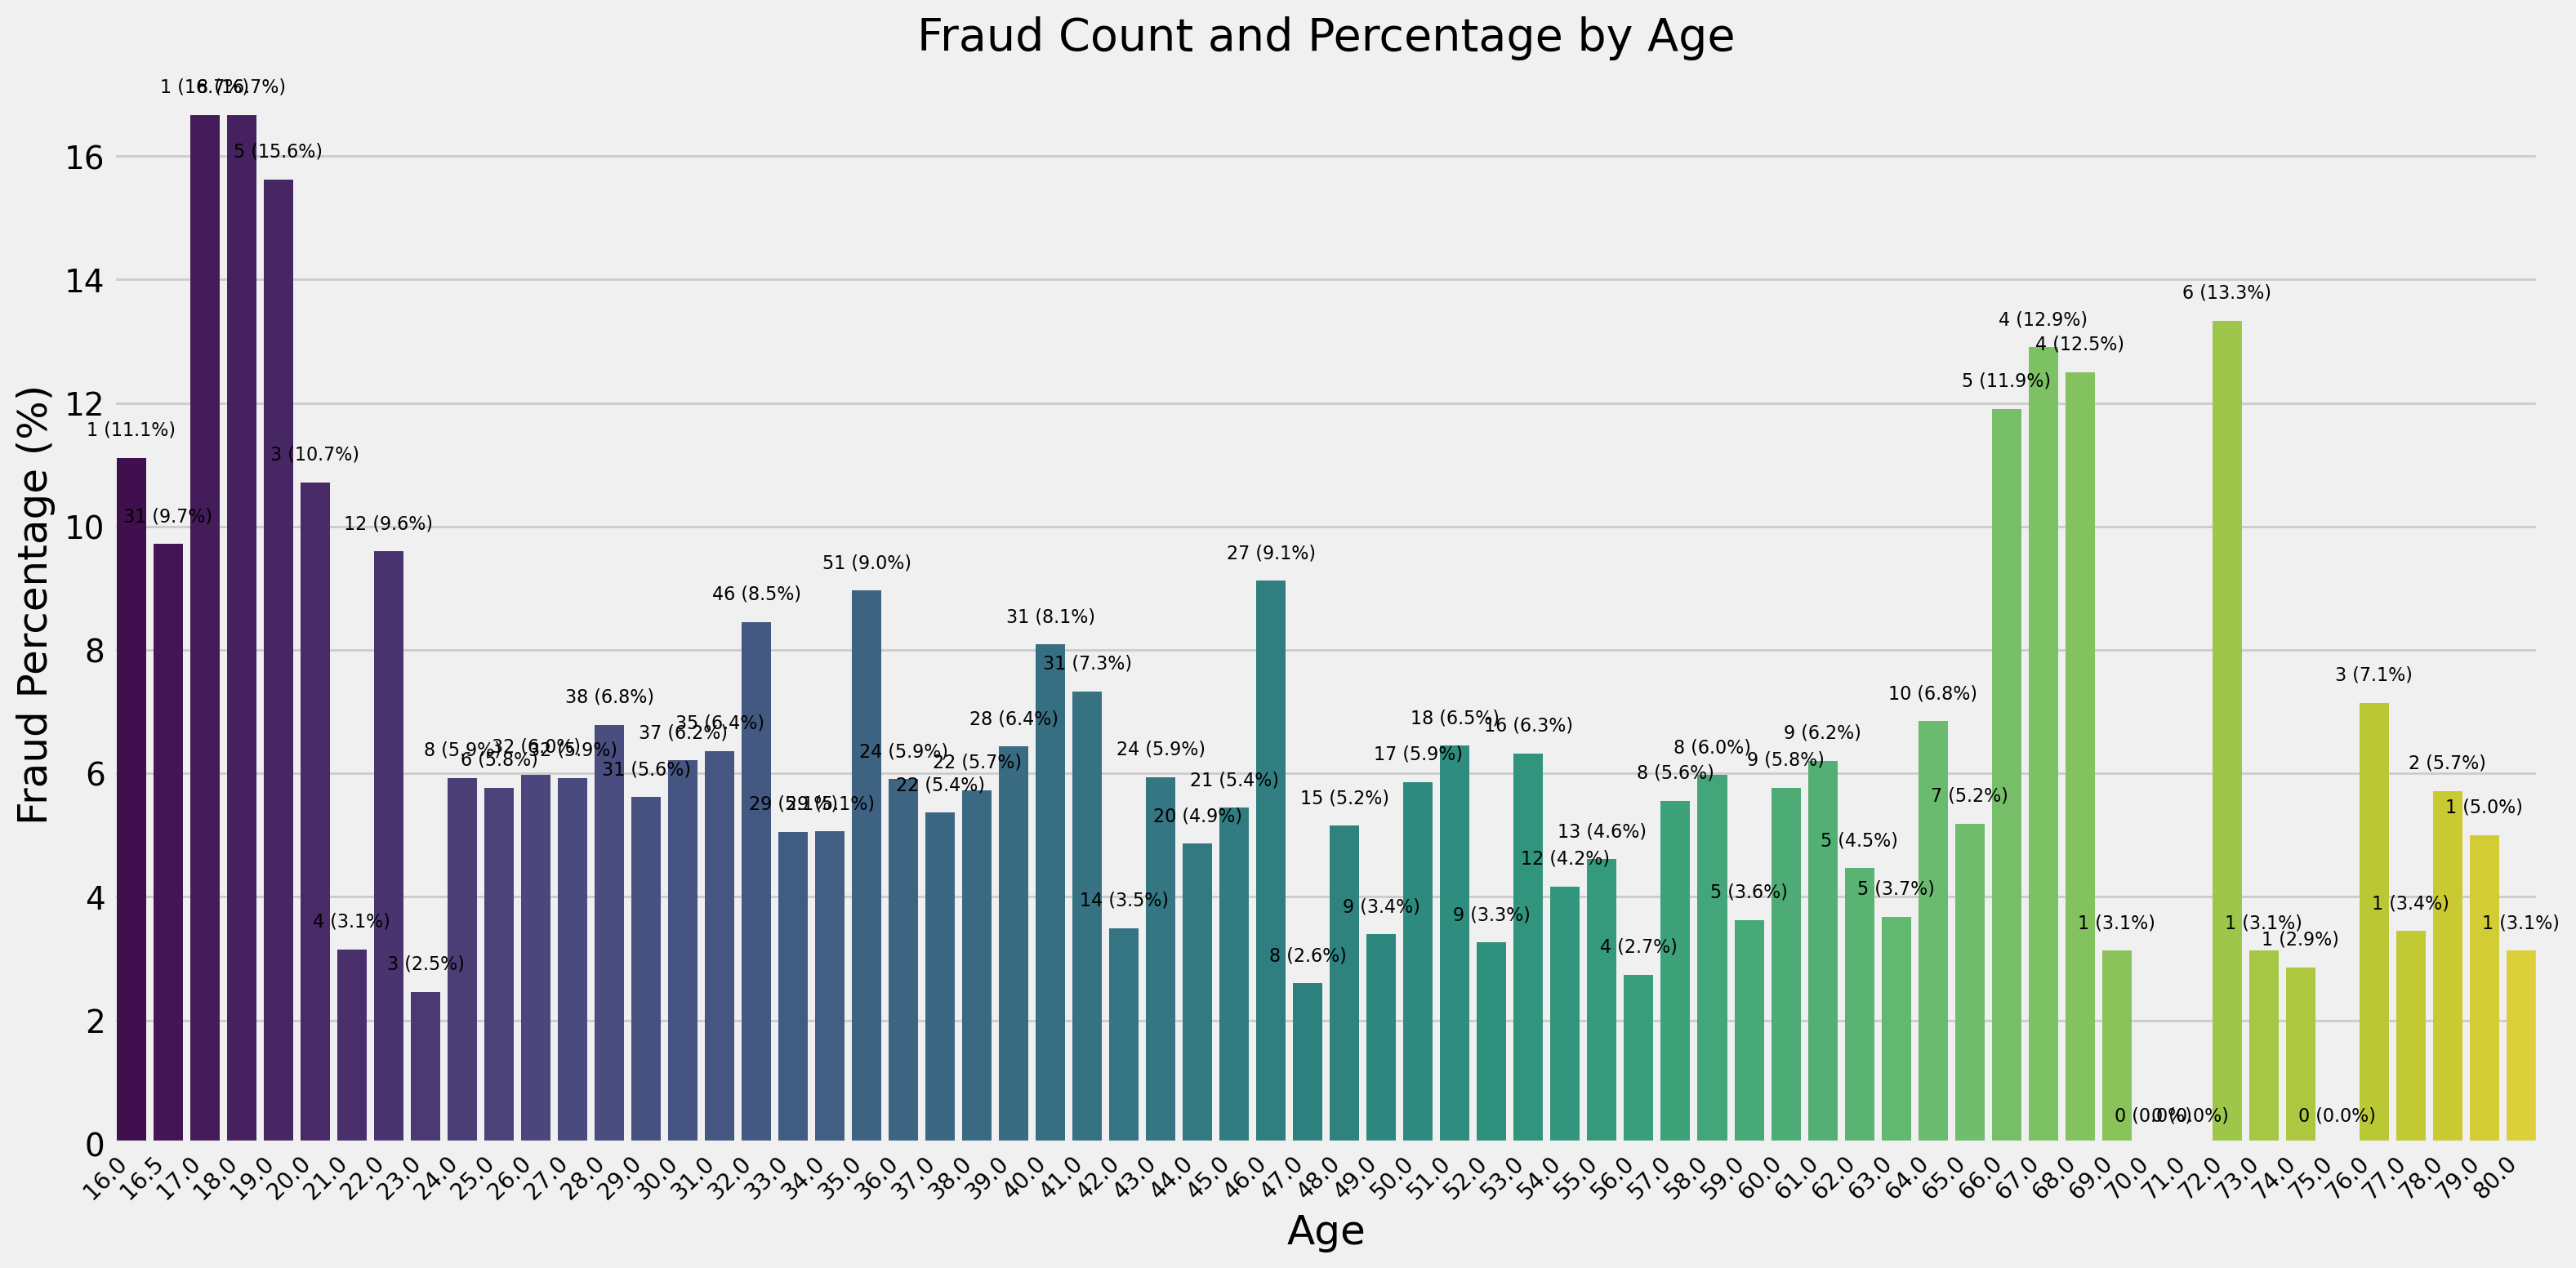

In [35]:
plot_fraud_percentage_bar(fraud, 'Age', sort_by=None)

- Fraud is more common among teenagers and retired seniors, as both groups often face limited financial resources, suggesting a link between financial power and fraud risk.

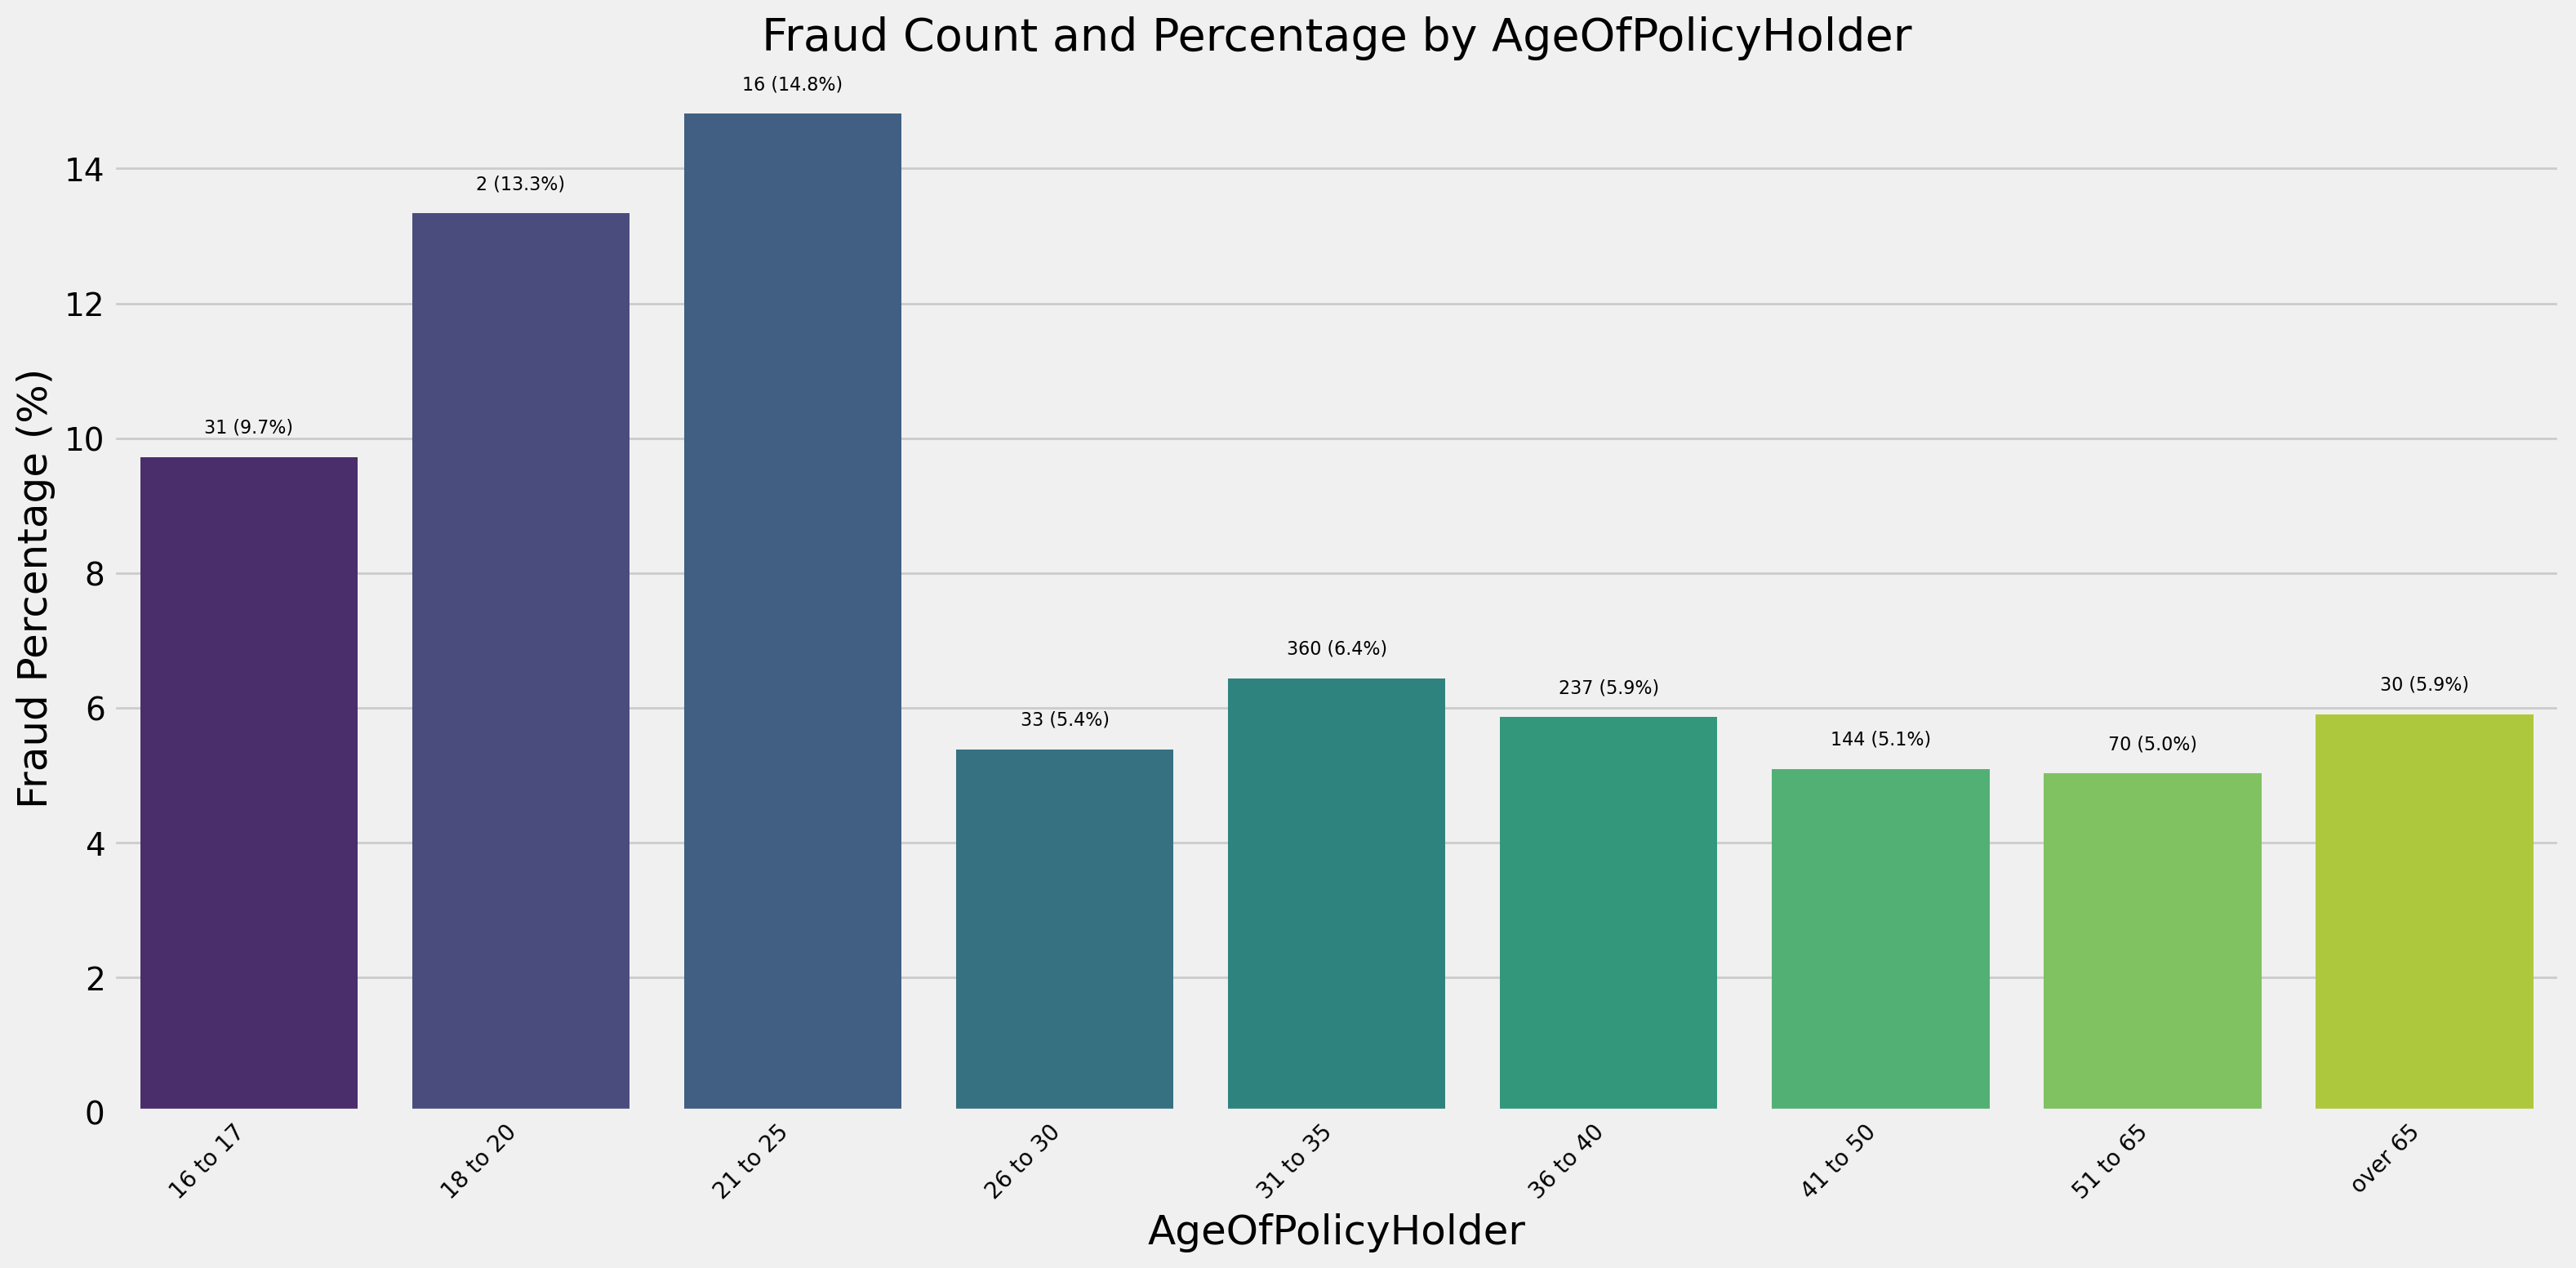

In [37]:
# Fraud detection by AgeOfPolicyHolder
plot_fraud_percentage_bar(fraud, 'AgeOfPolicyHolder', sort_by=None)

- The under-25 age group shows a high fraud rate in the "Age of Policy Holder" feature.

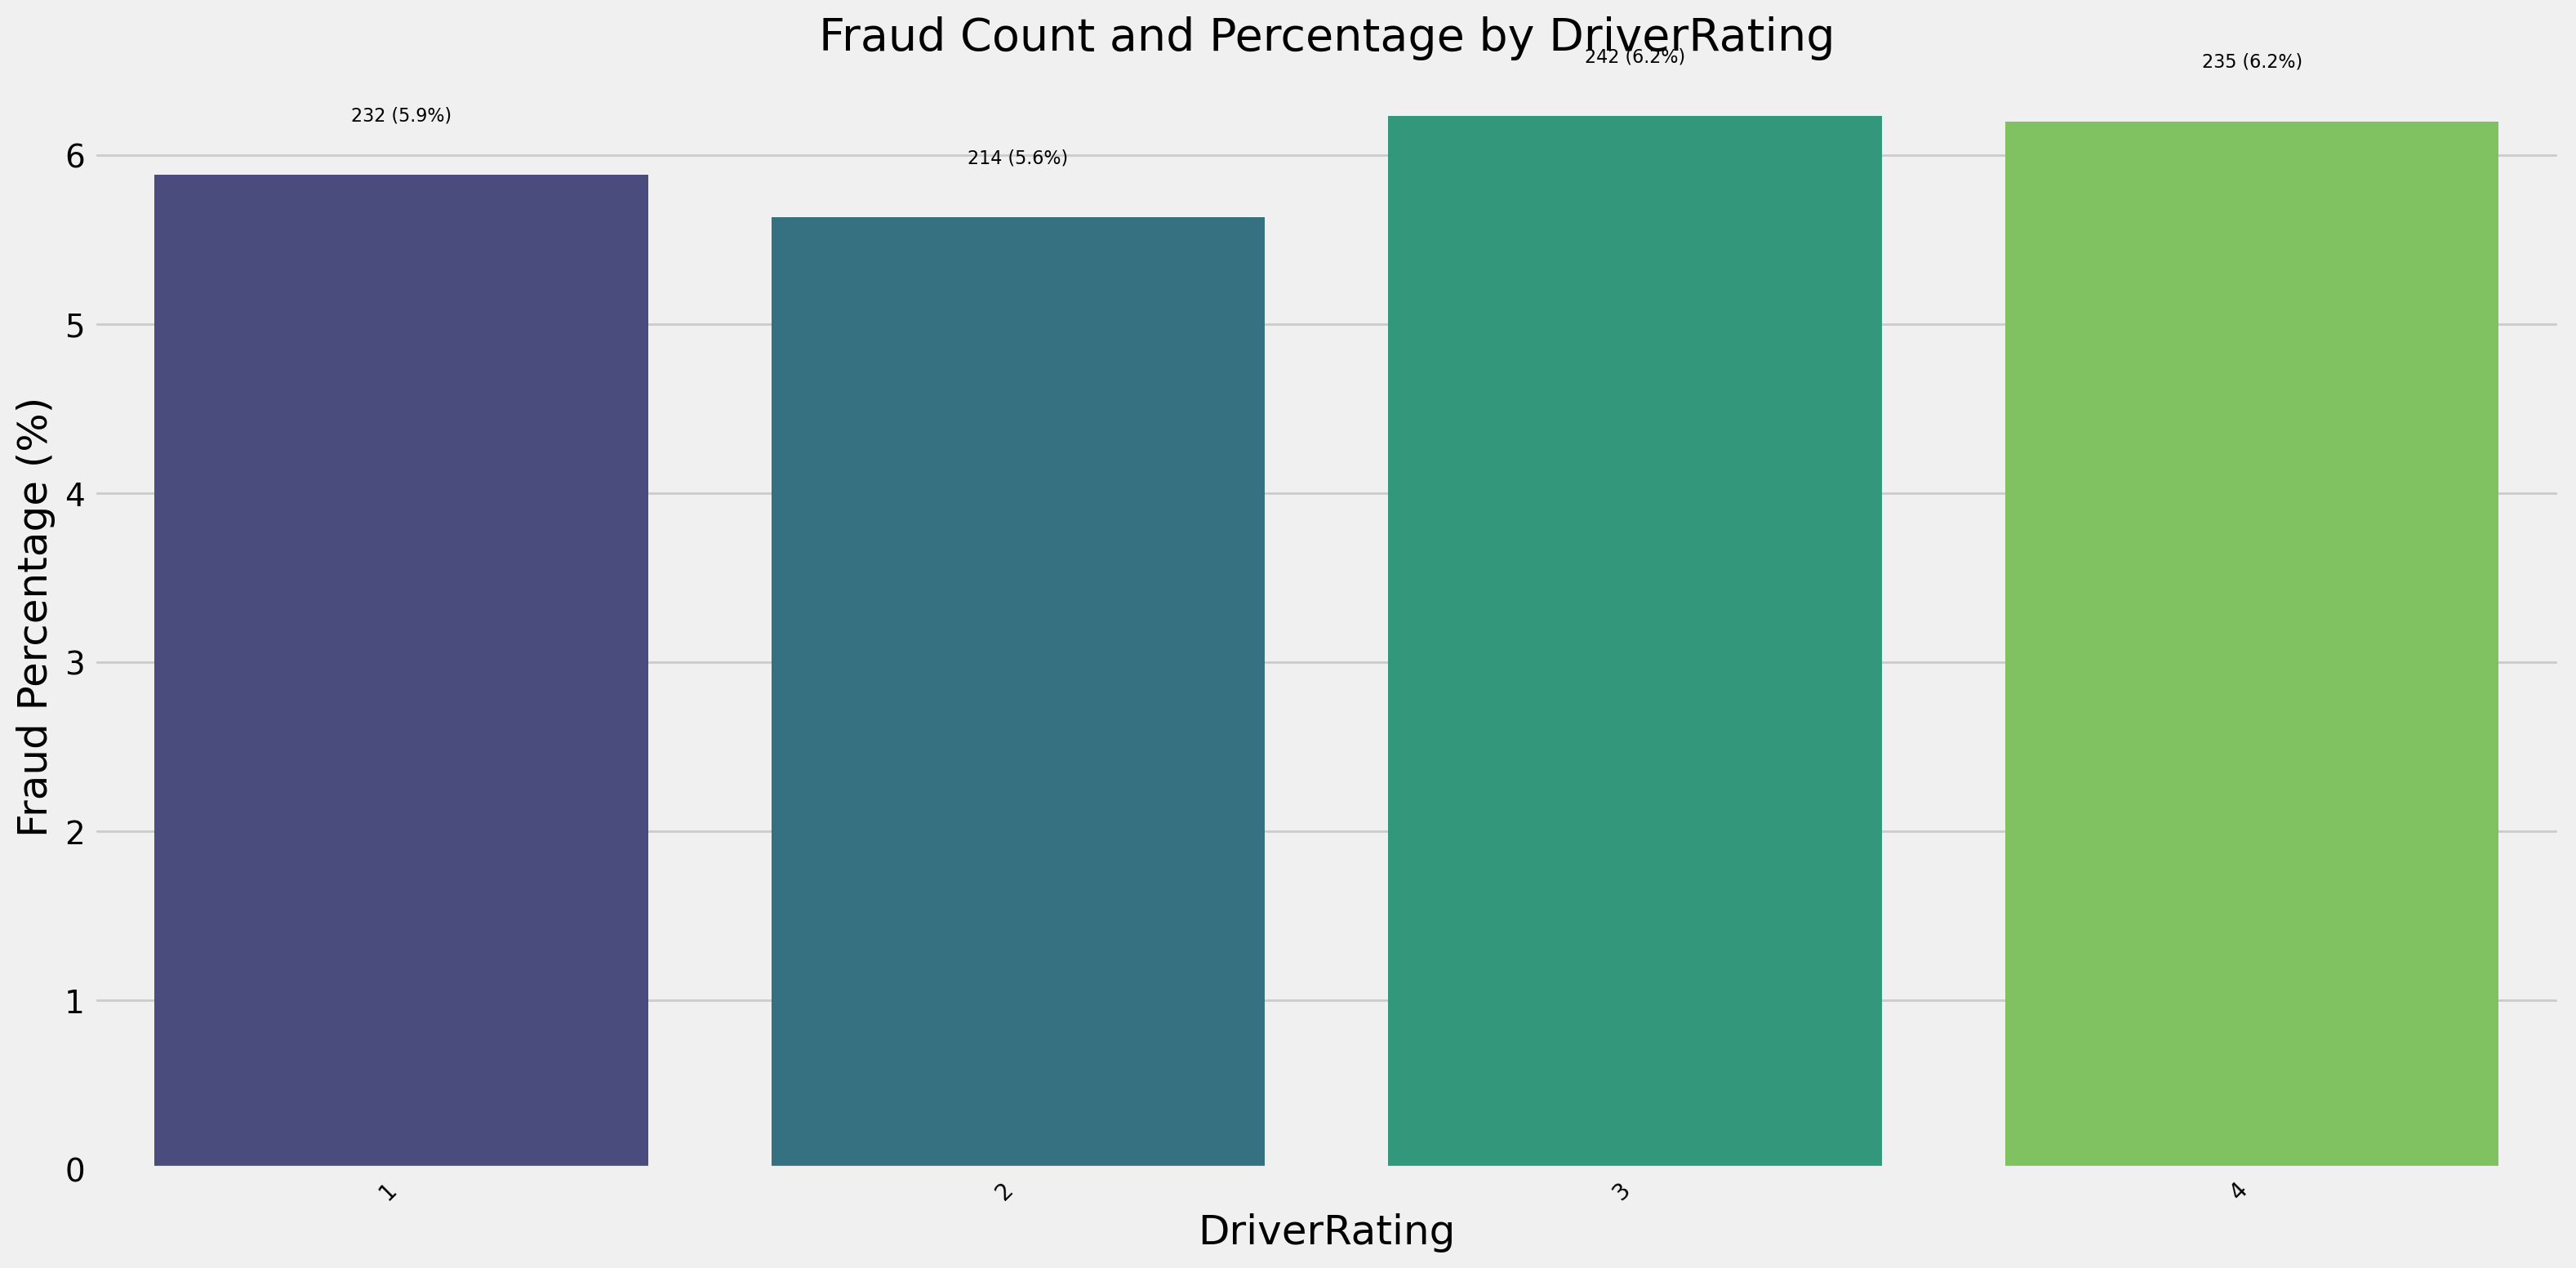

In [39]:
# Fraud detection by DriverRating
plot_fraud_percentage_bar(fraud, 'DriverRating', sort_by=None)

- The fraud rate does not vary significantly across different Driver Ratings

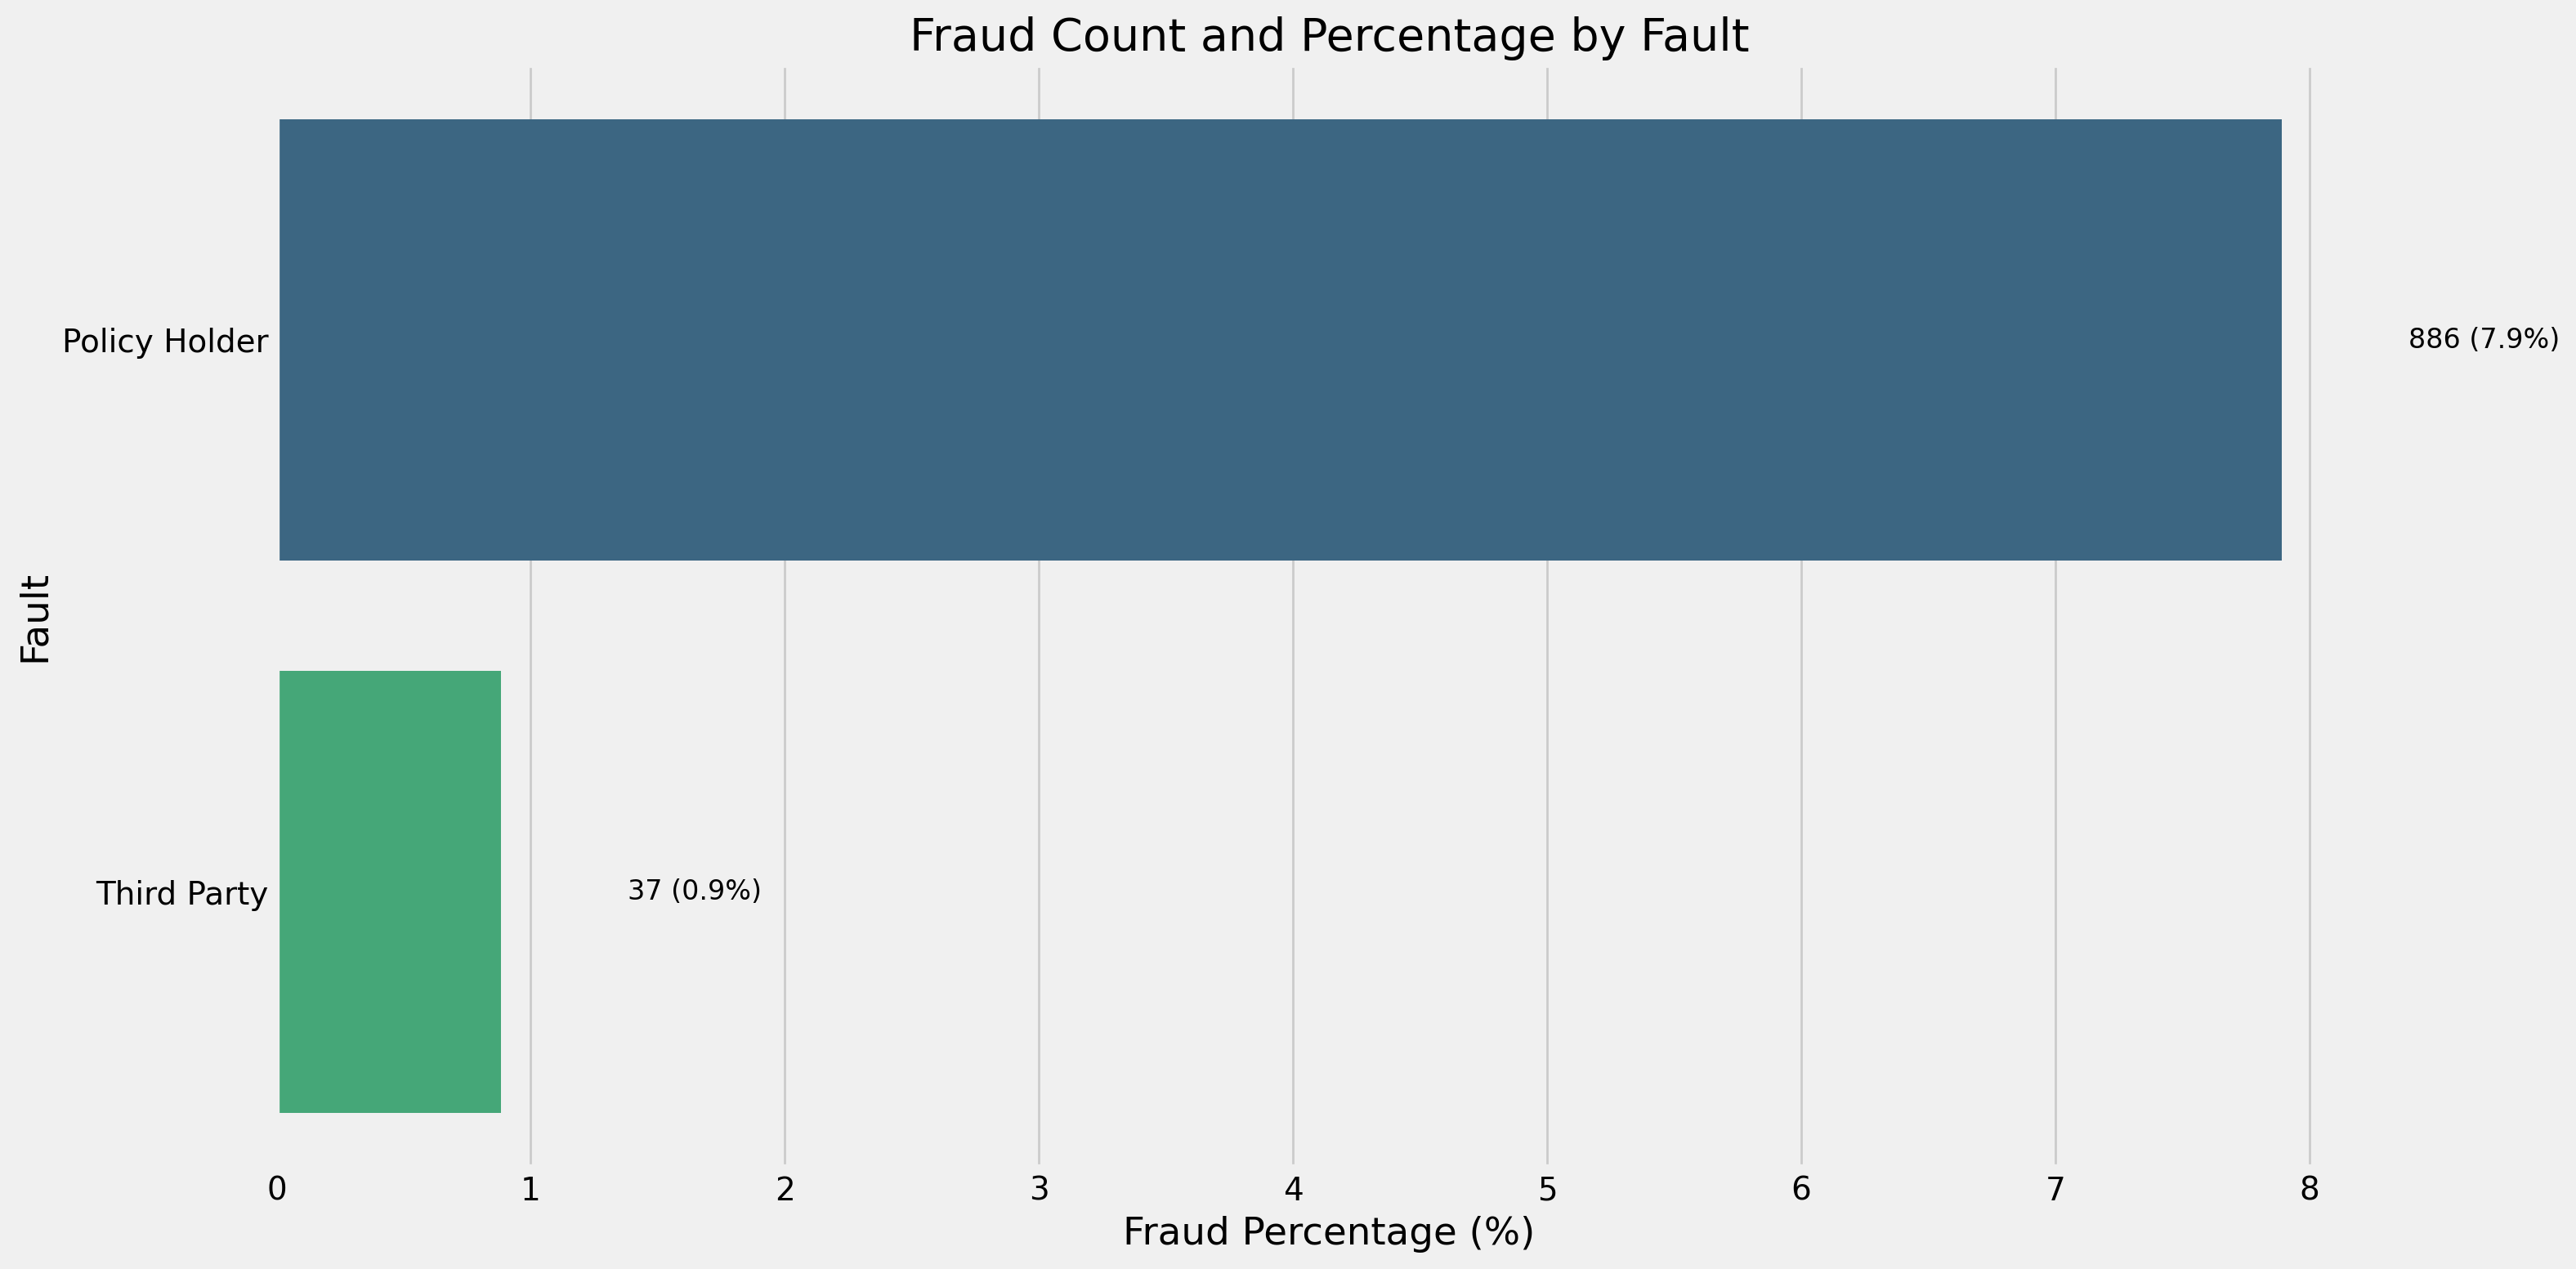

In [41]:
# Fraud detection by Fault
plot_fraud_percentage_bar(fraud, 'Fault', sort_by='percentage',  horizontal=True)

- The Policy Holder group shows a high fraud rate in the "Fault" feature.

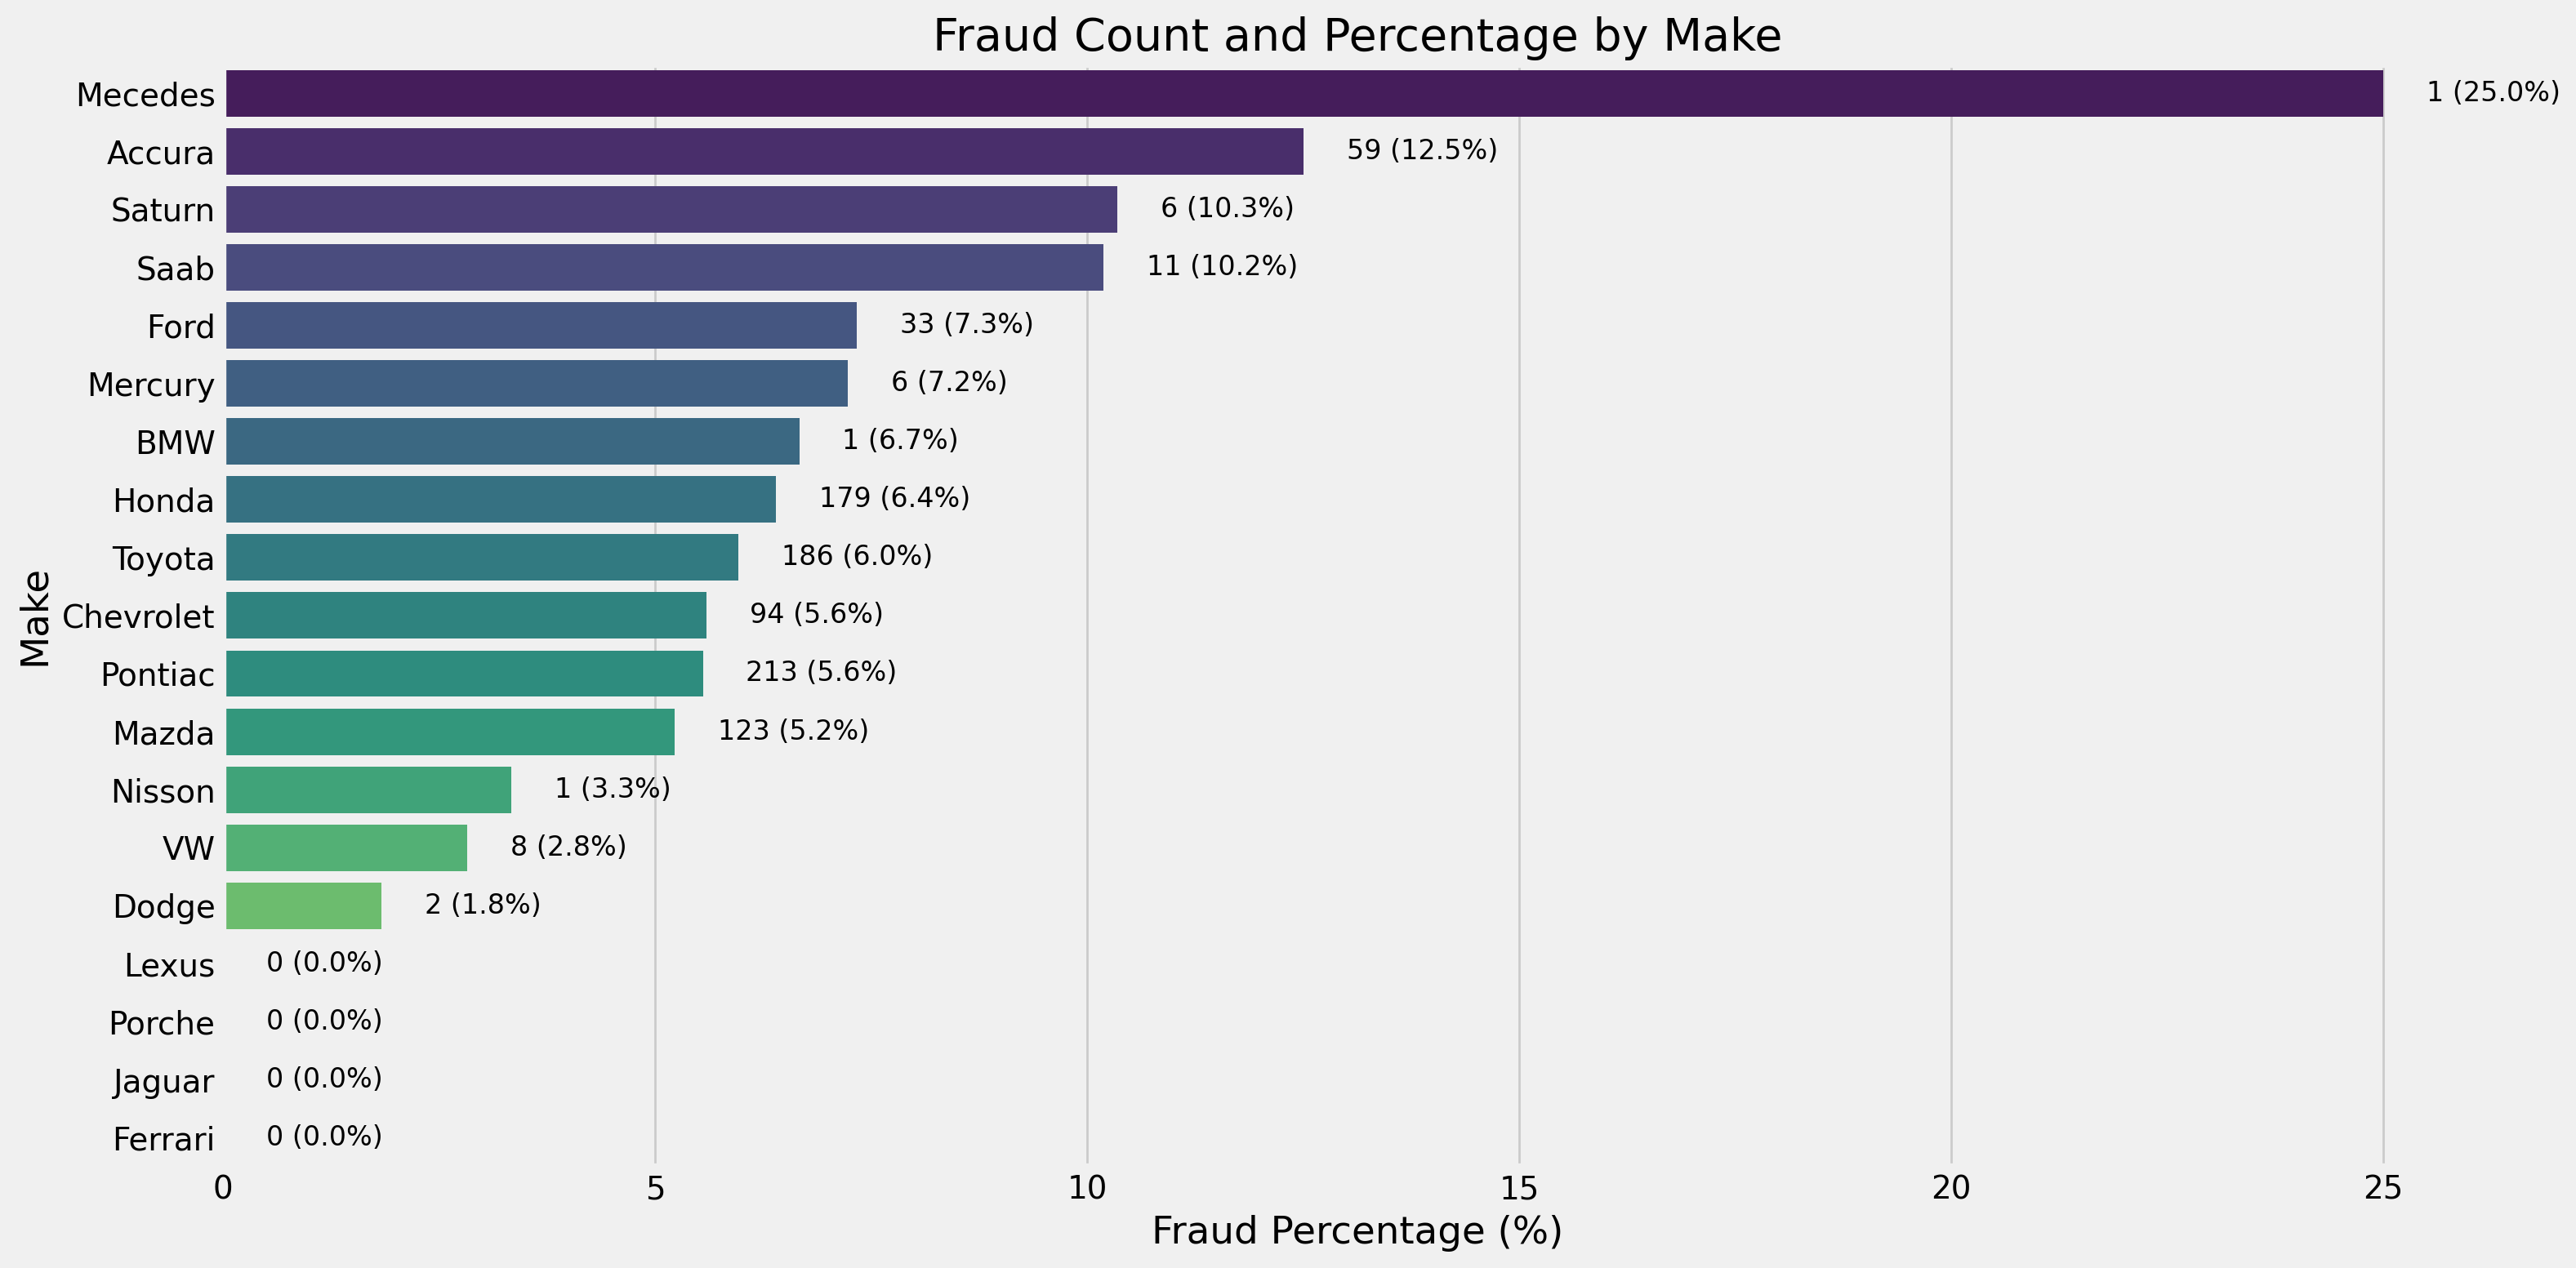

In [43]:
# Fraud detection by Make
plot_fraud_percentage_bar(fraud, 'Make', sort_by='percentage', horizontal=True)

- Mercedes owners are more likely to be involved in fraud, with nearly twice the incidence of the second-highest group, Acura owners. In contrast, Porsche, Lexus, Jaguar, and Ferrari owners have never been reported for fraud. 

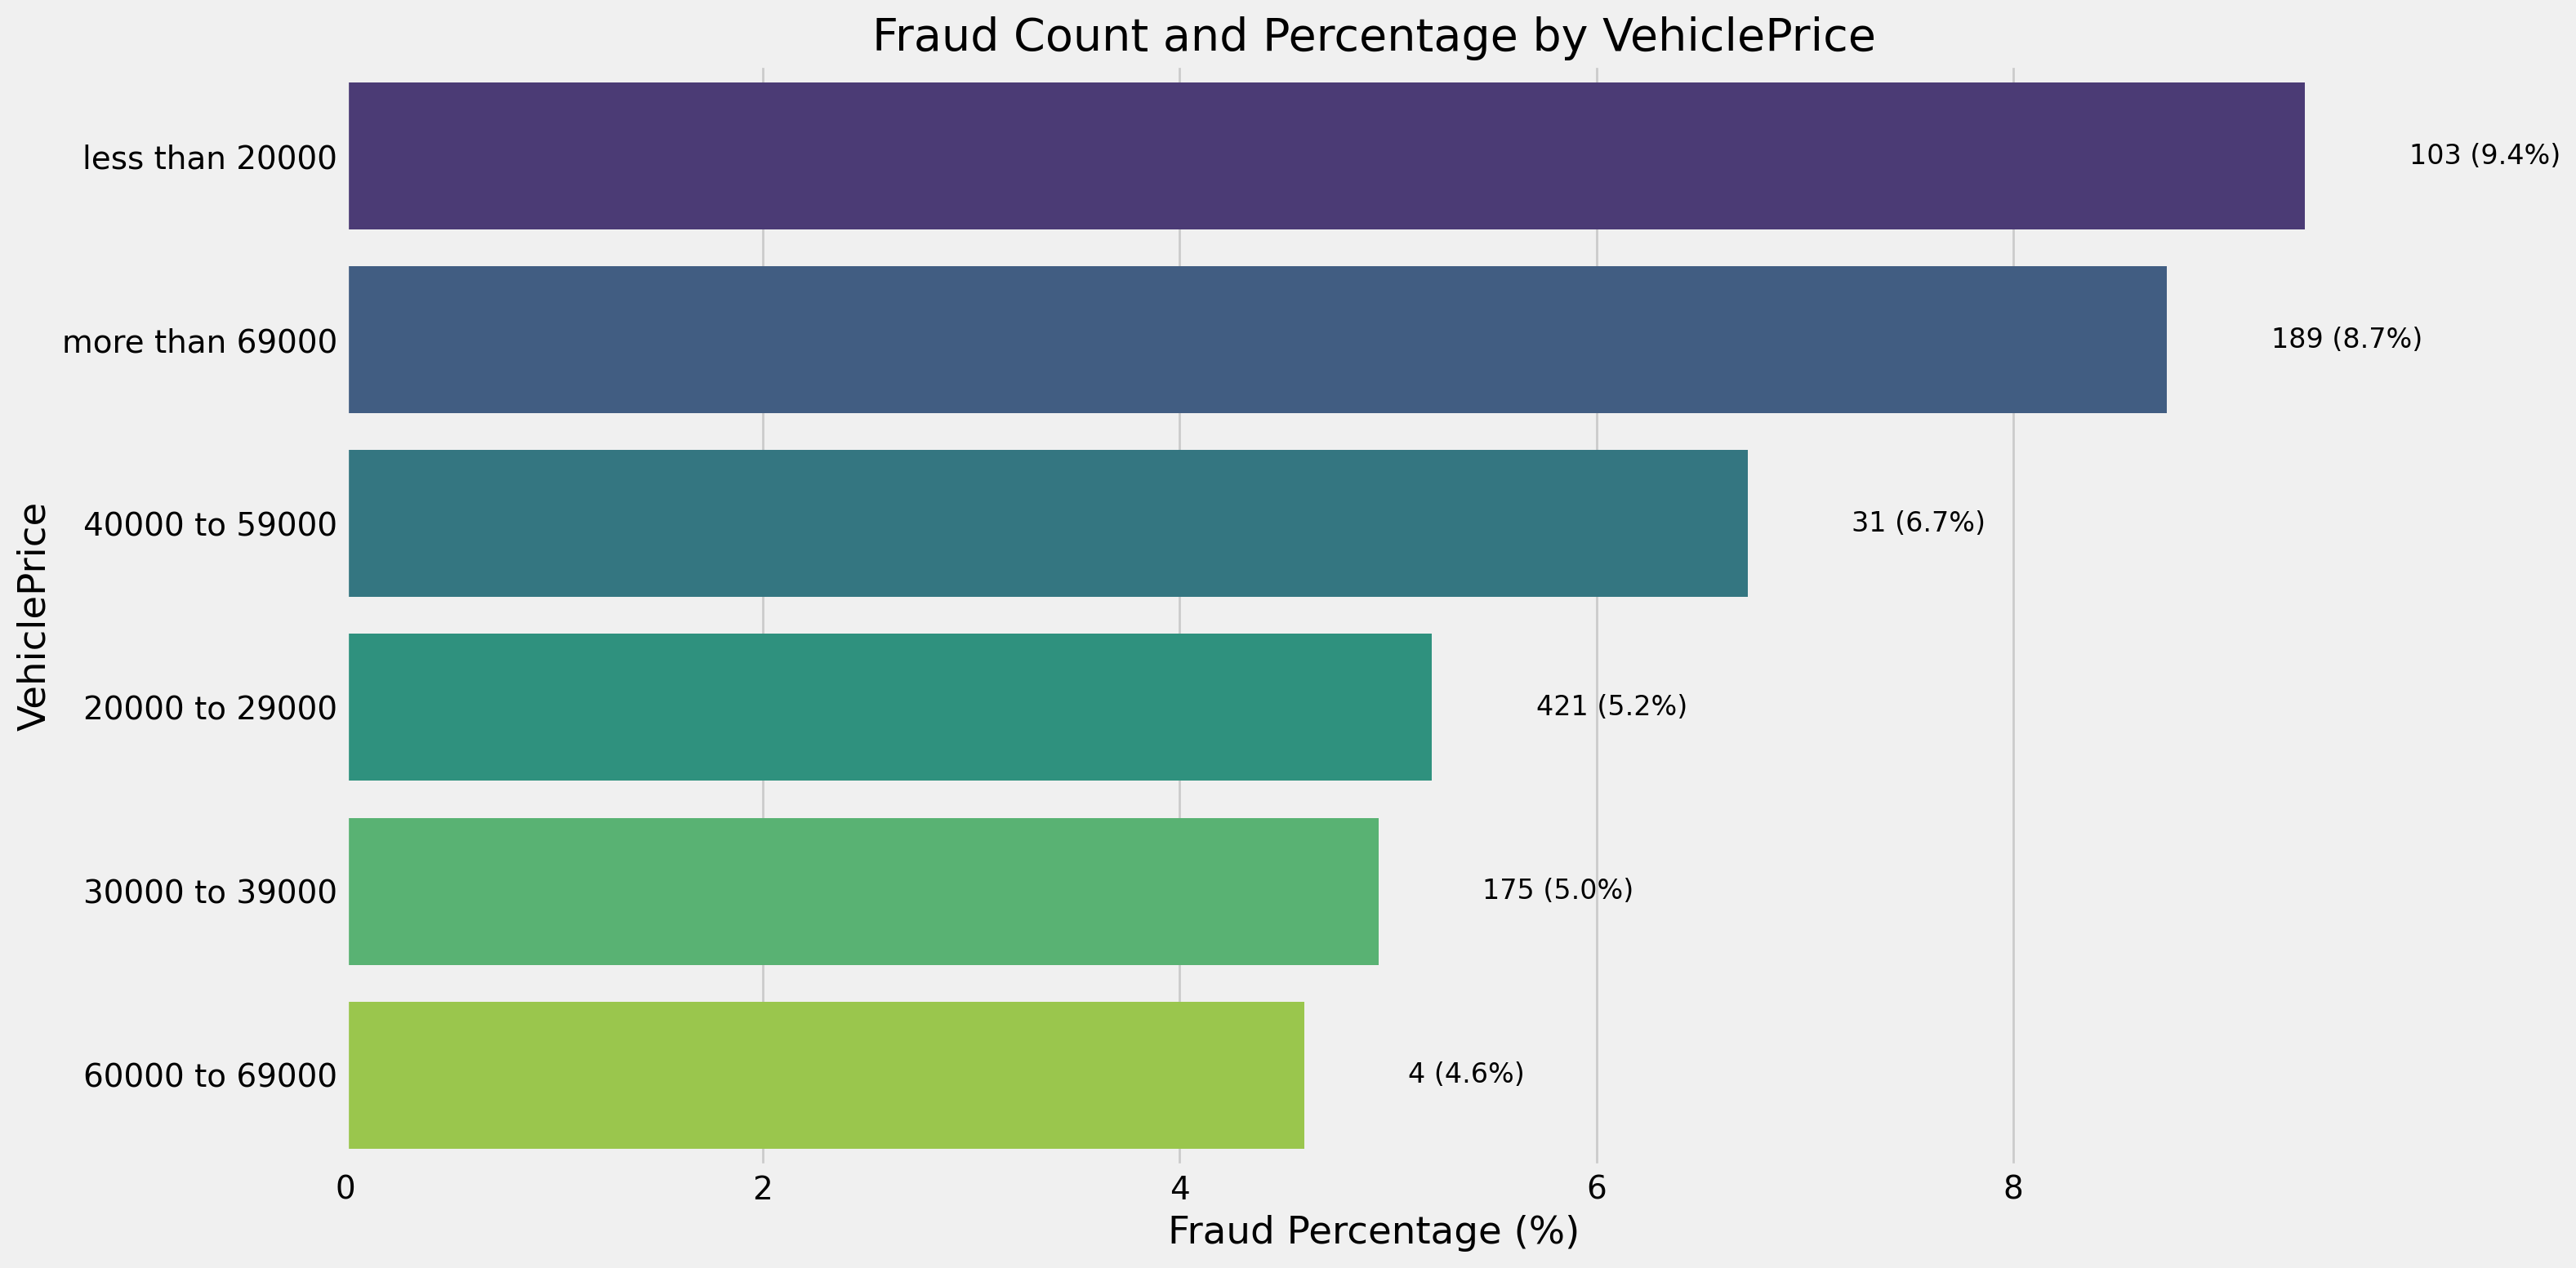

In [45]:
# Fraud detection by Vehicle Price
plot_fraud_percentage_bar(fraud, 'VehiclePrice', sort_by='percentage', horizontal=True)

- Fraudulent cases are most frequently detected in either the most expensive or the cheapest vehicle categories. Since the categories "more than 69,000" and "less than 20,000" have the highest fraud rates, the feature can be treated as binary rather than ordinal, as it doesn't follow an ordinal pattern.

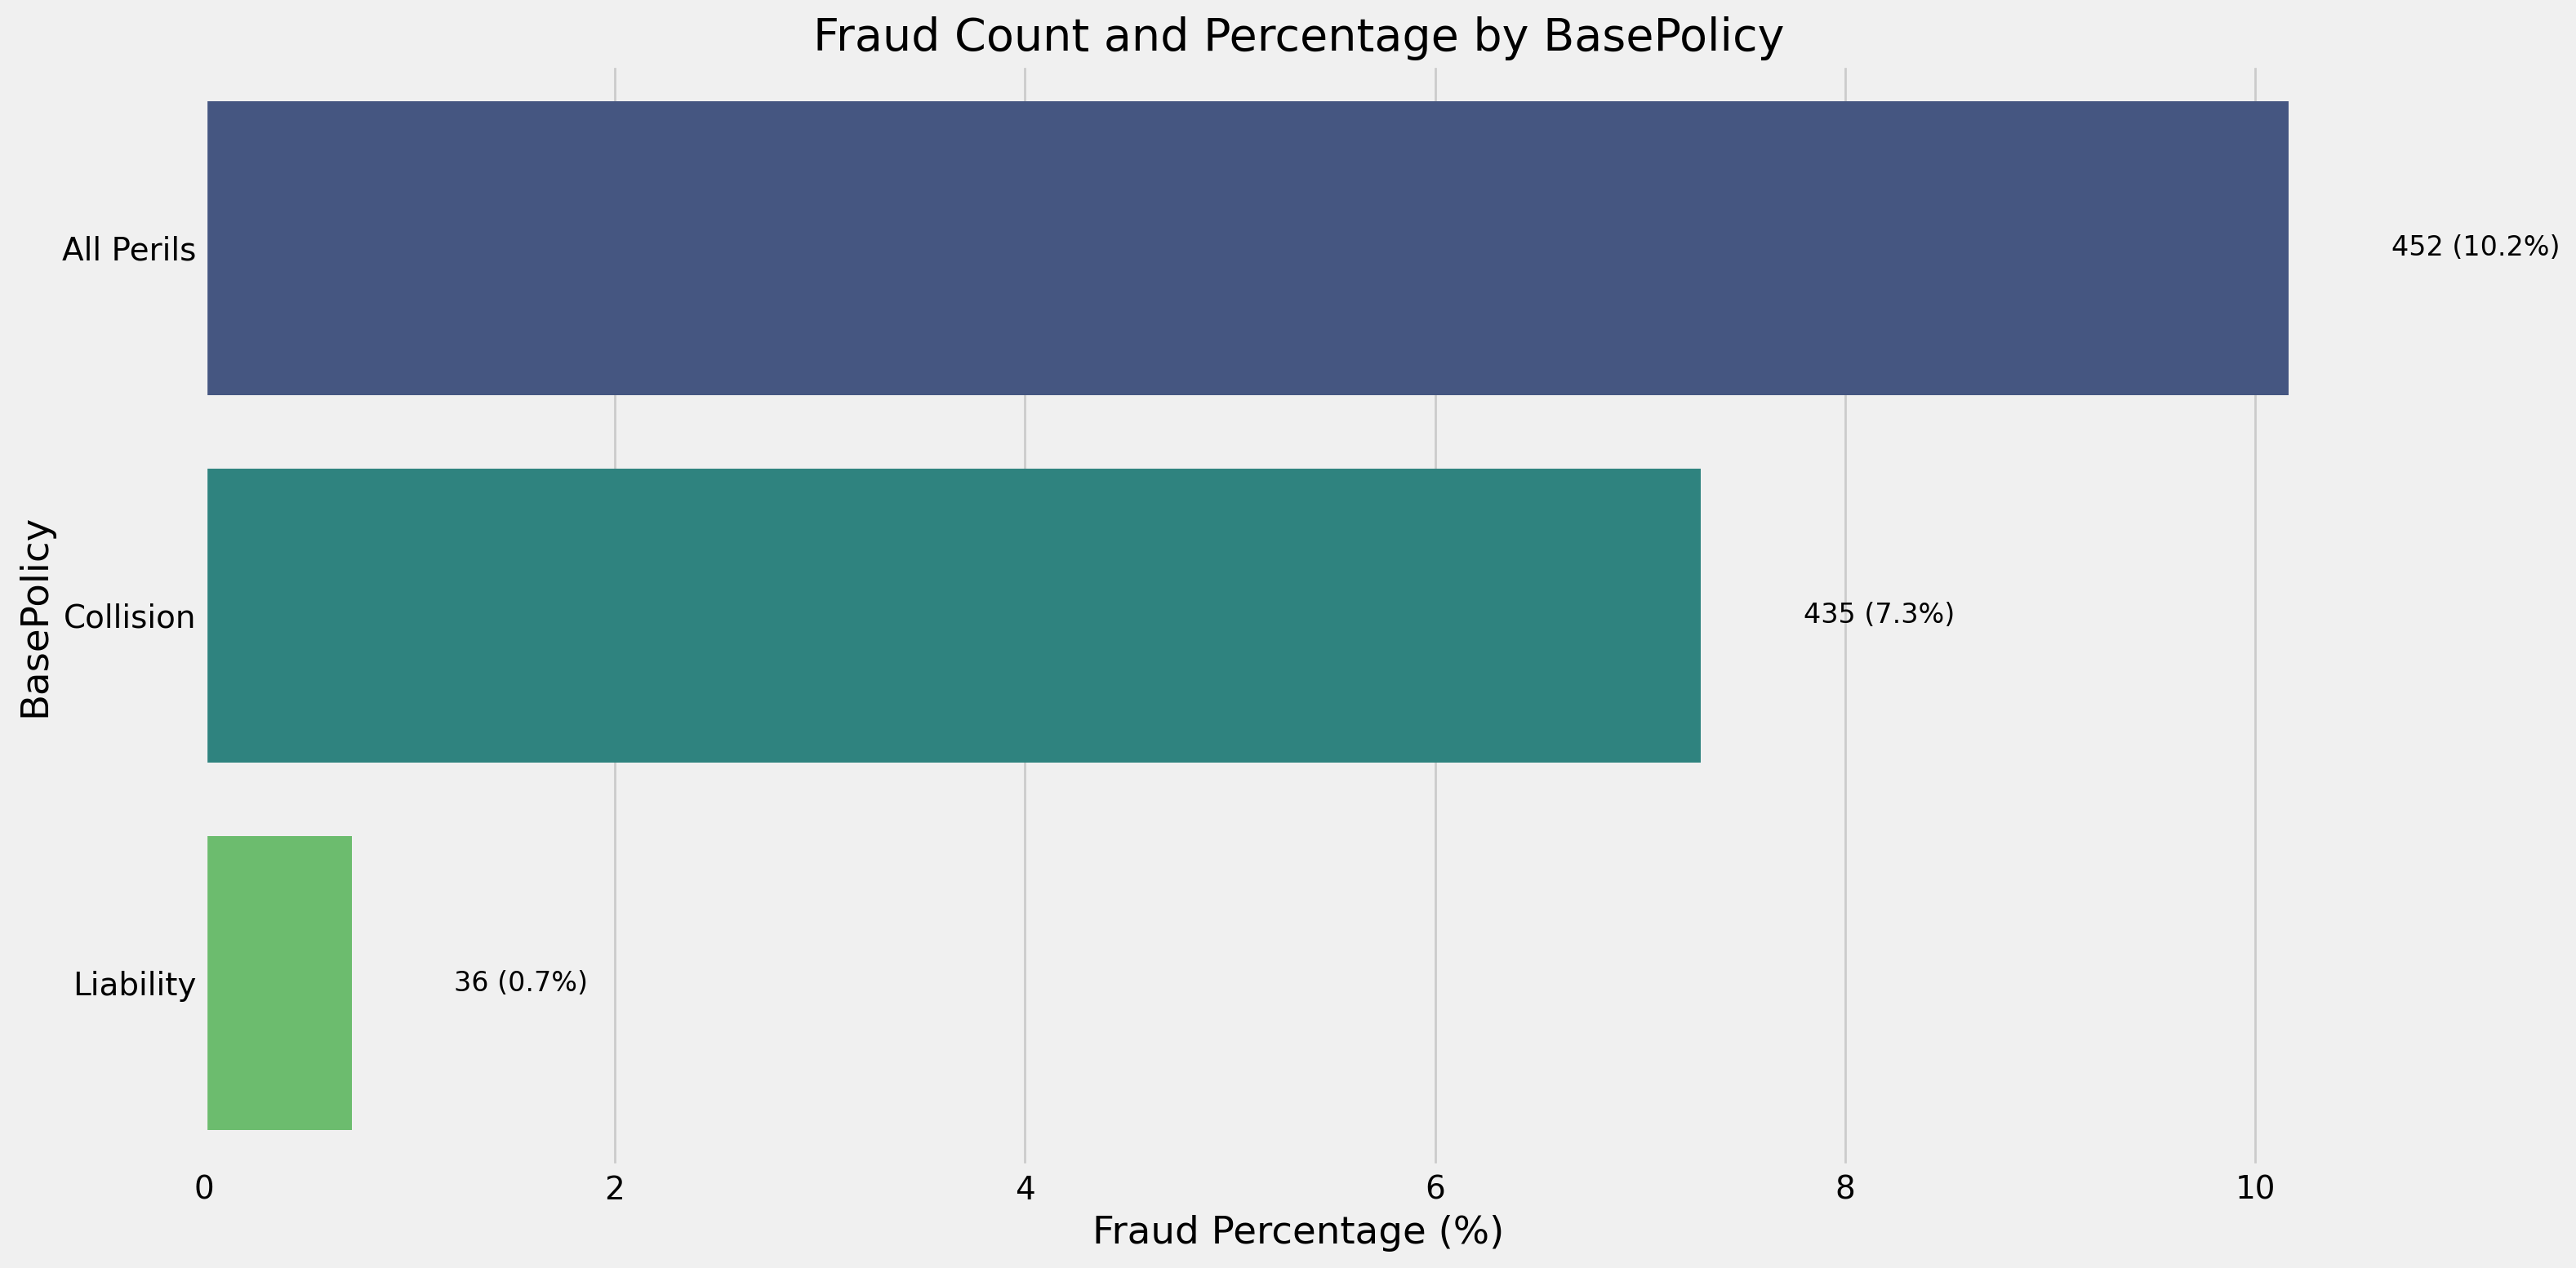

In [47]:
# Fraud detection by Base Policy
plot_fraud_percentage_bar(fraud, 'BasePolicy', sort_by='percentage', horizontal=True)

- Fraudulent cases were most commonly detected under the "All Perils" coverage.

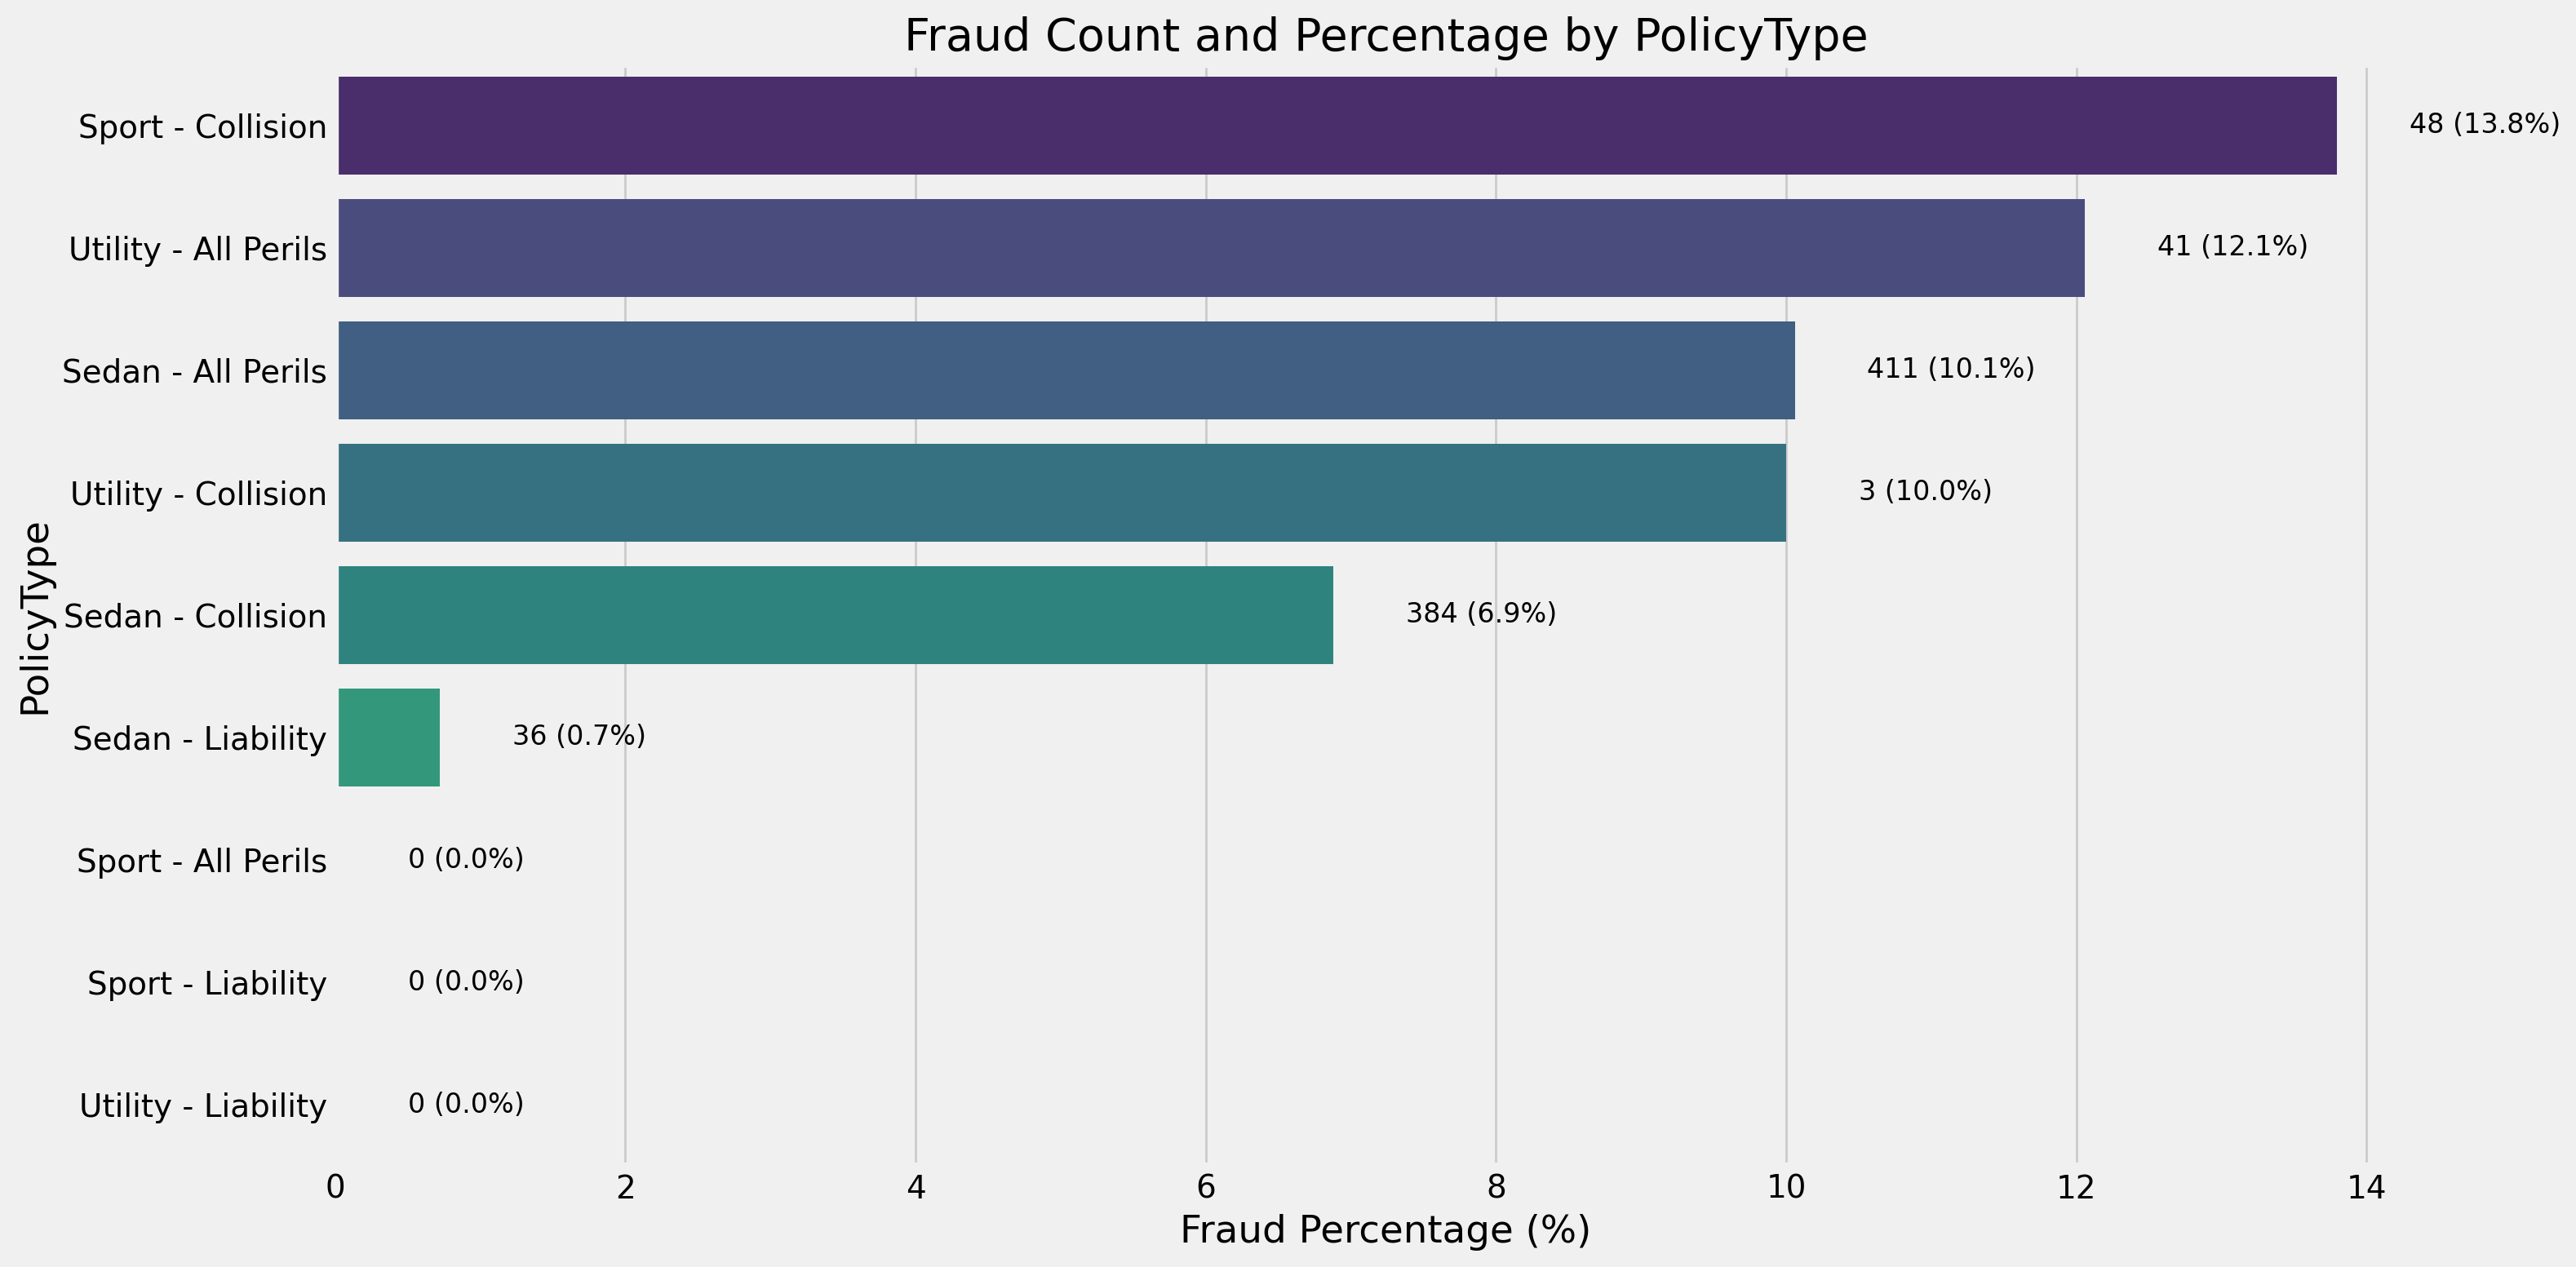

In [49]:
# Fraud detection by Base Policy
plot_fraud_percentage_bar(fraud, 'PolicyType', sort_by='percentage', horizontal=True)

- Among specific policy types, "Sport-Collision" had the highest fraud detection rate.

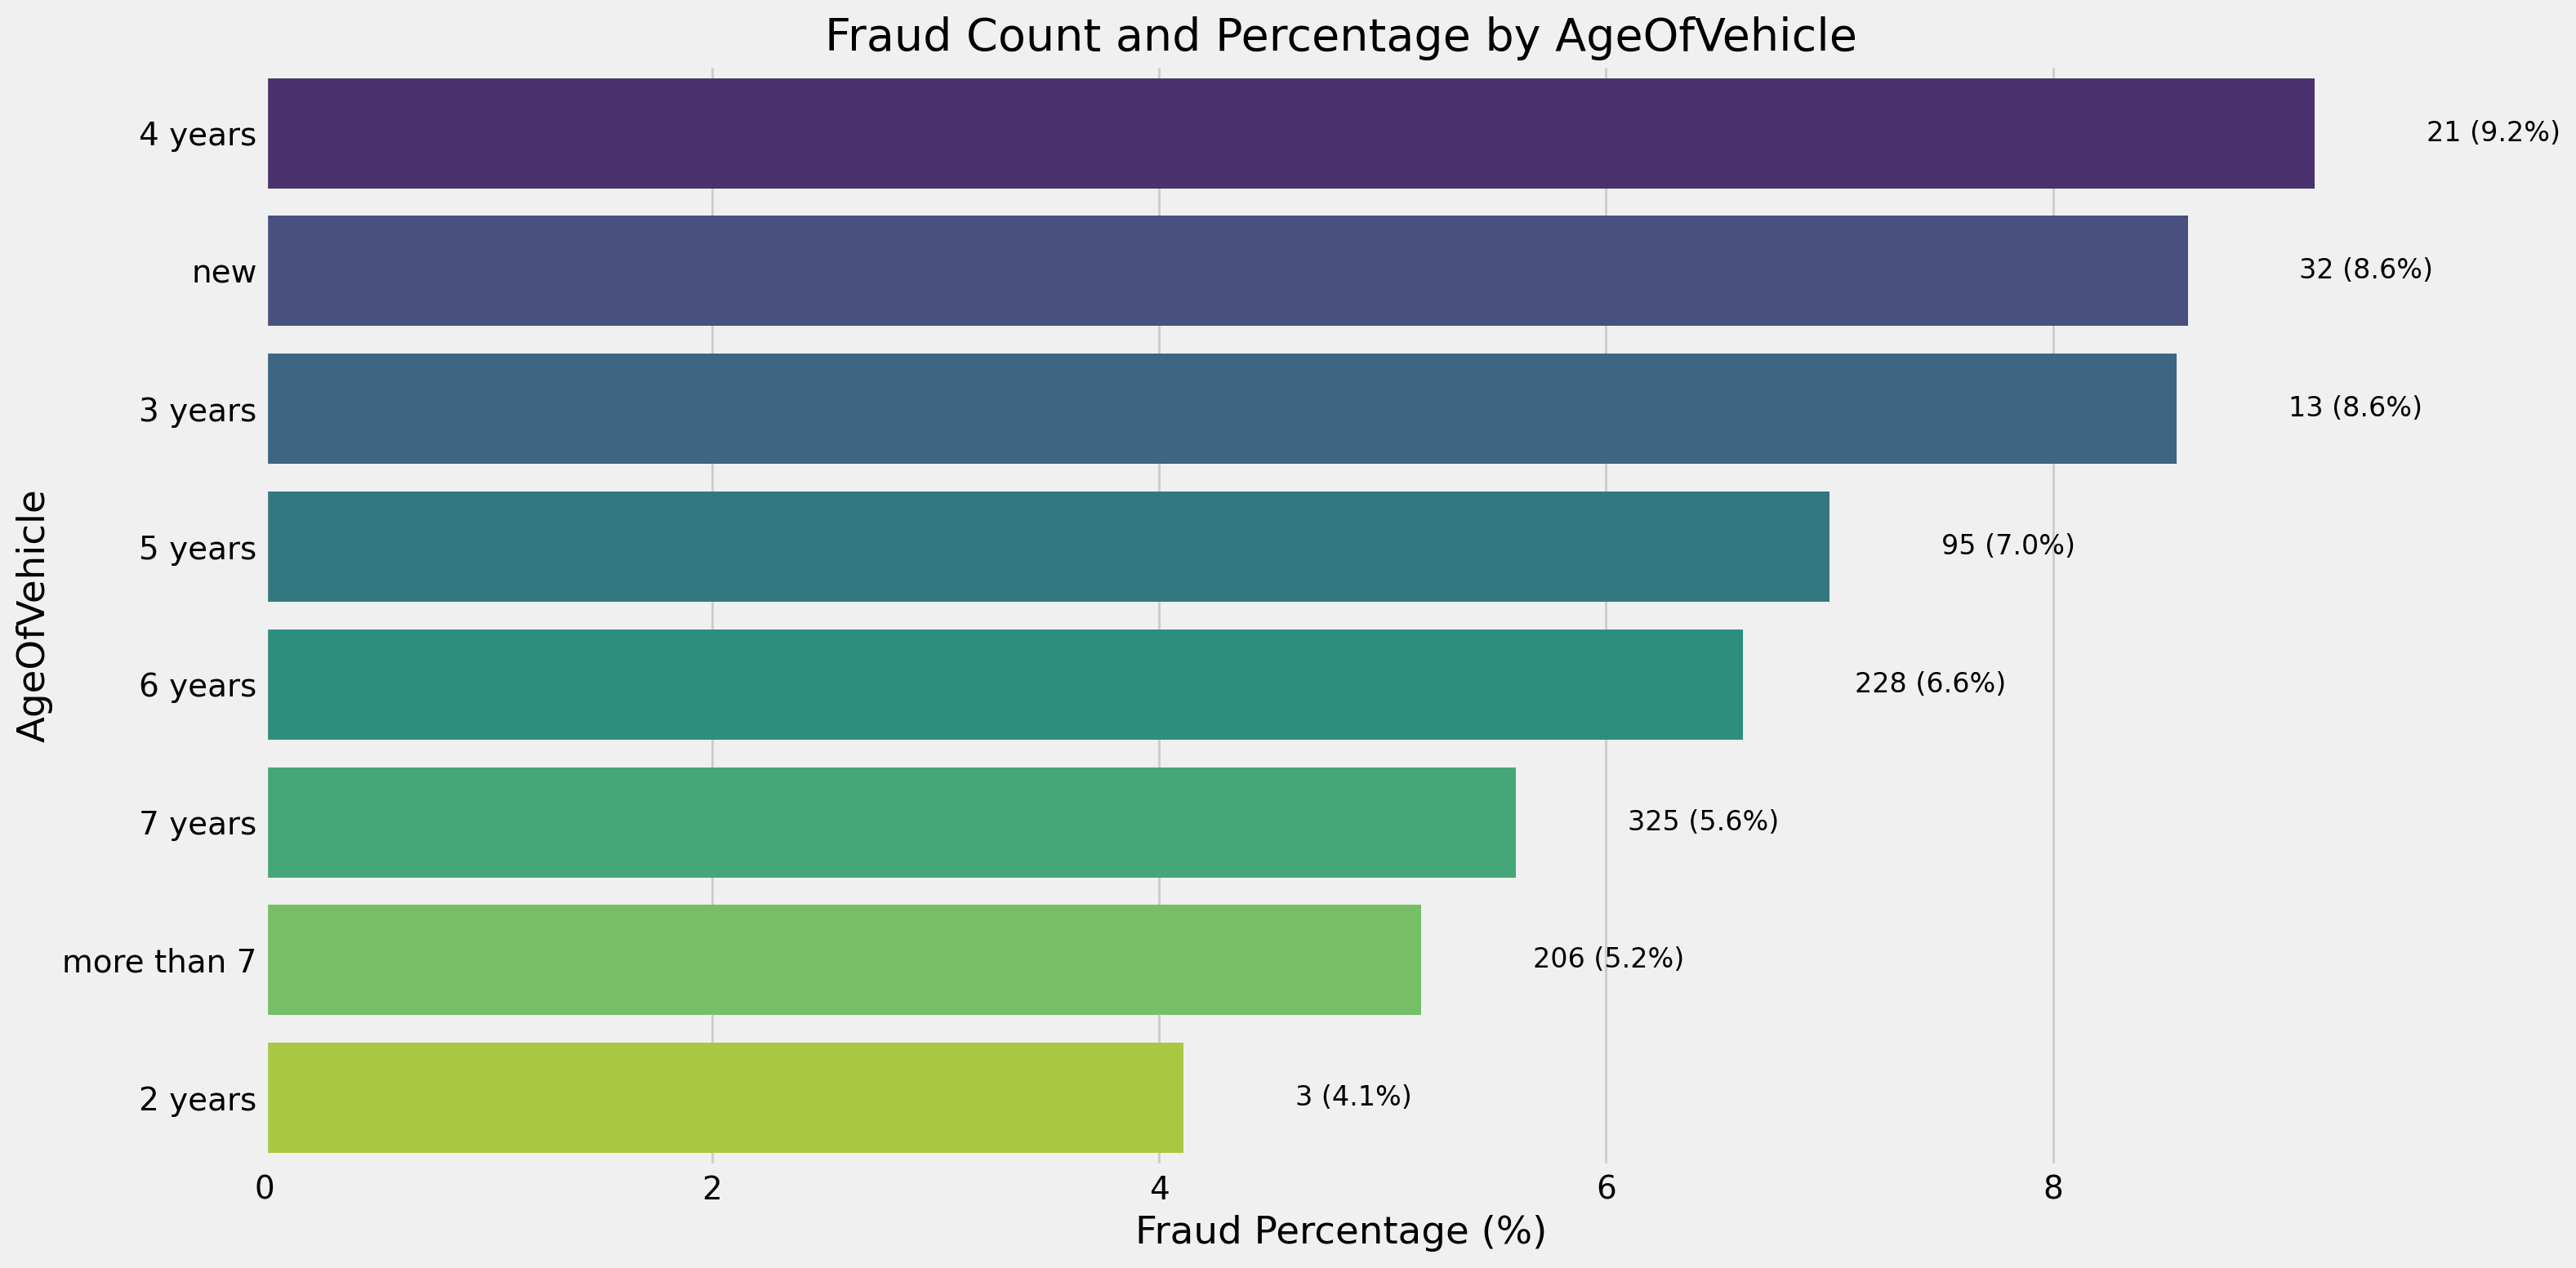

In [51]:
# Fraud detection by Age of Vehicle
plot_fraud_percentage_bar(fraud, 'AgeOfVehicle', sort_by='percentage', horizontal=True)

- The "AgeOfVehicle" feature can be reclassified into three categories: high, medium, and low fraud groups.

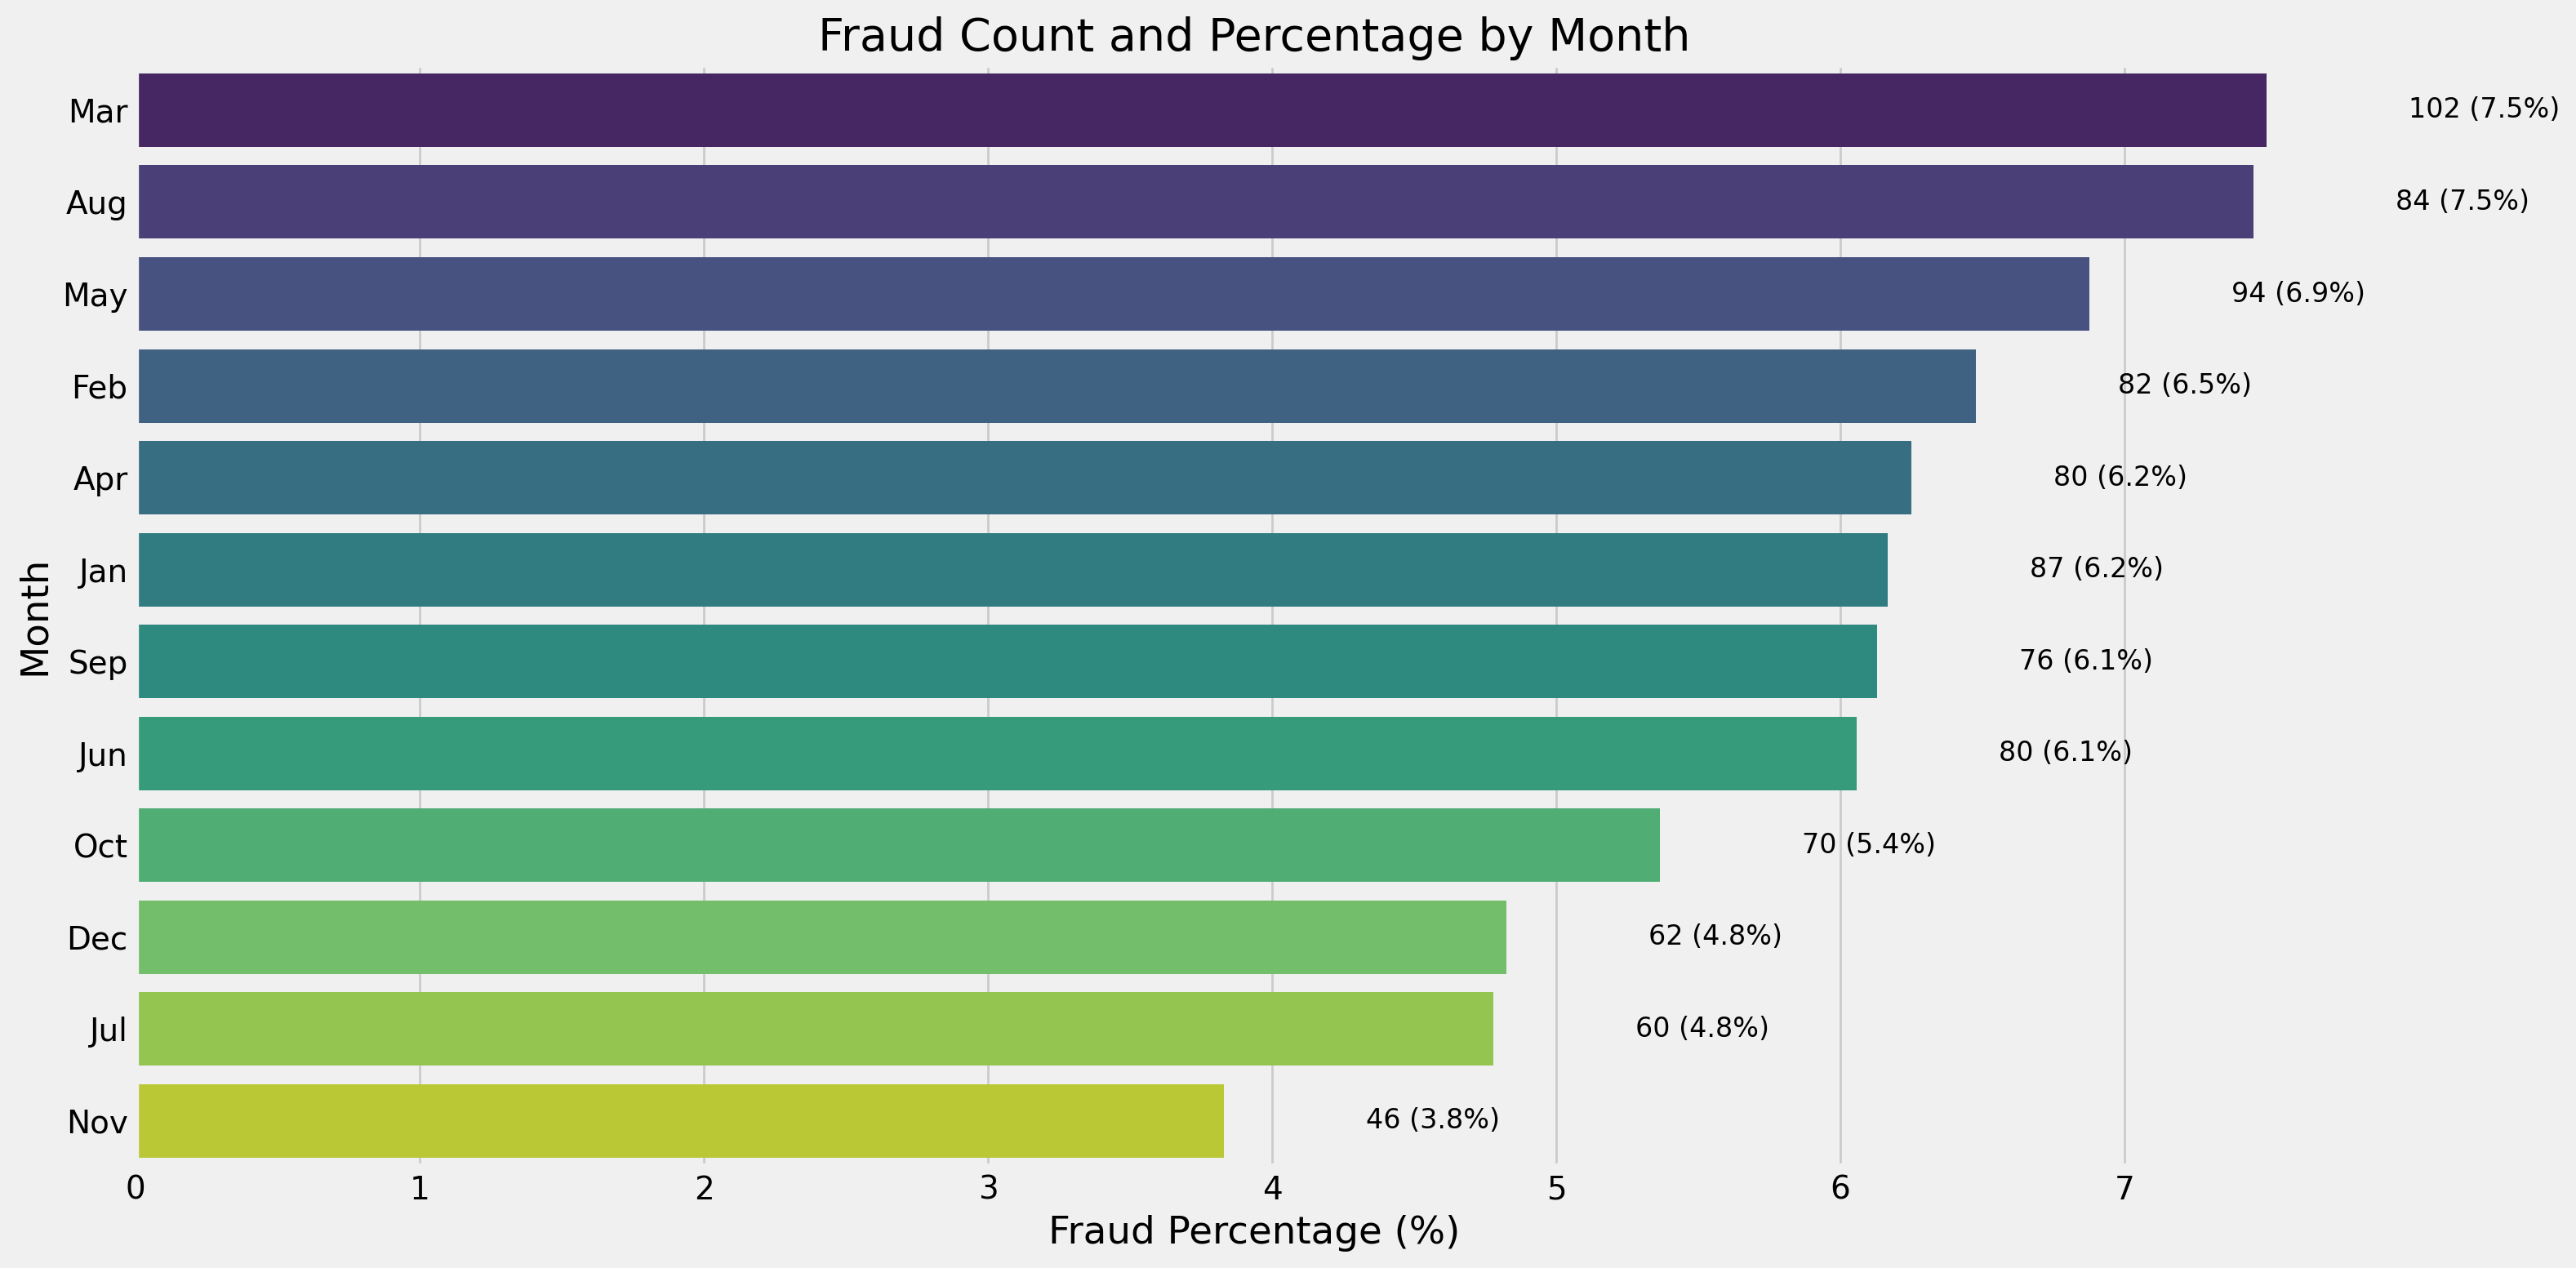

In [53]:
# Fraud detection by Month
plot_fraud_percentage_bar(fraud, 'Month', sort_by='percentage', horizontal=True)

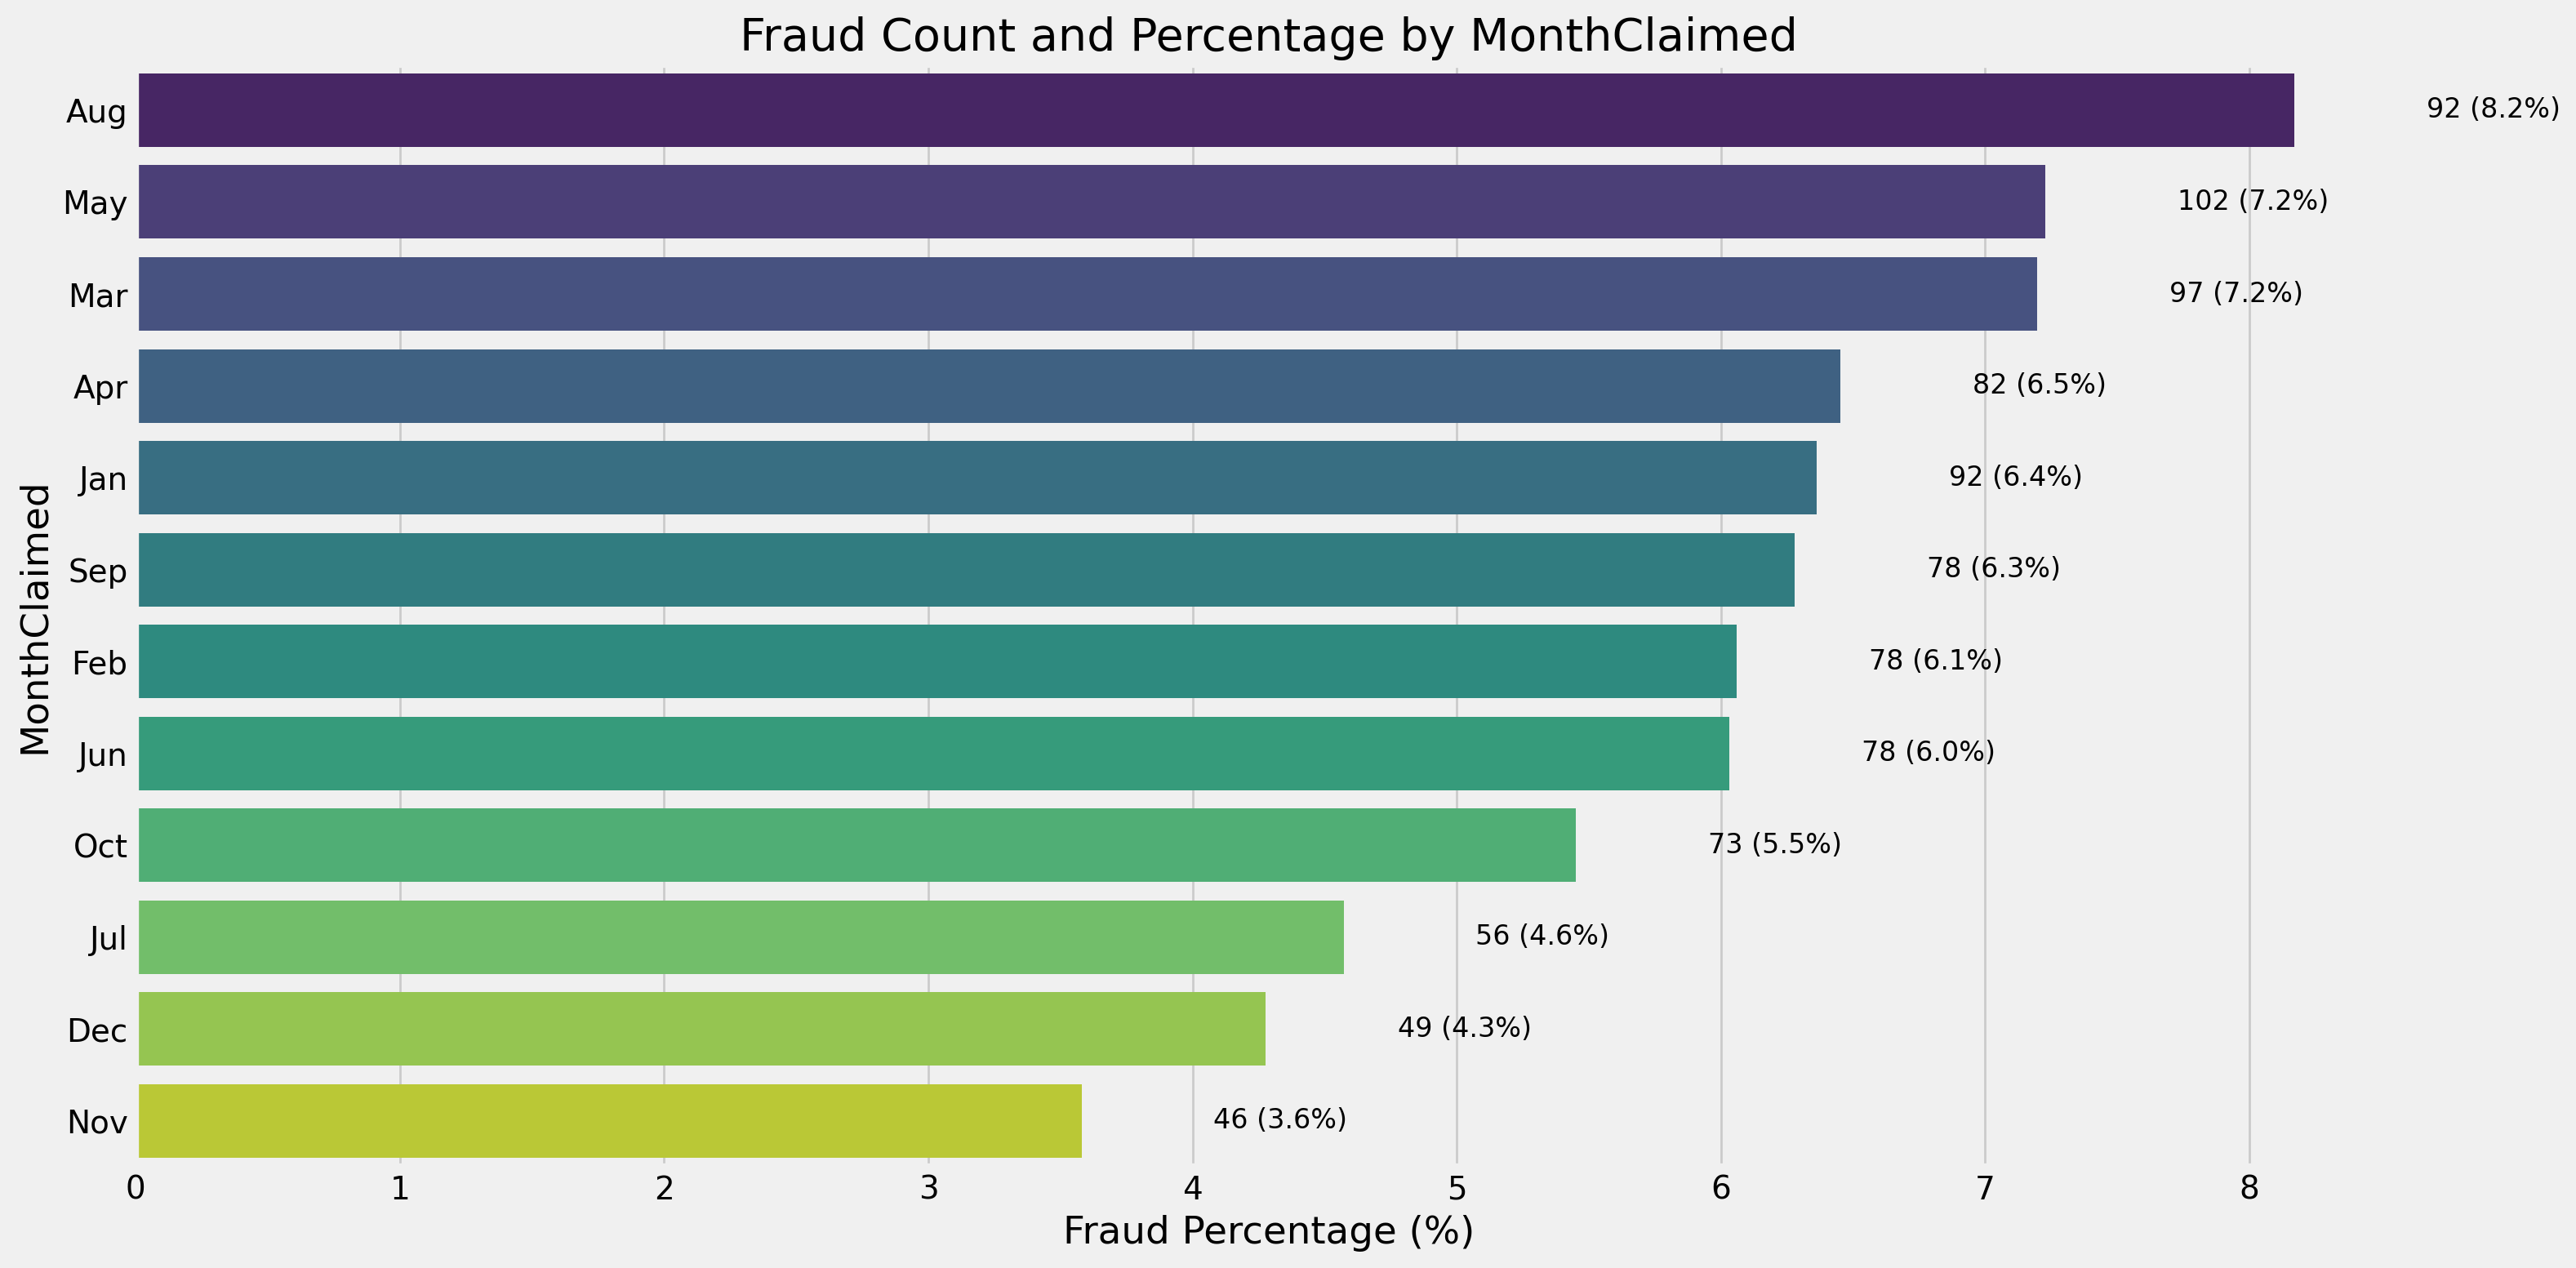

In [54]:
# Fraud detection by Month Claimed
plot_fraud_percentage_bar(fraud, 'MonthClaimed', sort_by='percentage', horizontal=True)

- The "Month" and "MonthClaimed" features have similar distributions, so we only need one of them.

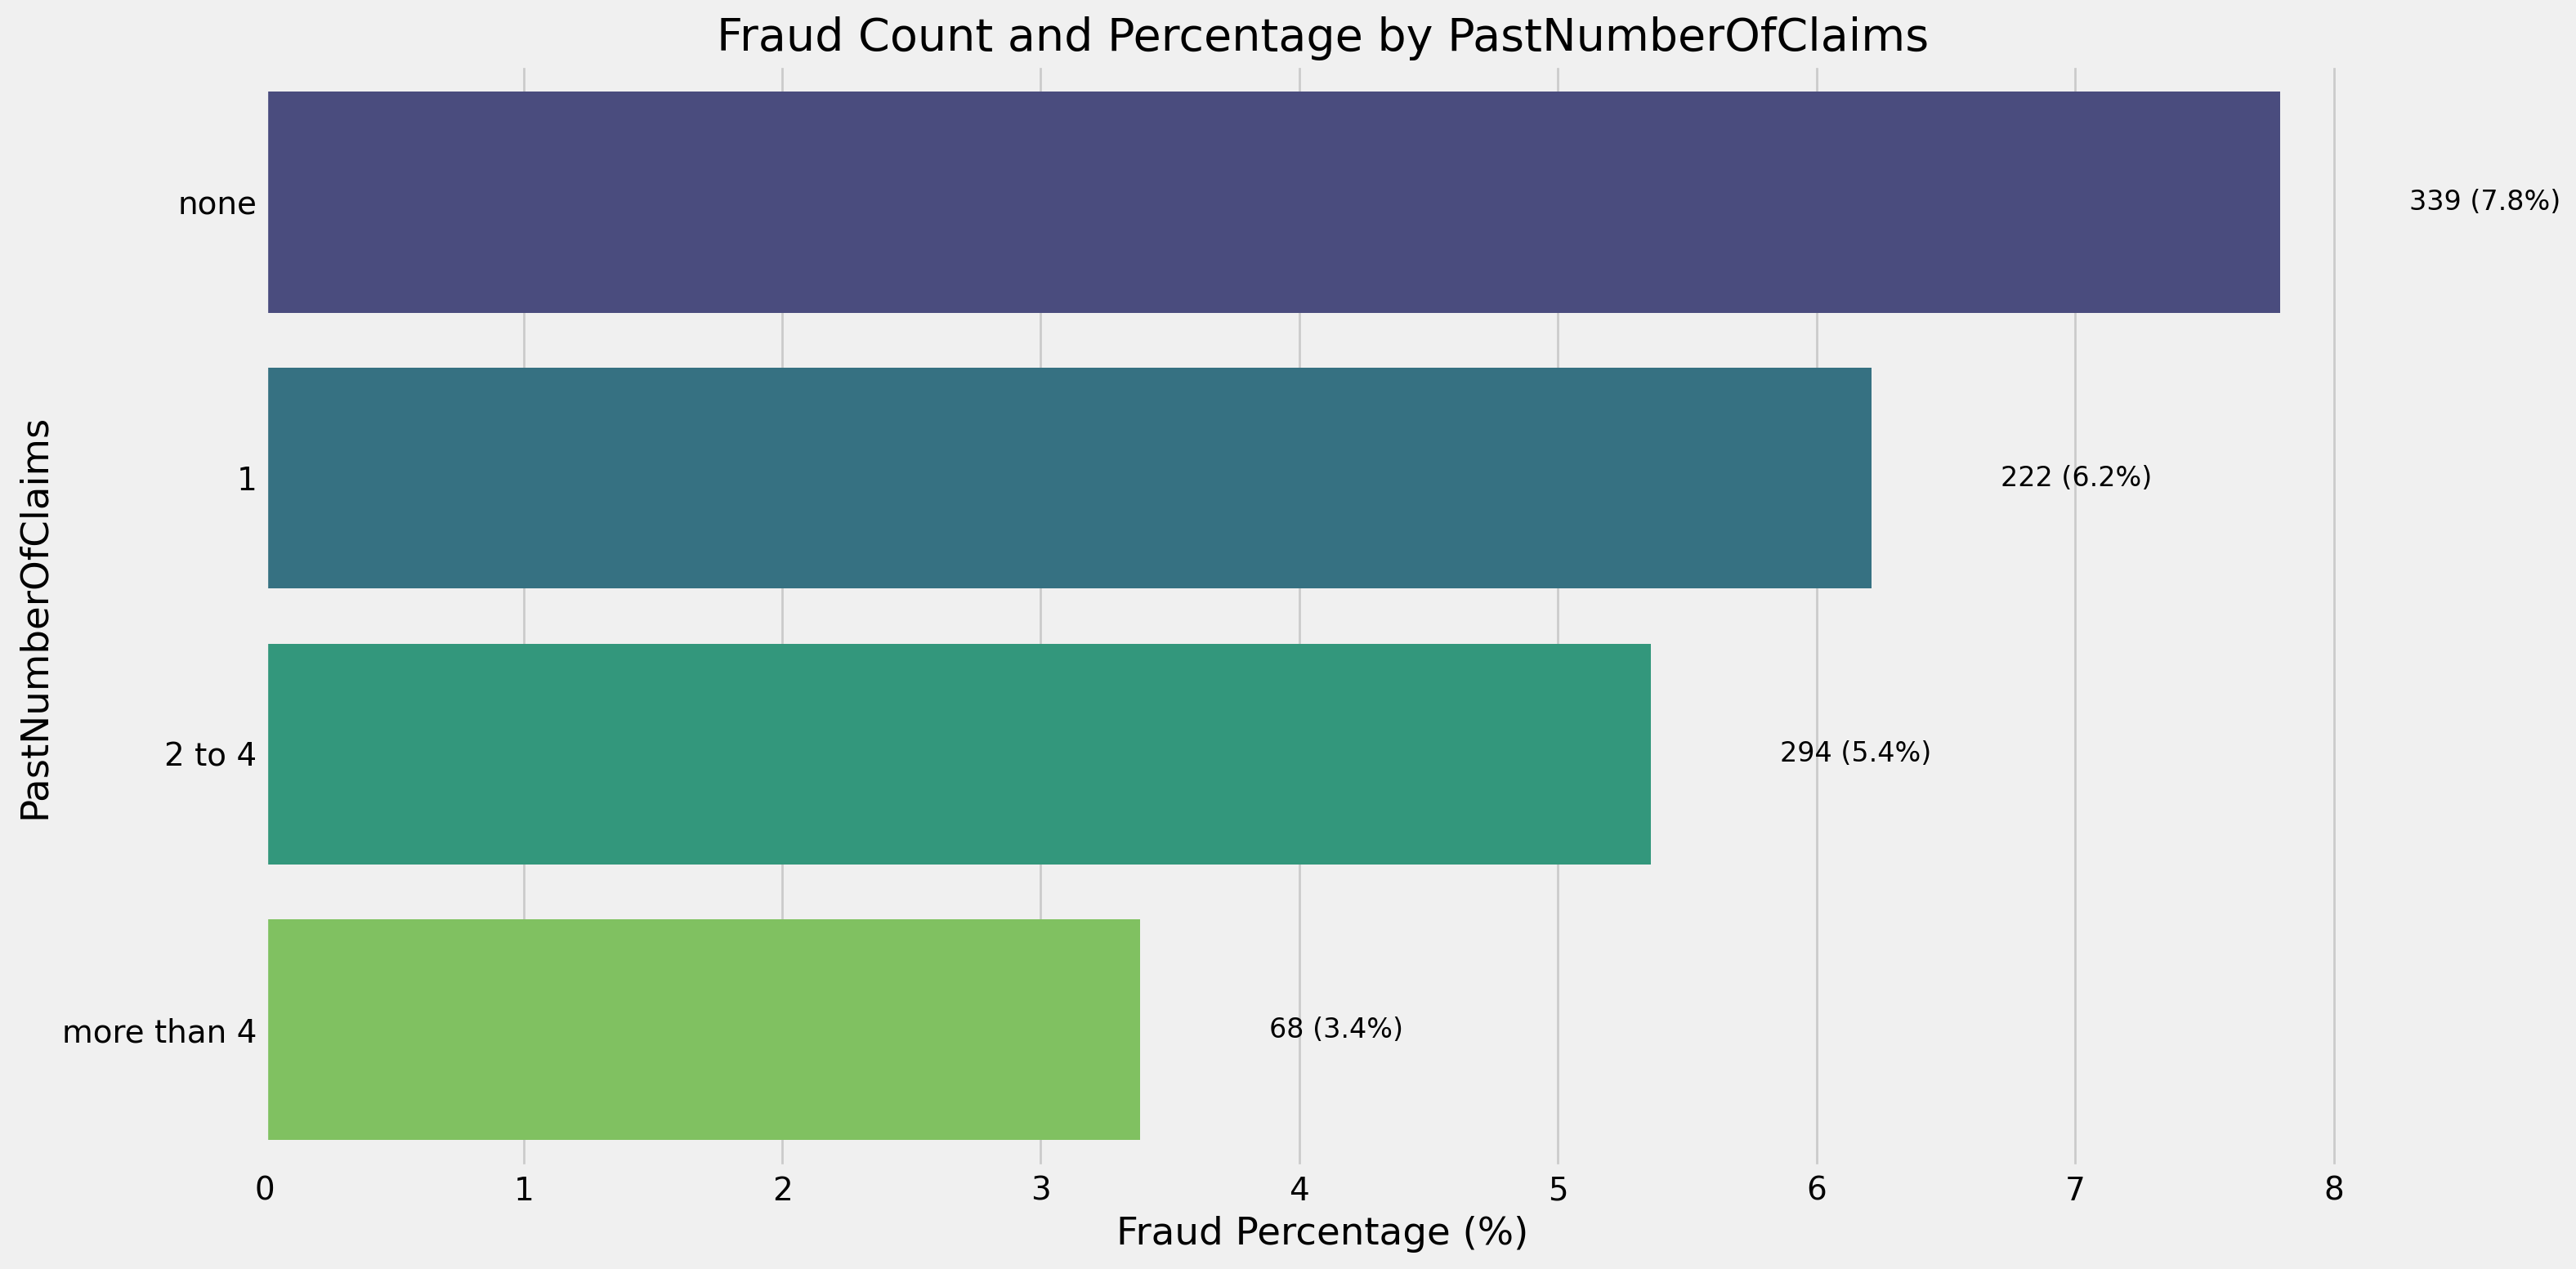

In [56]:
# Fraud detection by PastNumberOfClaims
plot_fraud_percentage_bar(fraud, 'PastNumberOfClaims', sort_by='percentage', horizontal=True)

-  Fraud was most frequently detected in cases where the Number of Claims was 'None'.

In [58]:
# Drop useless columns
useless_columns = ['Year', 'Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'WeekOfMonthClaimed', 'RepNumber']
fraud.drop(labels=useless_columns, axis=1, inplace=True)

In [59]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15419 entries, 0 to 15419
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  15419 non-null  object 
 1   AccidentArea          15419 non-null  object 
 2   MonthClaimed          15419 non-null  object 
 3   Sex                   15419 non-null  object 
 4   MaritalStatus         15419 non-null  object 
 5   Age                   15419 non-null  float64
 6   Fault                 15419 non-null  object 
 7   PolicyType            15419 non-null  object 
 8   VehicleCategory       15419 non-null  object 
 9   VehiclePrice          15419 non-null  object 
 10  FraudFound_P          15419 non-null  int64  
 11  Deductible            15419 non-null  int64  
 12  DriverRating          15419 non-null  int64  
 13  Days_Policy_Accident  15419 non-null  object 
 14  Days_Policy_Claim     15419 non-null  object 
 15  PastNumberOfClaims    15

In [60]:
# Binary Variable
# AccidentArea, Sex, Fault, PoliceReportFiled, WitnessPresent, AgentType
binary_columns = [col for col in fraud.columns if fraud[col].nunique() == 2 and col != 'FraudFound_P']
binary_columns

['AccidentArea',
 'Sex',
 'Fault',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType']

In [61]:
# Encoding Binary Variable
le = LabelEncoder()
for col in binary_columns:
    fraud[col] = le.fit_transform(fraud[col])
    print('Label Mapping: ', dict(zip(le.classes_, le.transform(le.classes_))))

Label Mapping:  {'Rural': 0, 'Urban': 1}
Label Mapping:  {'Female': 0, 'Male': 1}
Label Mapping:  {'Policy Holder': 0, 'Third Party': 1}
Label Mapping:  {'No': 0, 'Yes': 1}
Label Mapping:  {'No': 0, 'Yes': 1}
Label Mapping:  {'External': 0, 'Internal': 1}


In [62]:
for col in ['VehiclePrice', 'DriverRating', 'AgeOfVehicle', 'BasePolicy']:
    print(f"The unique values in {col}: {fraud[col].unique()}")

The unique values in VehiclePrice: ['more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000'
 '40000 to 59000' '60000 to 69000']
The unique values in DriverRating: [1 4 3 2]
The unique values in AgeOfVehicle: ['3 years' '6 years' '7 years' 'more than 7' '5 years' 'new' '4 years'
 '2 years']
The unique values in BasePolicy: ['Liability' 'Collision' 'All Perils']


In [63]:
# The "VehiclePrice" feature should be converted to binary rather than ordinal, as the categories "more than 69,000" and "less than 20,000" have the highest fraud rates, indicating that the feature does not follow an ordinal pattern.
VehiclePrice_label = {'more than 69000': 1, '20000 to 29000': 0,  '30000 to 39000': 0, 'less than 20000': 1, '40000 to 59000': 1, '60000 to 69000': 0}

# The "AgeOfVehicle" feature should be transformed into a nominal categorical variable, similar to "VehiclePrice." However, it can be reclassified into three distinct categories.
AgeOfVehicle_label = {'new': 2, '2 years': 0, '3 years': 2, '4 years': 2, '5 years': 1, '6 years': 1, '7 years': 0, 'more than 7': 0}

# The "BasePolicy" feature is an ordinal categorical variable.
BasePolicy_label = {'Liability': 0, 'Collision': 1, 'All Perils': 2}

In [64]:
fraud['VehiclePrice'] = fraud['VehiclePrice'].map(VehiclePrice_label)
fraud['AgeOfVehicle'] = fraud['AgeOfVehicle'].map(AgeOfVehicle_label)
fraud['BasePolicy'] = fraud['BasePolicy'].map(BasePolicy_label)

In [65]:
dummy_columns = ['Make', 'MonthClaimed', 'MaritalStatus', 'PolicyType', 'VehicleCategory', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfPolicyHolder', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars']
print('The number of dummy columns: ', len(dummy_columns))

The number of dummy columns:  12


In [66]:
fraud_with_dummies = pd.get_dummies(fraud, columns=dummy_columns)

In [67]:
fraud_with_dummies.shape

(15419, 95)

In [68]:
fraud_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15419 entries, 0 to 15419
Data columns (total 95 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   AccidentArea                        15419 non-null  int32  
 1   Sex                                 15419 non-null  int32  
 2   Age                                 15419 non-null  float64
 3   Fault                               15419 non-null  int32  
 4   VehiclePrice                        15419 non-null  int64  
 5   FraudFound_P                        15419 non-null  int64  
 6   Deductible                          15419 non-null  int64  
 7   DriverRating                        15419 non-null  int64  
 8   AgeOfVehicle                        15419 non-null  int64  
 9   PoliceReportFiled                   15419 non-null  int32  
 10  WitnessPresent                      15419 non-null  int32  
 11  AgentType                           15419 non-

In [69]:
fraud_with_dummies.shape

(15419, 95)

In [70]:
target_col = 'FraudFound_P'
feature_cols = [col for col in fraud_with_dummies.columns if col != 'FraudFound_P' ]

X = fraud_with_dummies[feature_cols]
y= fraud_with_dummies[target_col]

In [71]:
#  top 10 features using a Random Forest machine learning model 
model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
model.fit(X, y)

importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance and get top 10
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

print(top_10_features)

                         Feature  Importance
3                          Fault    0.124495
2                            Age    0.095073
6                   DriverRating    0.050399
11                    BasePolicy    0.048236
49  PolicyType_Sedan - Liability    0.036936
57         VehicleCategory_Sport    0.030069
7                   AgeOfVehicle    0.021419
56         VehicleCategory_Sedan    0.021367
70       PastNumberOfClaims_none    0.018600
83      NumberOfSuppliments_none    0.018108


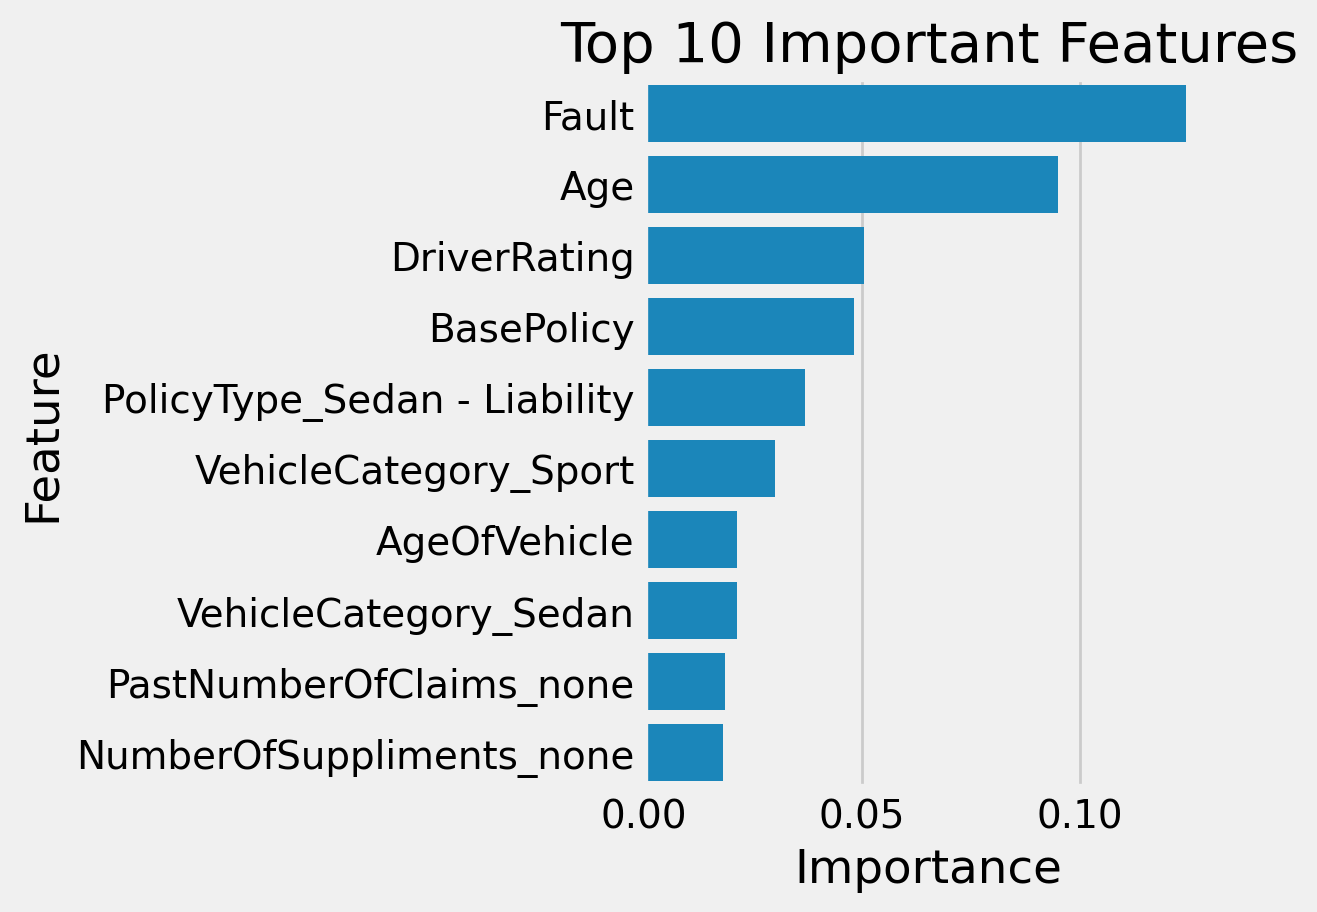

In [72]:
# Visualization of feature_importance
sns.barplot(x='Importance', y='Feature', data=top_10_features)
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()

In [73]:
top10_columns = [col for col in top_10_features['Feature']]
new_columns = top10_columns + ['FraudFound_P']
fraud_with_dummies_new = fraud_with_dummies[new_columns]

In [74]:
# normalization
# Apply normalisation (convert all ranges to [0-1]) for visualisation purposes.
scaler = MinMaxScaler(feature_range = (0, 1))
fraud_new_normalized = pd.DataFrame(scaler.fit_transform(fraud_with_dummies_new), columns=new_columns)

In [75]:
fraud_new_normalized.head()

Fault       Age  DriverRating  BasePolicy  PolicyType_Sedan - Liability  \
0    0.0  0.078125      0.000000         0.0                           0.0   
1    0.0  0.281250      1.000000         0.5                           0.0   
2    0.0  0.484375      0.666667         0.5                           0.0   
3    1.0  0.765625      0.333333         0.0                           1.0   
4    1.0  0.171875      0.000000         0.5                           0.0   

   VehicleCategory_Sport  AgeOfVehicle  VehicleCategory_Sedan  \
0                    1.0           1.0                    0.0   
1                    1.0           0.5                    0.0   
2                    1.0           0.0                    0.0   
3                    1.0           0.0                    0.0   
4                    1.0           0.5                    0.0   

   PastNumberOfClaims_none  NumberOfSuppliments_none  FraudFound_P  
0                      1.0                       1.0           0.0  
1                      1.0                       1.0           0.0  
2                      0.0                       1.0           0.0  
3                      0.0                       0.0           0.0  
4                      1.0                       1.0           0.0

In [76]:
fraud_new_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Fault                         15419 non-null  float64
 1   Age                           15419 non-null  float64
 2   DriverRating                  15419 non-null  float64
 3   BasePolicy                    15419 non-null  float64
 4   PolicyType_Sedan - Liability  15419 non-null  float64
 5   VehicleCategory_Sport         15419 non-null  float64
 6   AgeOfVehicle                  15419 non-null  float64
 7   VehicleCategory_Sedan         15419 non-null  float64
 8   PastNumberOfClaims_none       15419 non-null  float64
 9   NumberOfSuppliments_none      15419 non-null  float64
 10  FraudFound_P                  15419 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


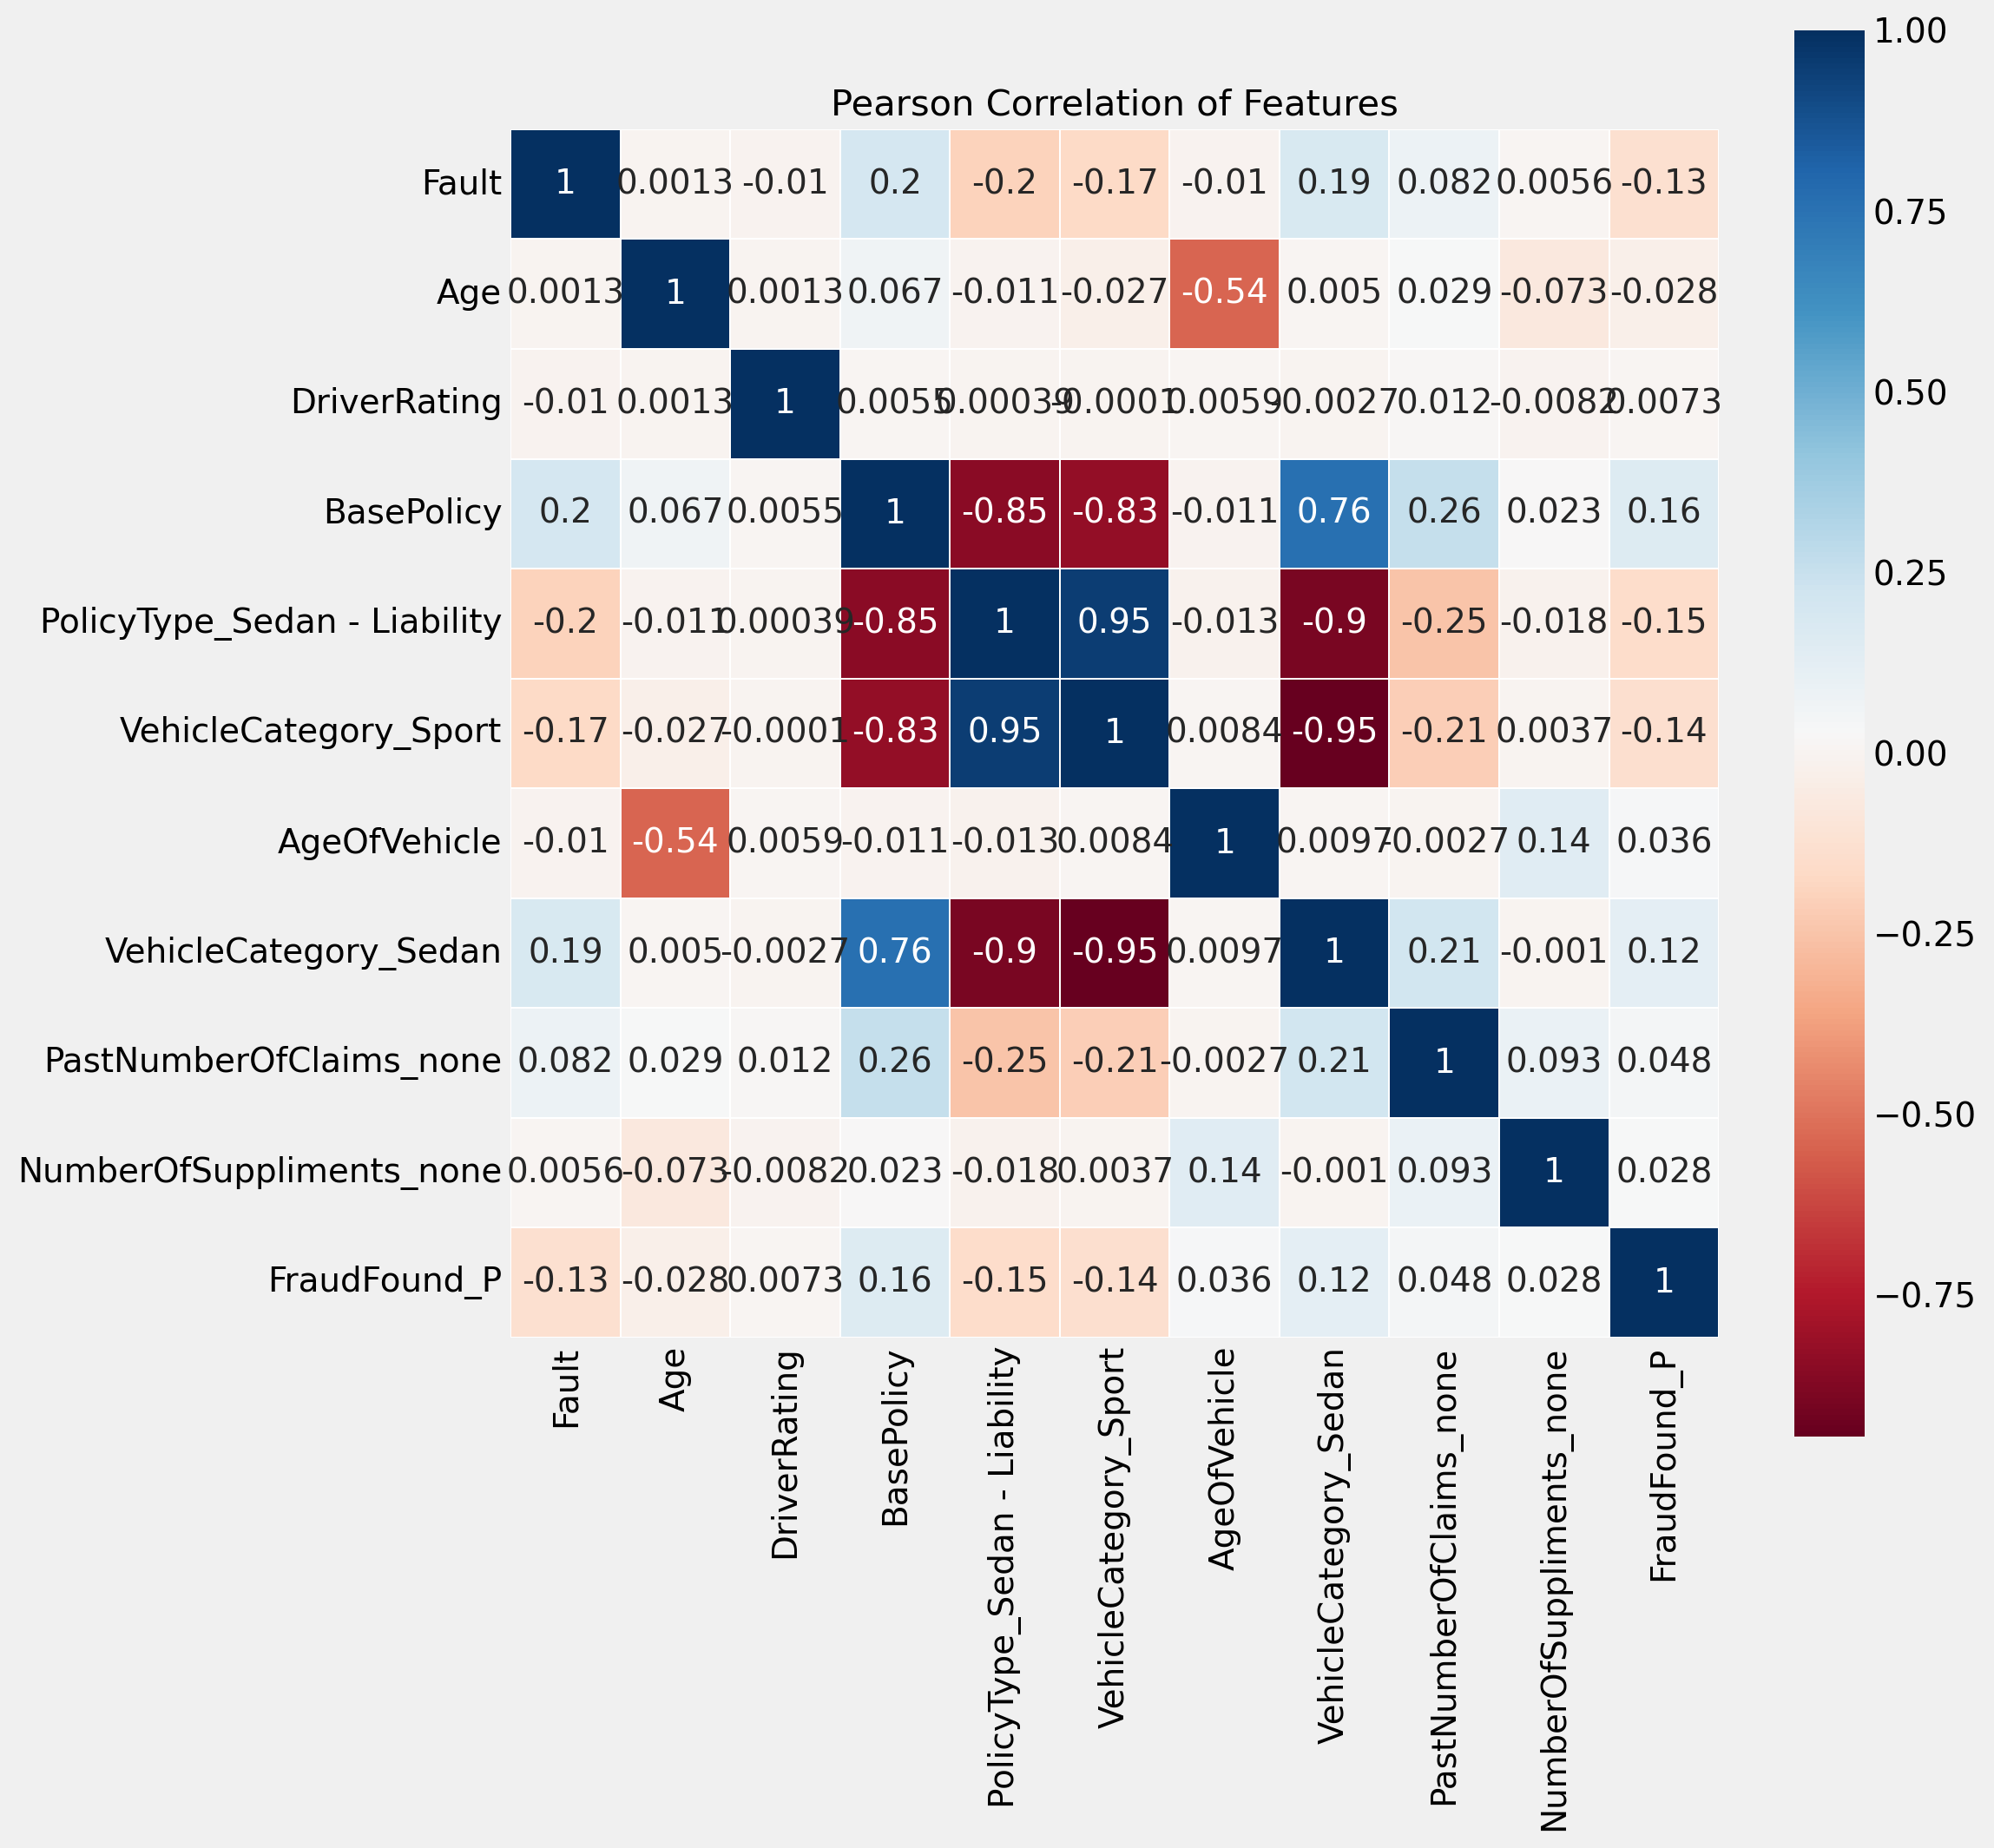

In [77]:
# Pearson Correlation Heatmap
colormap = plt.cm.RdBu
plt.figure(figsize = (10, 10))
plt.title('Pearson Correlation of Features', size = 15)
sns.heatmap(fraud_new_normalized.astype(float).corr(),
            linewidths = 0.1,
            vmax = 1.0,
            square = True,
            cmap = colormap,
            linecolor = 'white',
            annot = True)
plt.show()

In [78]:
# drop features: "VehicleCategory_Sport", "PolicyType_Sedan - Liability", "VehicleCategory_Sedan"
fraud_new_normalized.drop(["VehicleCategory_Sport", "PolicyType_Sedan - Liability", "VehicleCategory_Sedan"], axis=1, inplace=True)

In [79]:
fraud_new_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fault                     15419 non-null  float64
 1   Age                       15419 non-null  float64
 2   DriverRating              15419 non-null  float64
 3   BasePolicy                15419 non-null  float64
 4   AgeOfVehicle              15419 non-null  float64
 5   PastNumberOfClaims_none   15419 non-null  float64
 6   NumberOfSuppliments_none  15419 non-null  float64
 7   FraudFound_P              15419 non-null  float64
dtypes: float64(8)
memory usage: 963.8 KB


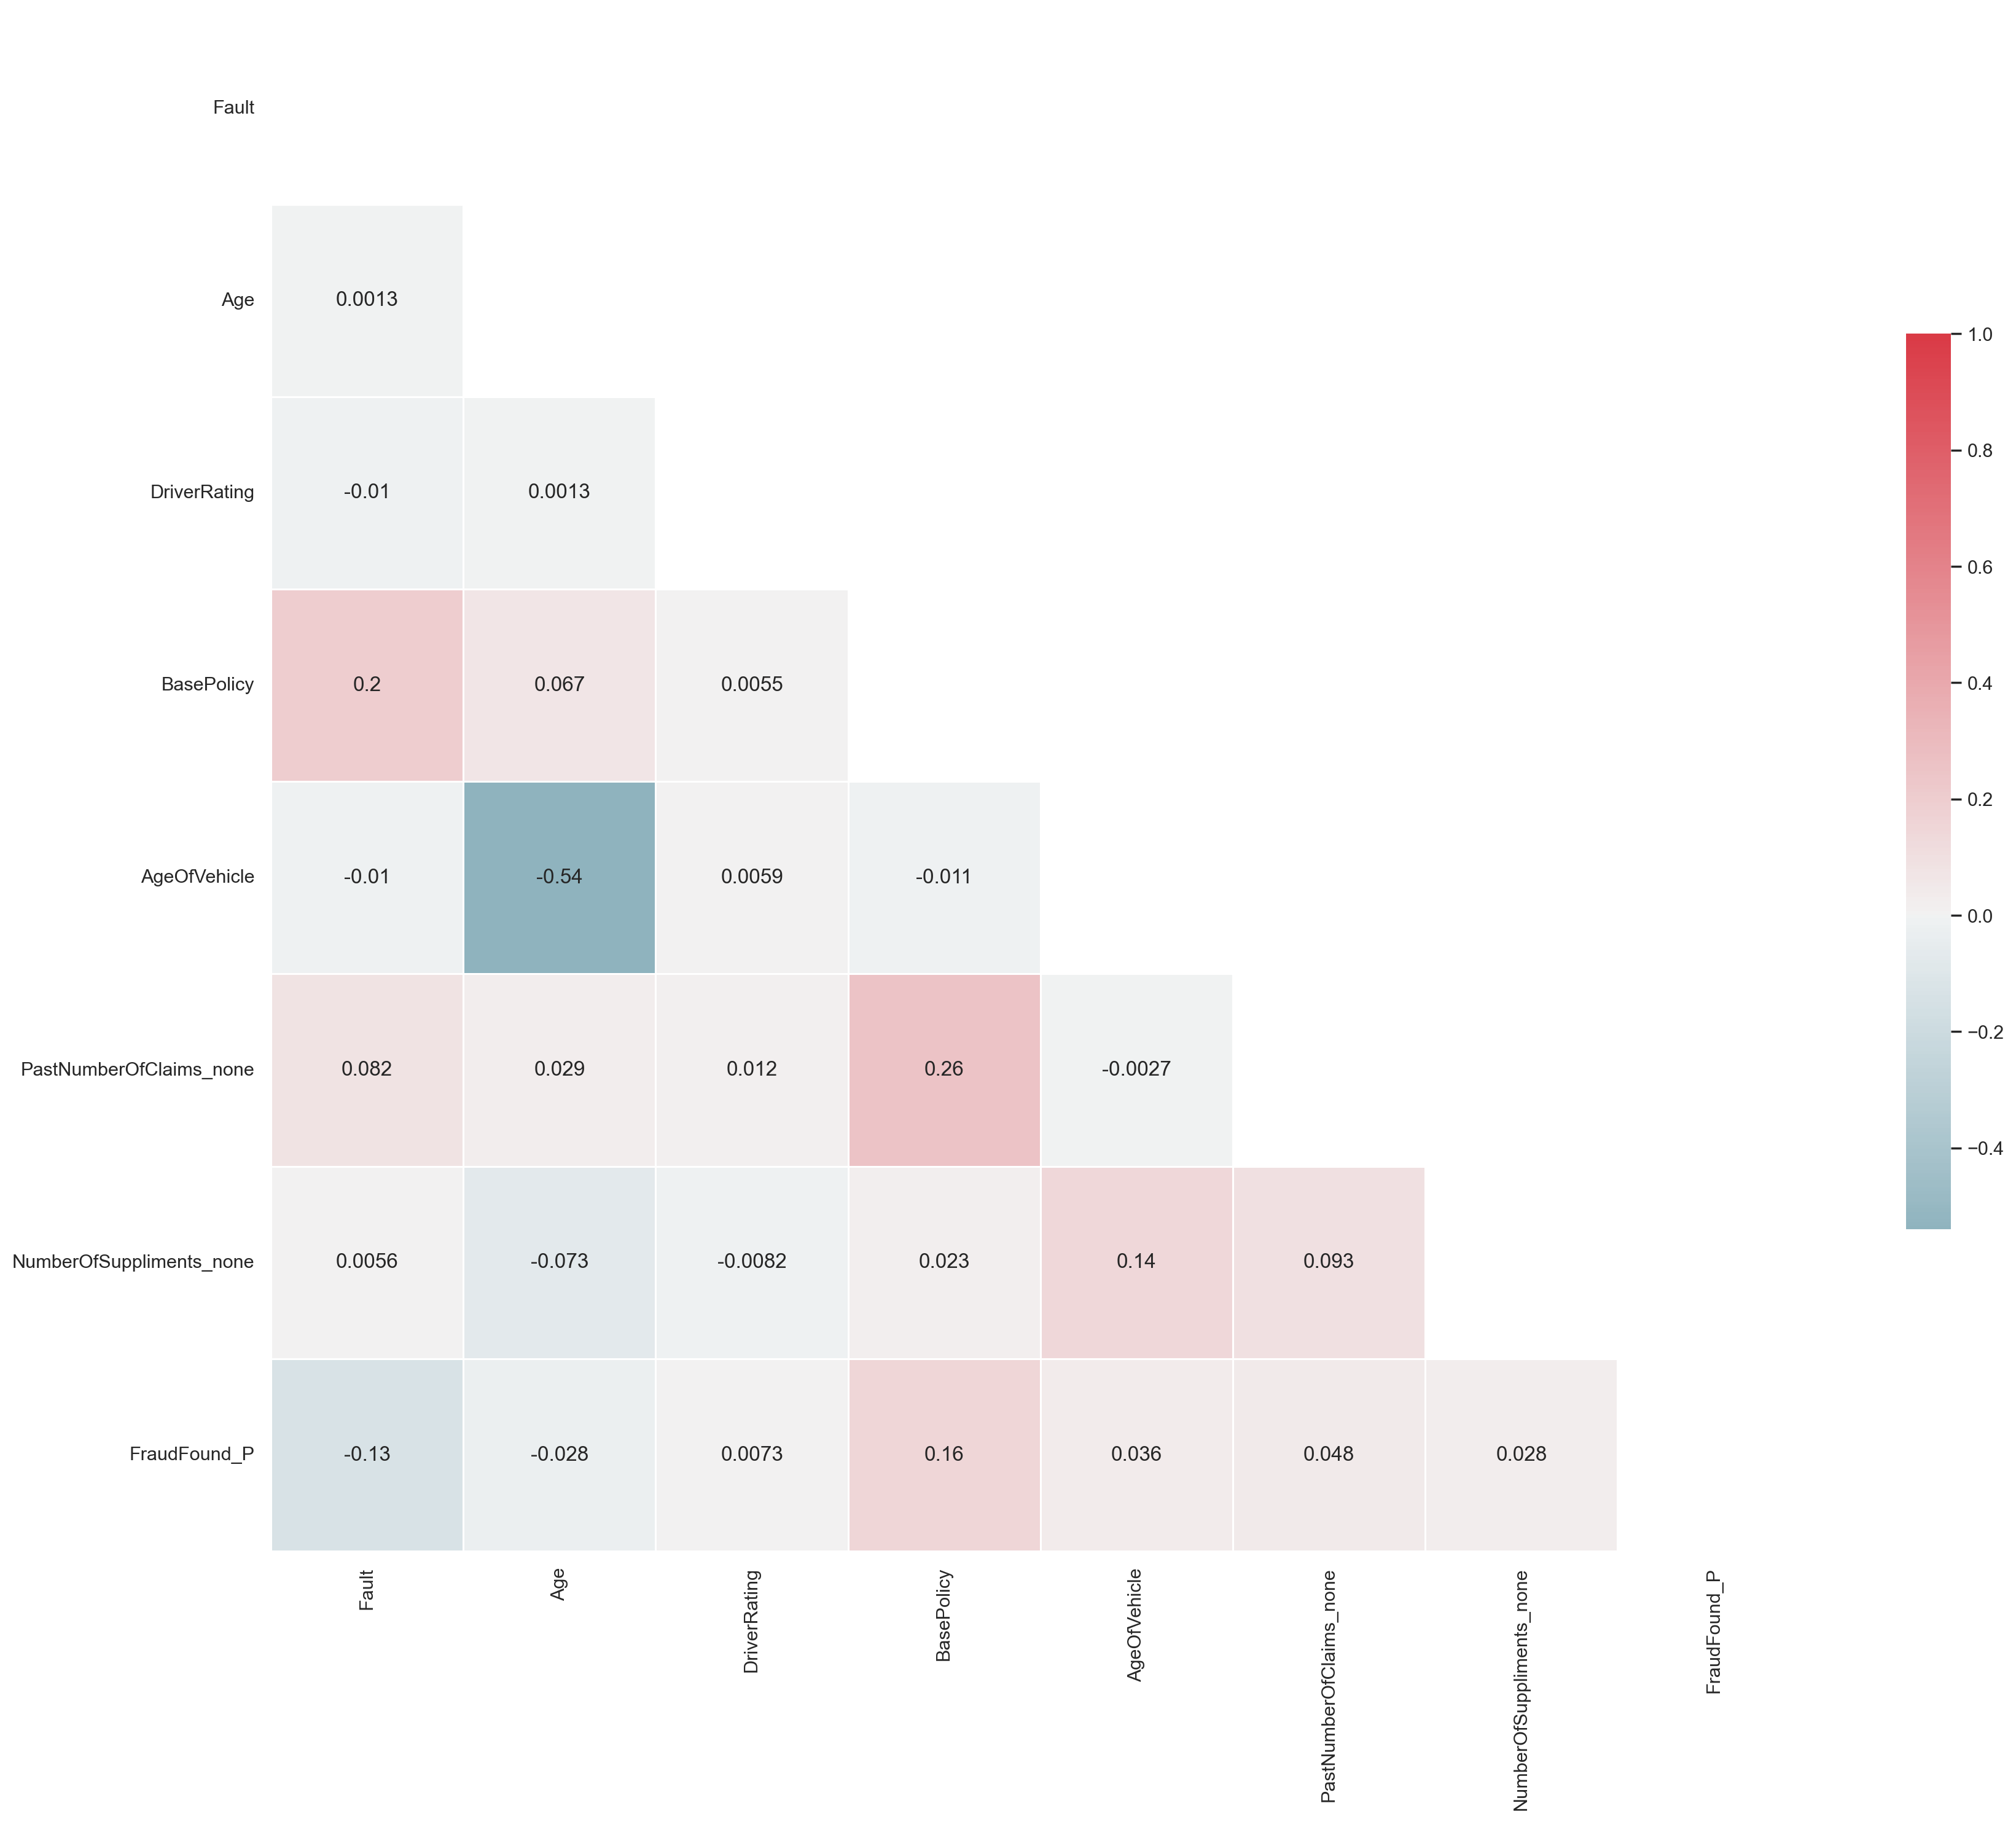

In [80]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(fraud_new_normalized.corr(numeric_only = True), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(fraud_new_normalized.corr(numeric_only = True), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

In [81]:
# move the data back to a dataframe
fraud_new_normalized['FraudFound_P'] = fraud_new_normalized['FraudFound_P'].astype(np.int8)
fraud_new_normalized.sample(5)

Fault       Age  DriverRating  BasePolicy  AgeOfVehicle  \
10318    1.0  0.234375      1.000000         0.0           0.5   
13773    0.0  0.609375      0.333333         0.5           0.5   
8005     0.0  0.390625      0.666667         0.5           0.0   
3818     0.0  0.281250      0.000000         1.0           0.5   
12075    0.0  0.312500      0.000000         0.0           0.0   

       PastNumberOfClaims_none  NumberOfSuppliments_none  FraudFound_P  
10318                      1.0                       1.0             0  
13773                      0.0                       0.0             0  
8005                       0.0                       1.0             0  
3818                       1.0                       0.0             1  
12075                      0.0                       0.0             0

### 3. Split Data

In [83]:
target_col = 'FraudFound_P'
feature_cols = [col for col in fraud_new_normalized.columns if col != target_col]

X = fraud_new_normalized[feature_cols]
y = fraud_new_normalized[target_col]

# split data
## Create training and testing subsets
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = test_size,
                                                    random_state = 100666001,
                                                    stratify = y)

### 4. Train Models on the Training Dataset and Evaluate Models on the Test Dataset

In [85]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(float)

    prediction_int = np.round(prediction)

    accuracy_ = accuracy_score(actual, prediction_int)
    precision_ = precision_score(actual, prediction_int)
    recall_ = recall_score(actual, prediction_int)
    f1_ = f1_score(actual, prediction_int, average=None)[1]
    roc_auc_ = roc_auc_score(actual, prediction_int)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('F1_Score : %.4f [2 * Precision * Recall / (Precision + Recall)]                     Best: 1, Worst: 0' % f1_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')
    print('-' * 107)
    ###
    print("Using classification_report ")
    print(classification_report(actual, prediction_int))
    ###

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction_int)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction_int)
    average_precision = average_precision_score(actual, prediction_int)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction_int)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')

    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()

    return (accuracy_, precision_, recall_, f1_, roc_auc_)

In [86]:
np.random.seed(0)

# Create models

# Logistic Regression
lr_model = LogisticRegression(solver='liblinear', max_iter = 10000, class_weight='balanced')
#lr = LogisticRegression(multi_class = 'auto', solver = 'lbfgs', class_weight='balanced')
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

# Support Vector Machine
svc_model = SVC(kernel='poly', probability=True, class_weight='balanced')
svc_model.fit(X_train, y_train)
svc_model.score(X_test, y_test)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
svc_model.score(X_test, y_test)

# K-NN
knn_model = KNeighborsClassifier(n_neighbors = 1, weights='distance')
knn_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators = 100, random_state=1, class_weight='balanced')
rf_model.fit(X_train, y_train)

# XGBoost Model
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    use_label_encoder=False
)
xgb_model.fit(X_train, y_train)

# Create the ensemble model
ens_model = StackingClassifier(classifiers = [svc_model, rf_model, xgb_model], meta_classifier = lr_model)
ens_model.fit(X_train, y_train)

StackingClassifier(classifiers=[SVC(class_weight='balanced', kernel='poly',
                                    probability=True),
                                RandomForestClassifier(class_weight='balanced',
                                                       random_state=1),
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_m...
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None, ...)],
                   meta_classifier=LogisticRegression(class_weight='balanced',
                                                      max_iter=10000,
                                                      solver='liblinear'))

***********************
* Logistic Regression *
***********************
Accuracy : 0.6585 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.1309 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8339 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
F1_Score : 0.2262 [2 * Precision * Recall / (Precision + Recall)]                     Best: 1, Worst: 0
ROC AUC  : 0.7406                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
-----------------------------------------------------------------------------------------------------------
Using classification_report 
              precision    recall  f1-score   support

 

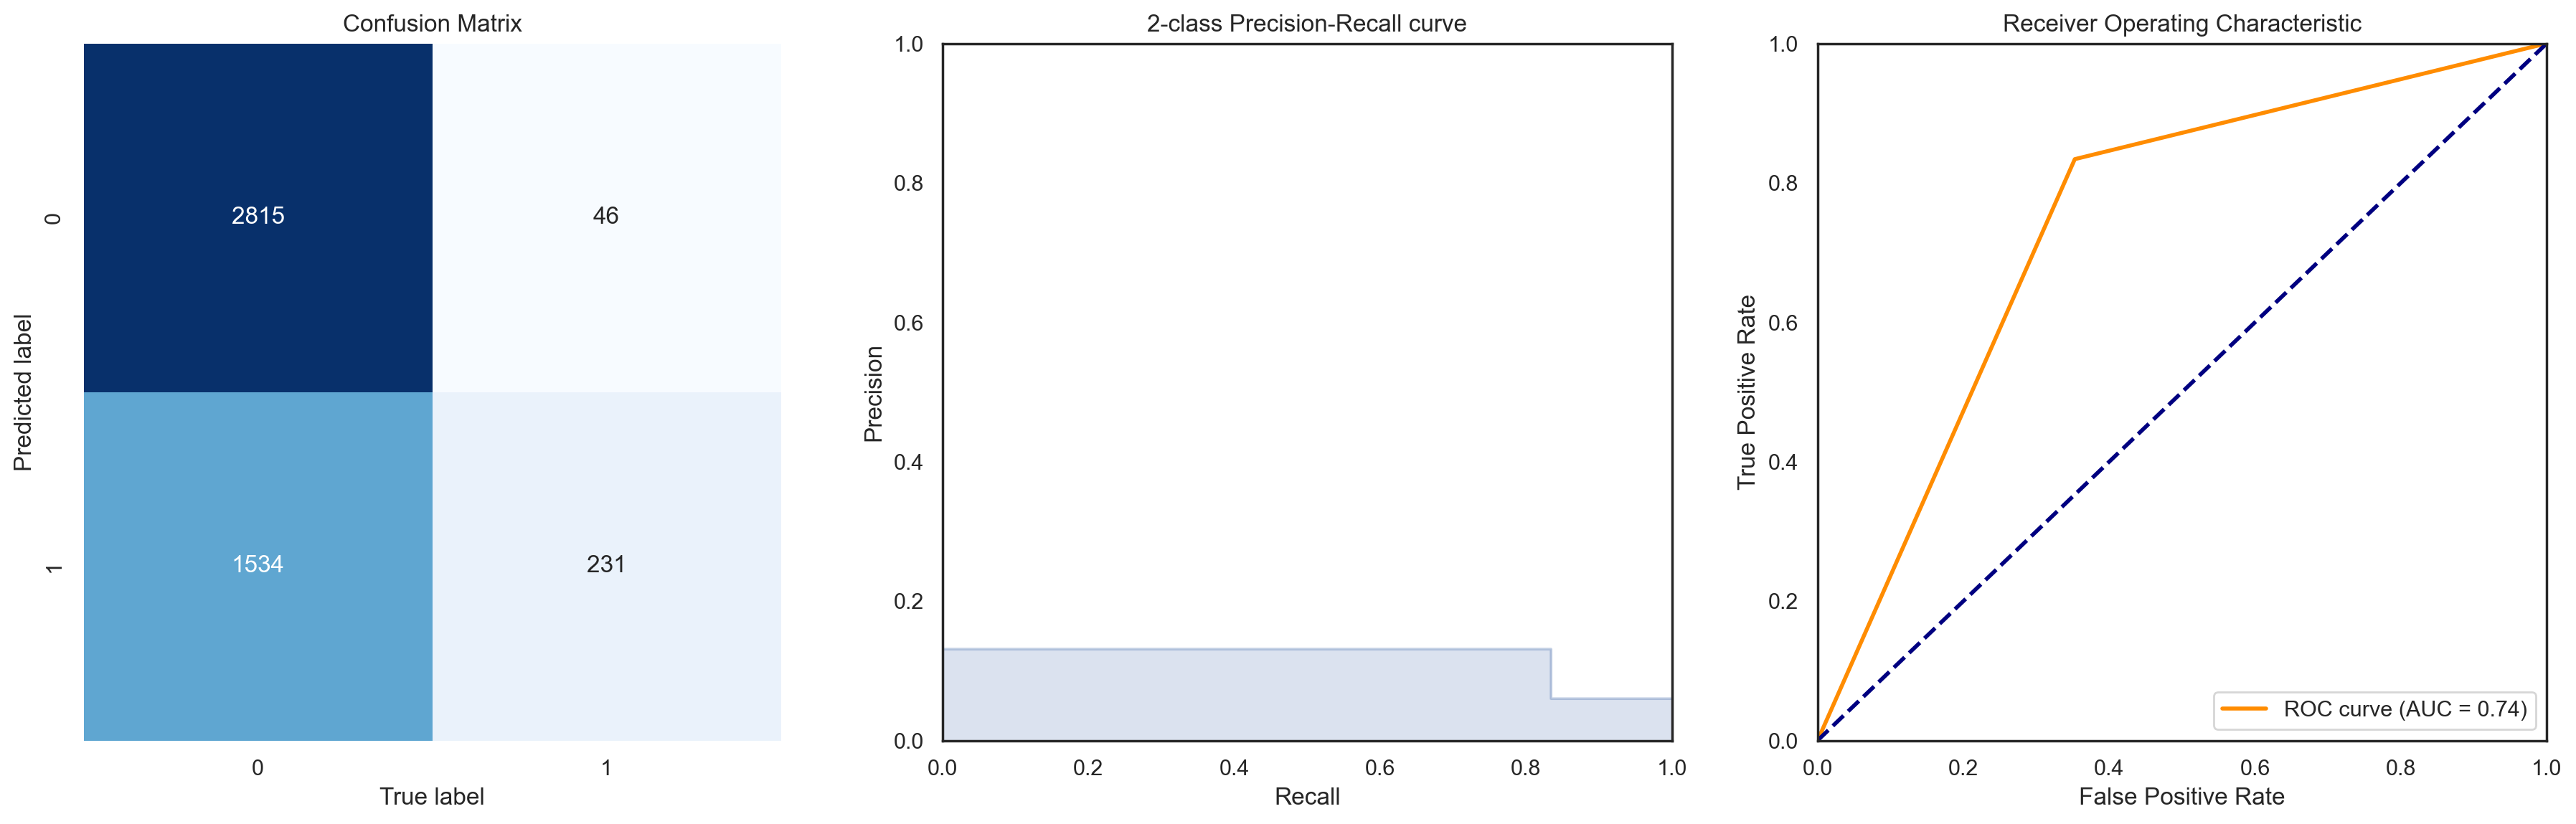

**************************
* Support Vector Machine *
**************************
Accuracy : 0.7041 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.1384 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7545 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
F1_Score : 0.2339 [2 * Precision * Recall / (Precision + Recall)]                     Best: 1, Worst: 0
ROC AUC  : 0.7277                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
-----------------------------------------------------------------------------------------------------------
Using classification_report 
              precision    recall  f1-score   s

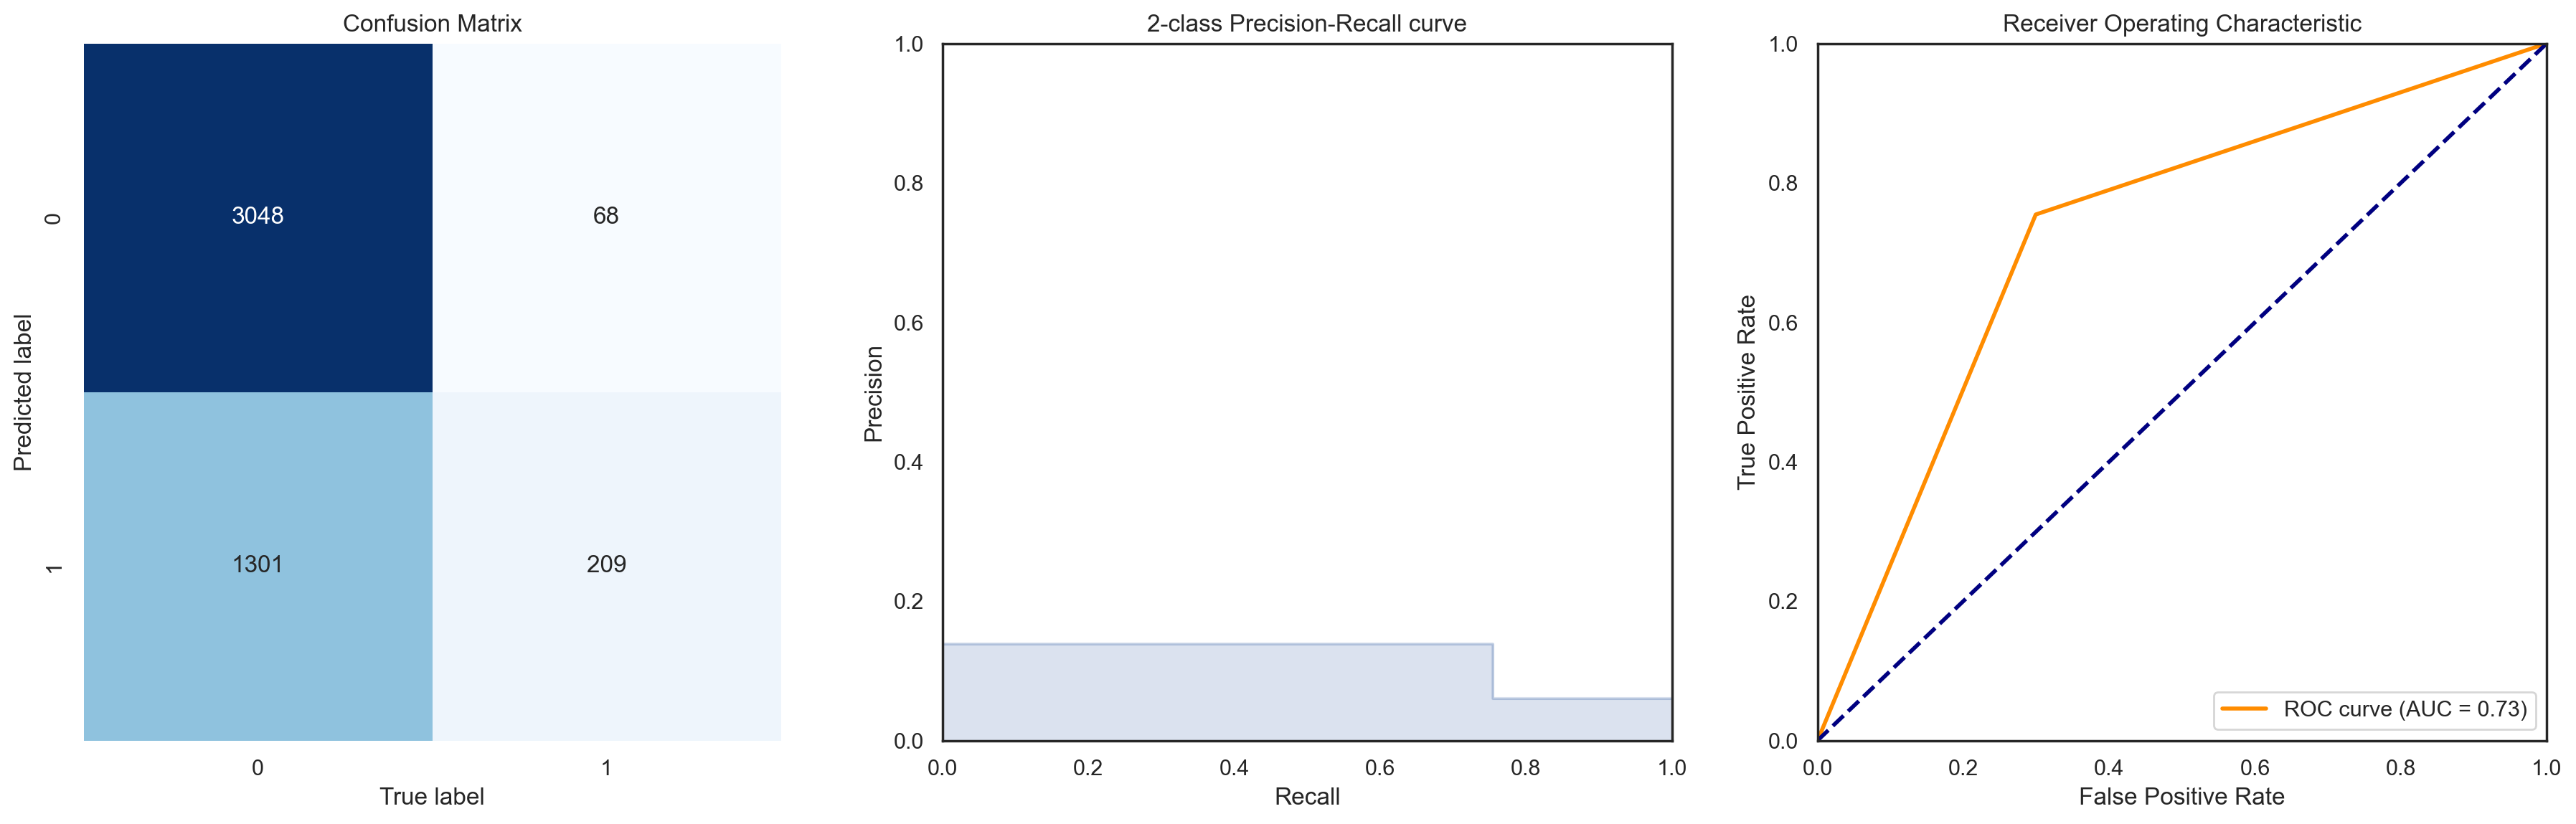

***************
* Naive Bayes *
***************
Accuracy : 0.9364 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.2821 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0397 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
F1_Score : 0.0696 [2 * Precision * Recall / (Precision + Recall)]                     Best: 1, Worst: 0
ROC AUC  : 0.5166                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
-----------------------------------------------------------------------------------------------------------
Using classification_report 
              precision    recall  f1-score   support

           0       0.94  

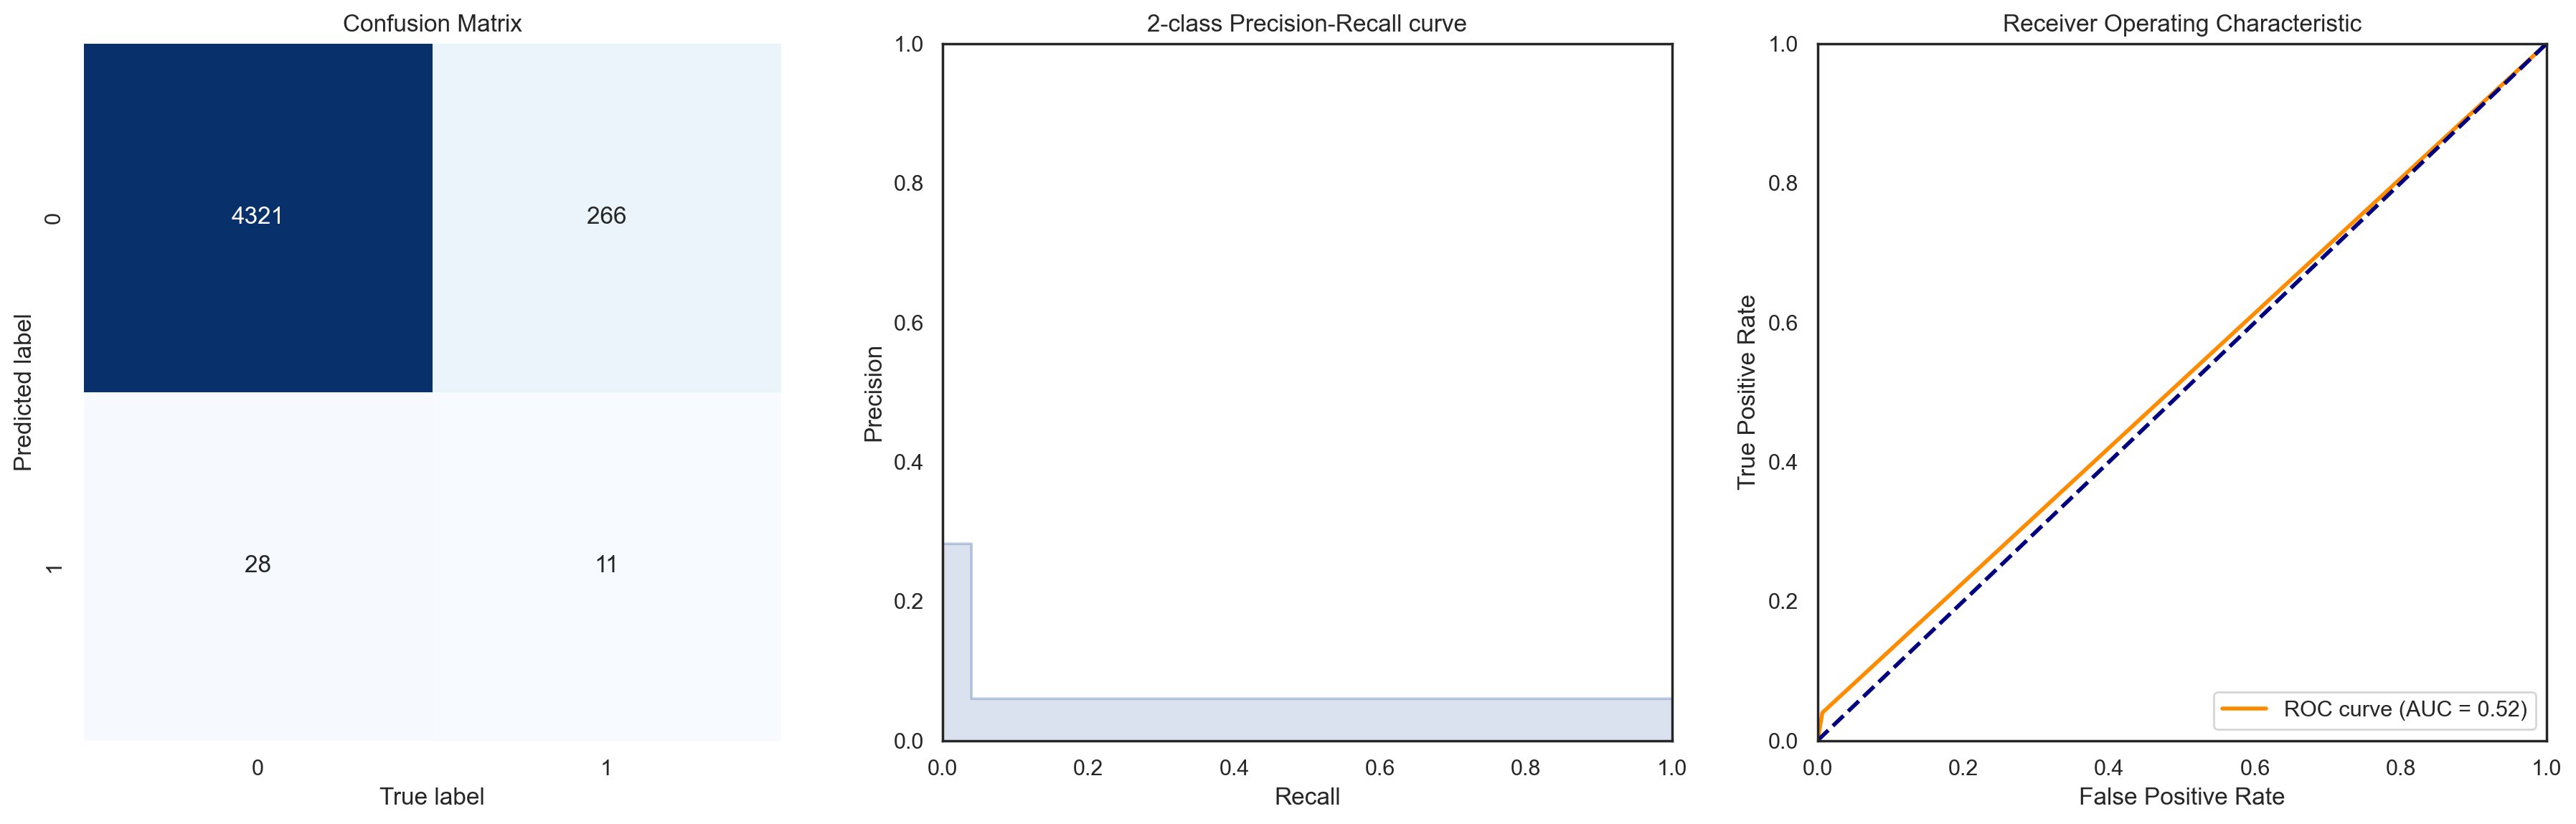

********
* K-NN *
********
Accuracy : 0.8973 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.1514 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.1552 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
F1_Score : 0.1533 [2 * Precision * Recall / (Precision + Recall)]                     Best: 1, Worst: 0
ROC AUC  : 0.5499                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
-----------------------------------------------------------------------------------------------------------
Using classification_report 
              precision    recall  f1-score   support

           0       0.95      0.94      0.95   

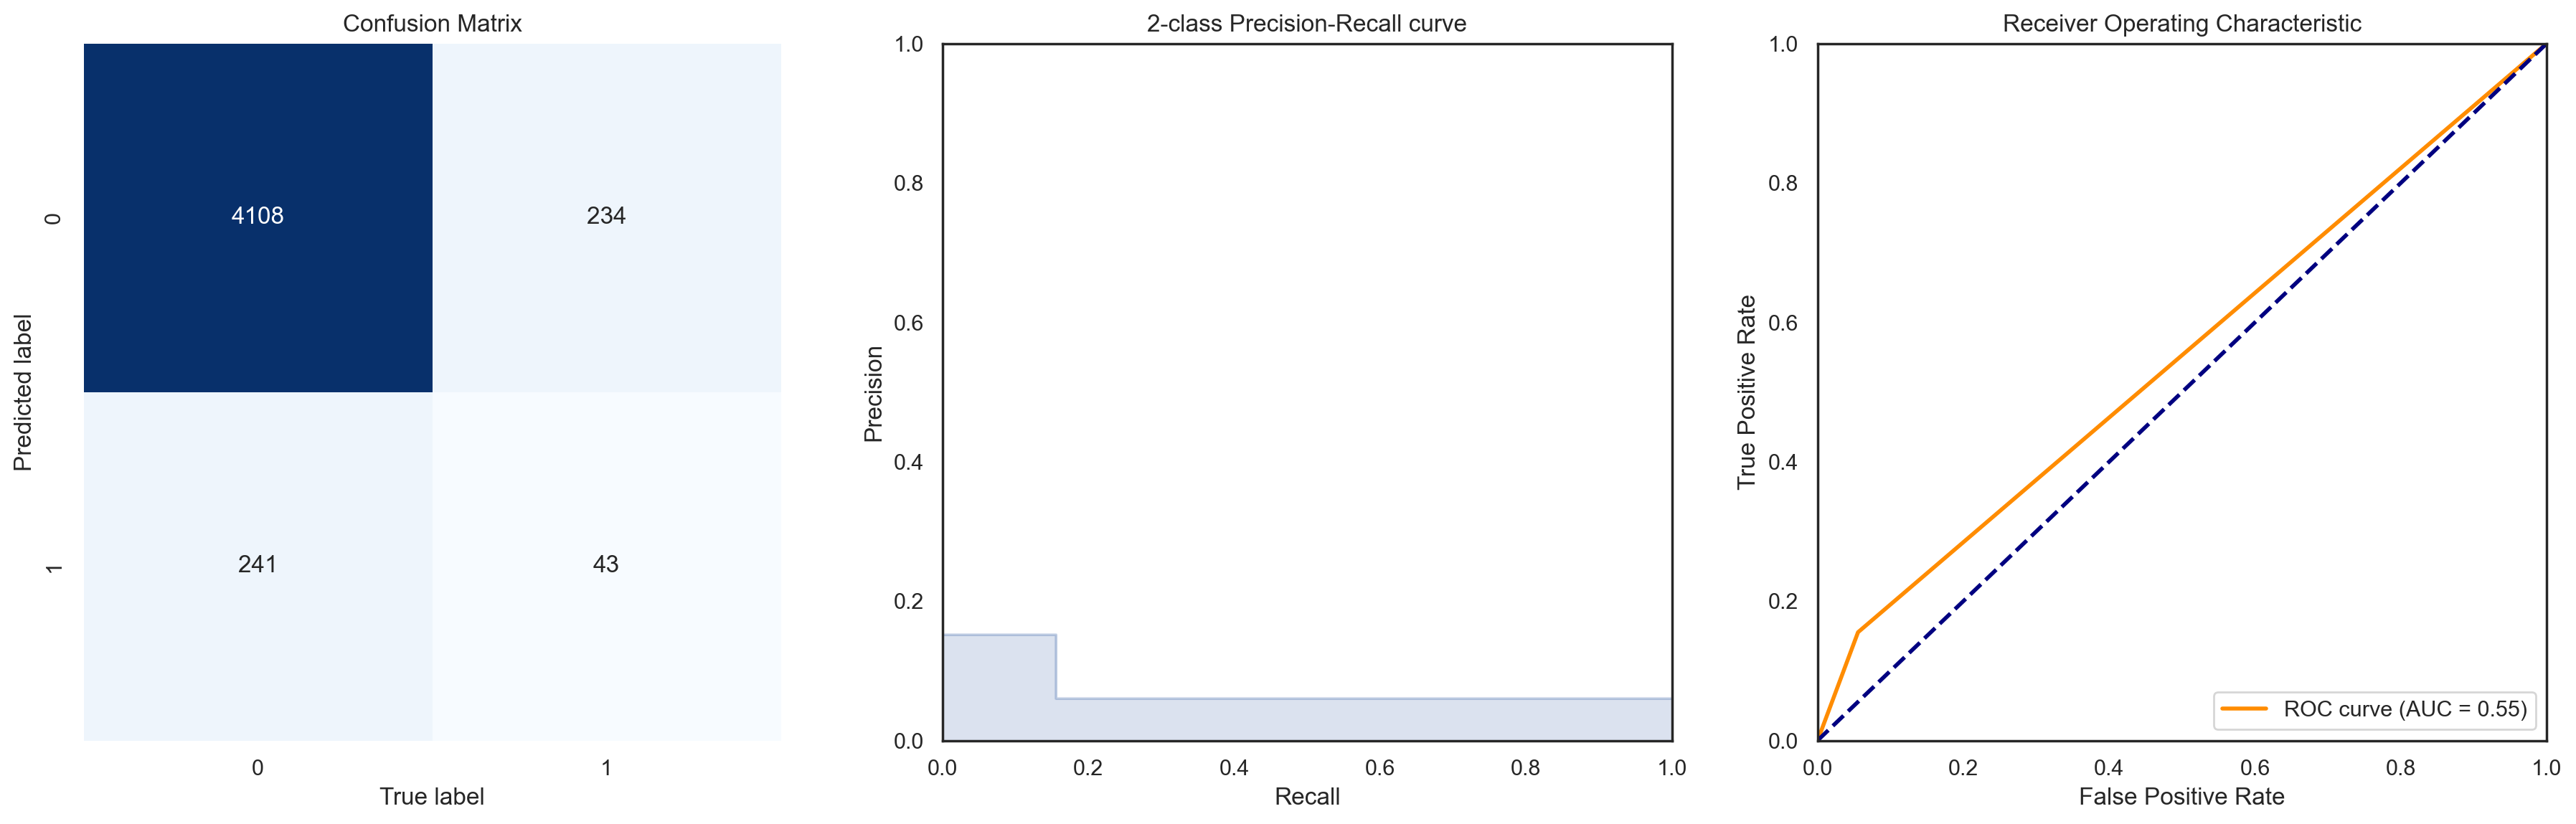

*****************
* Random Forest *
*****************
Accuracy : 0.8612 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.1639 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.3213 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
F1_Score : 0.2171 [2 * Precision * Recall / (Precision + Recall)]                     Best: 1, Worst: 0
ROC AUC  : 0.6085                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
-----------------------------------------------------------------------------------------------------------
Using classification_report 
              precision    recall  f1-score   support

           0       

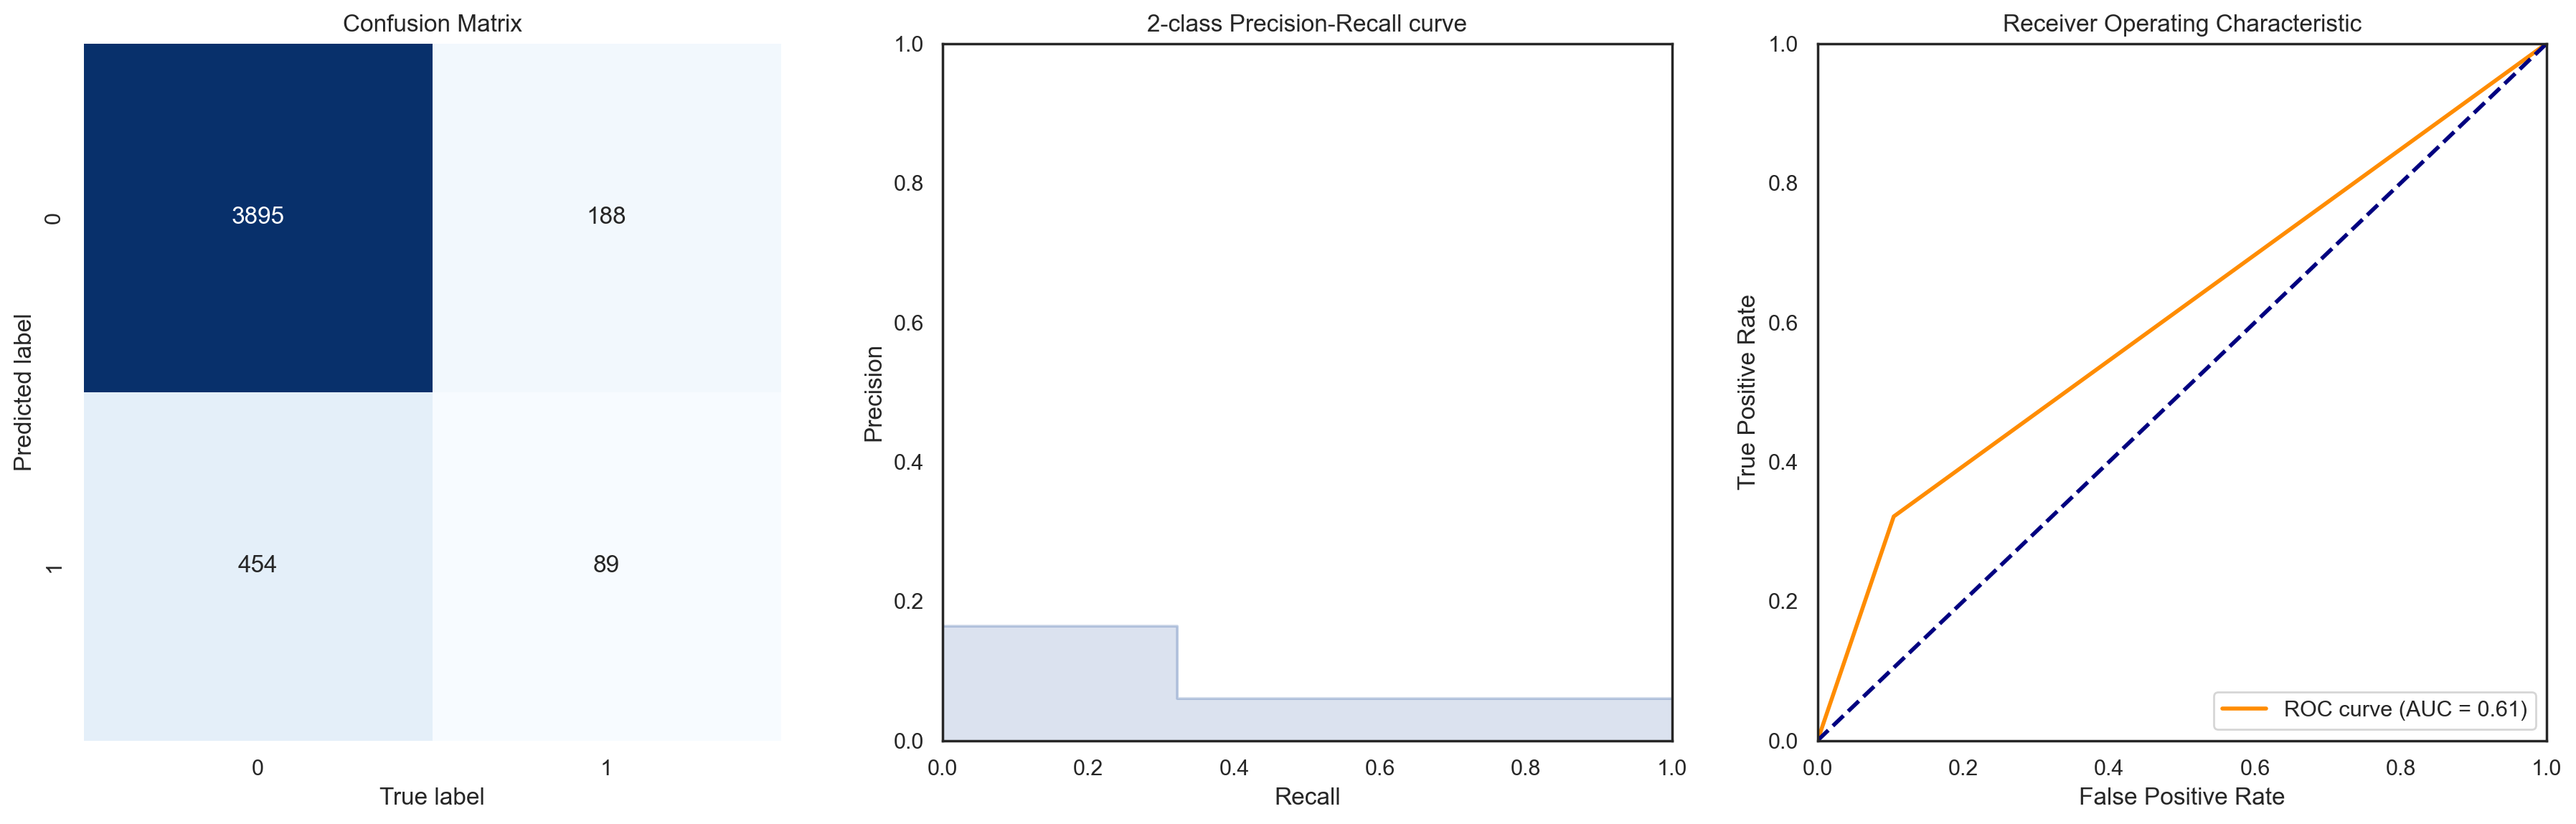

***********
* XGBoost *
***********
Accuracy : 0.7162 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.1311 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6643 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
F1_Score : 0.2189 [2 * Precision * Recall / (Precision + Recall)]                     Best: 1, Worst: 0
ROC AUC  : 0.6919                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
-----------------------------------------------------------------------------------------------------------
Using classification_report 
              precision    recall  f1-score   support

           0       0.97      0.72    

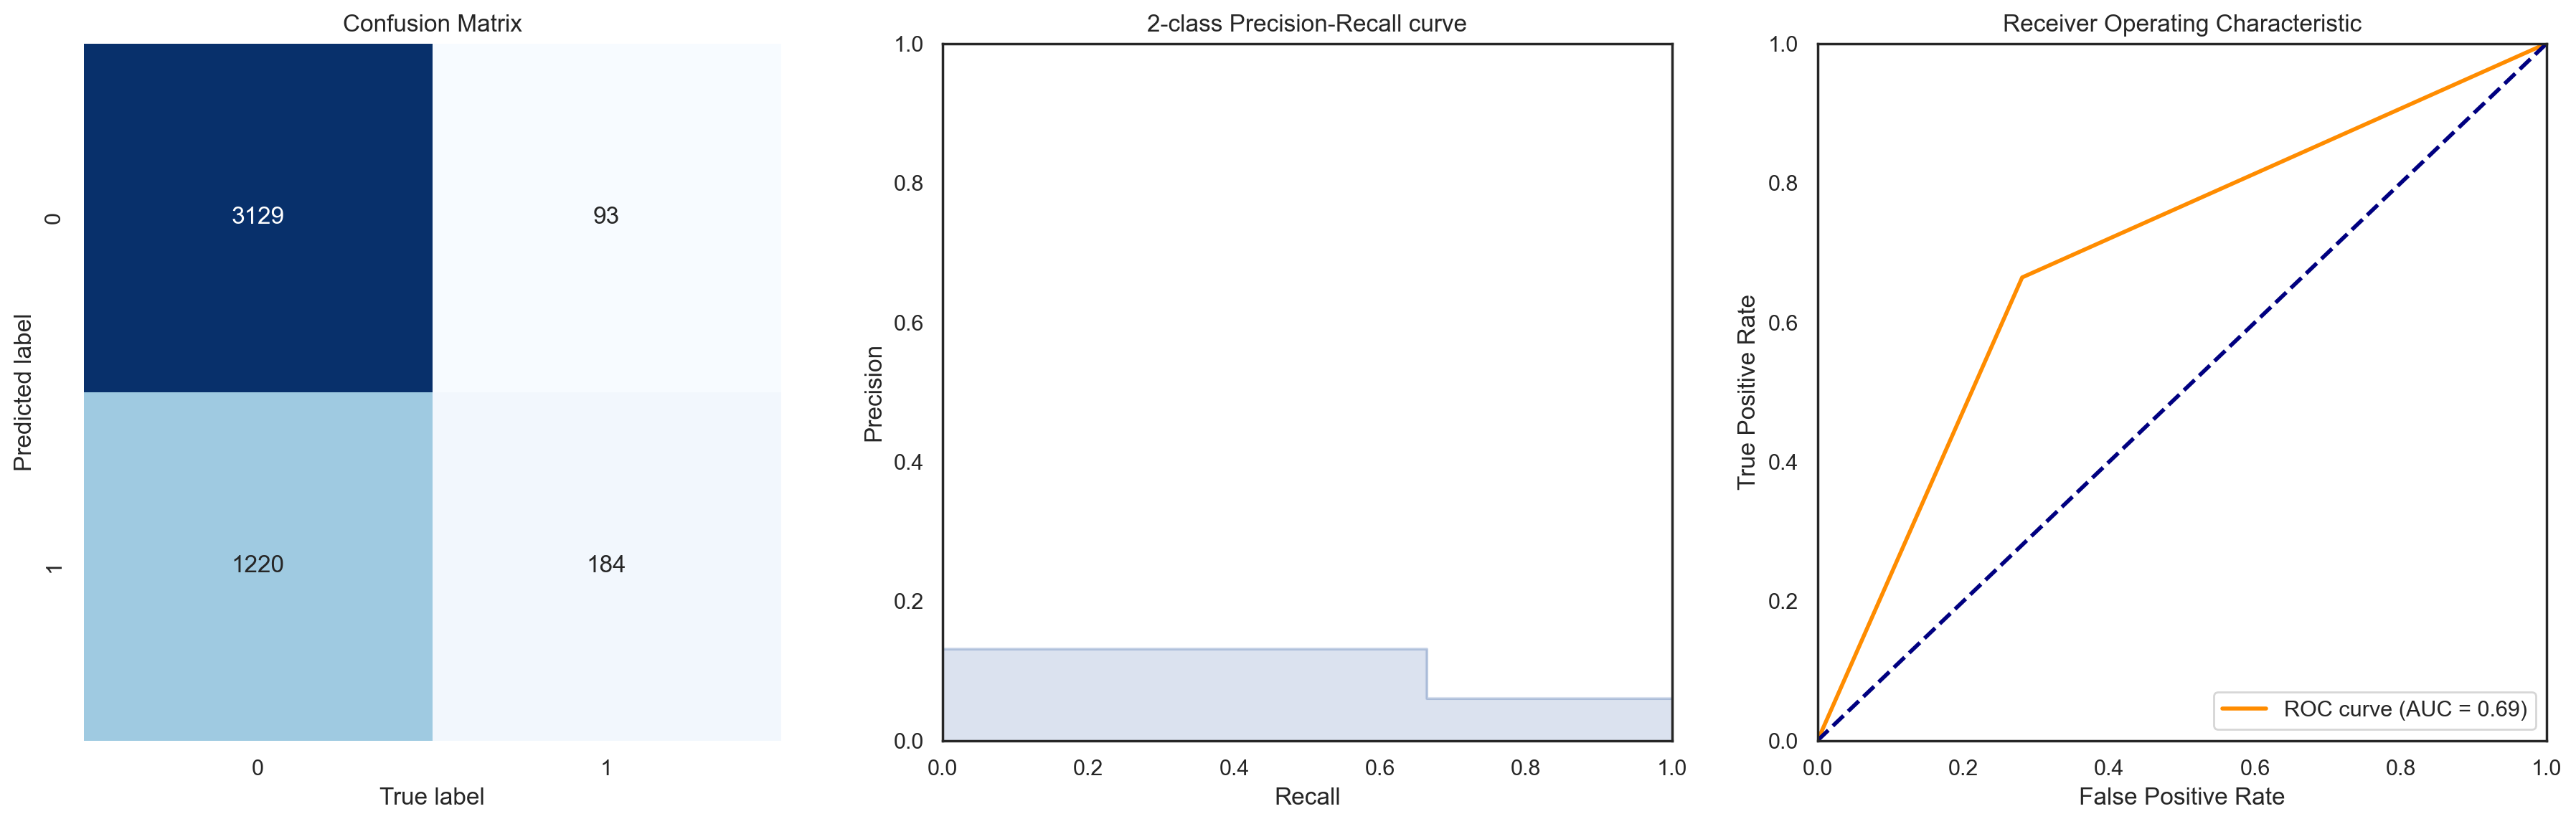

************
* Stacking *
************
Accuracy : 0.8612 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.1639 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.3213 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
F1_Score : 0.2171 [2 * Precision * Recall / (Precision + Recall)]                     Best: 1, Worst: 0
ROC AUC  : 0.6085                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
-----------------------------------------------------------------------------------------------------------
Using classification_report 
              precision    recall  f1-score   support

           0       0.95      0.90 

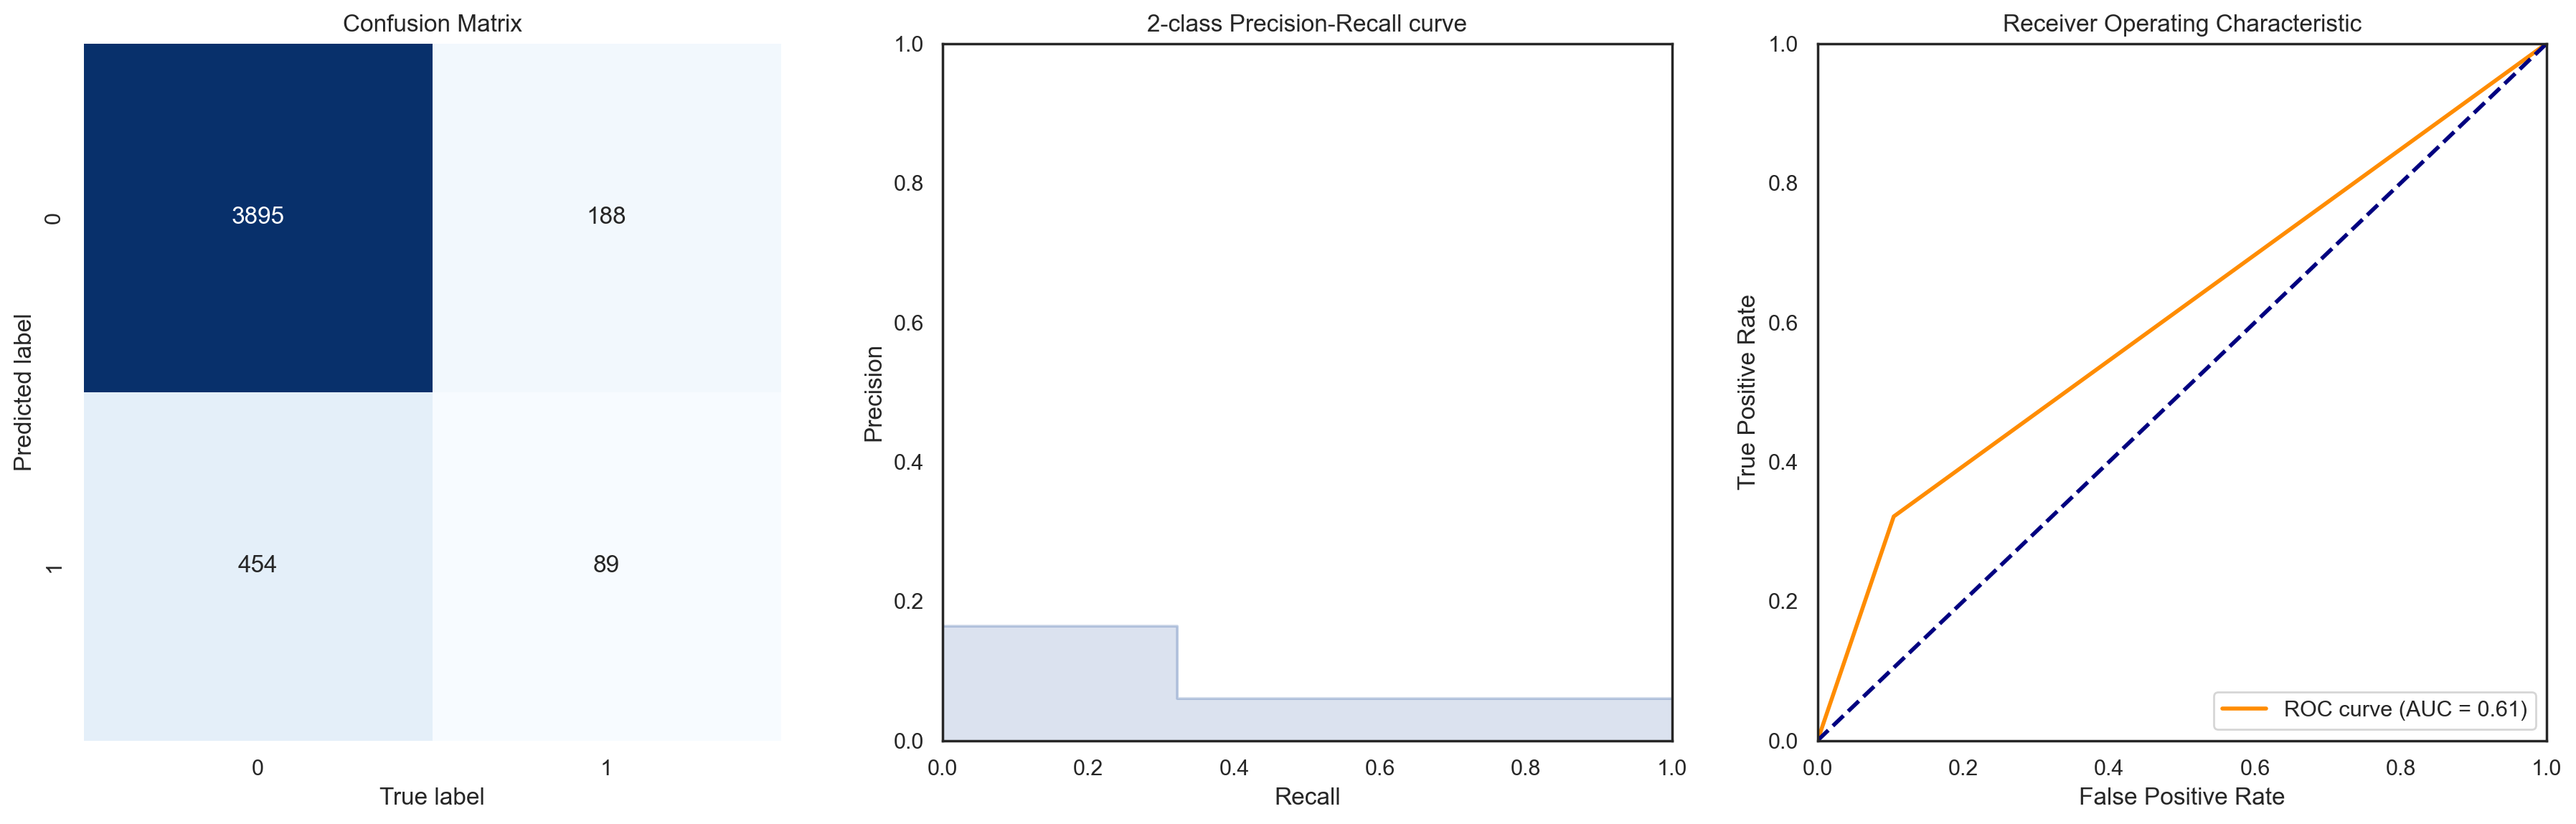


Final Results:

                    Model  Accuracy  Precision    Recall  F1_score   ROC_AUC
0     Logistic Regression  0.658452   0.130878  0.833935  0.226249  0.740605
1  Support Vector Machine  0.704064   0.138411  0.754513  0.233912  0.727682
2             Naive Bayes  0.936446   0.282051  0.039711  0.069620  0.516636
3                    K-NN  0.897319   0.151408  0.155235  0.153298  0.549910
4           Random Forest  0.861219   0.163904  0.321300  0.217073  0.608454
5                 XGBoost  0.716169   0.131054  0.664260  0.218917  0.691868
6                Stacking  0.861219   0.163904  0.321300  0.217073  0.608454


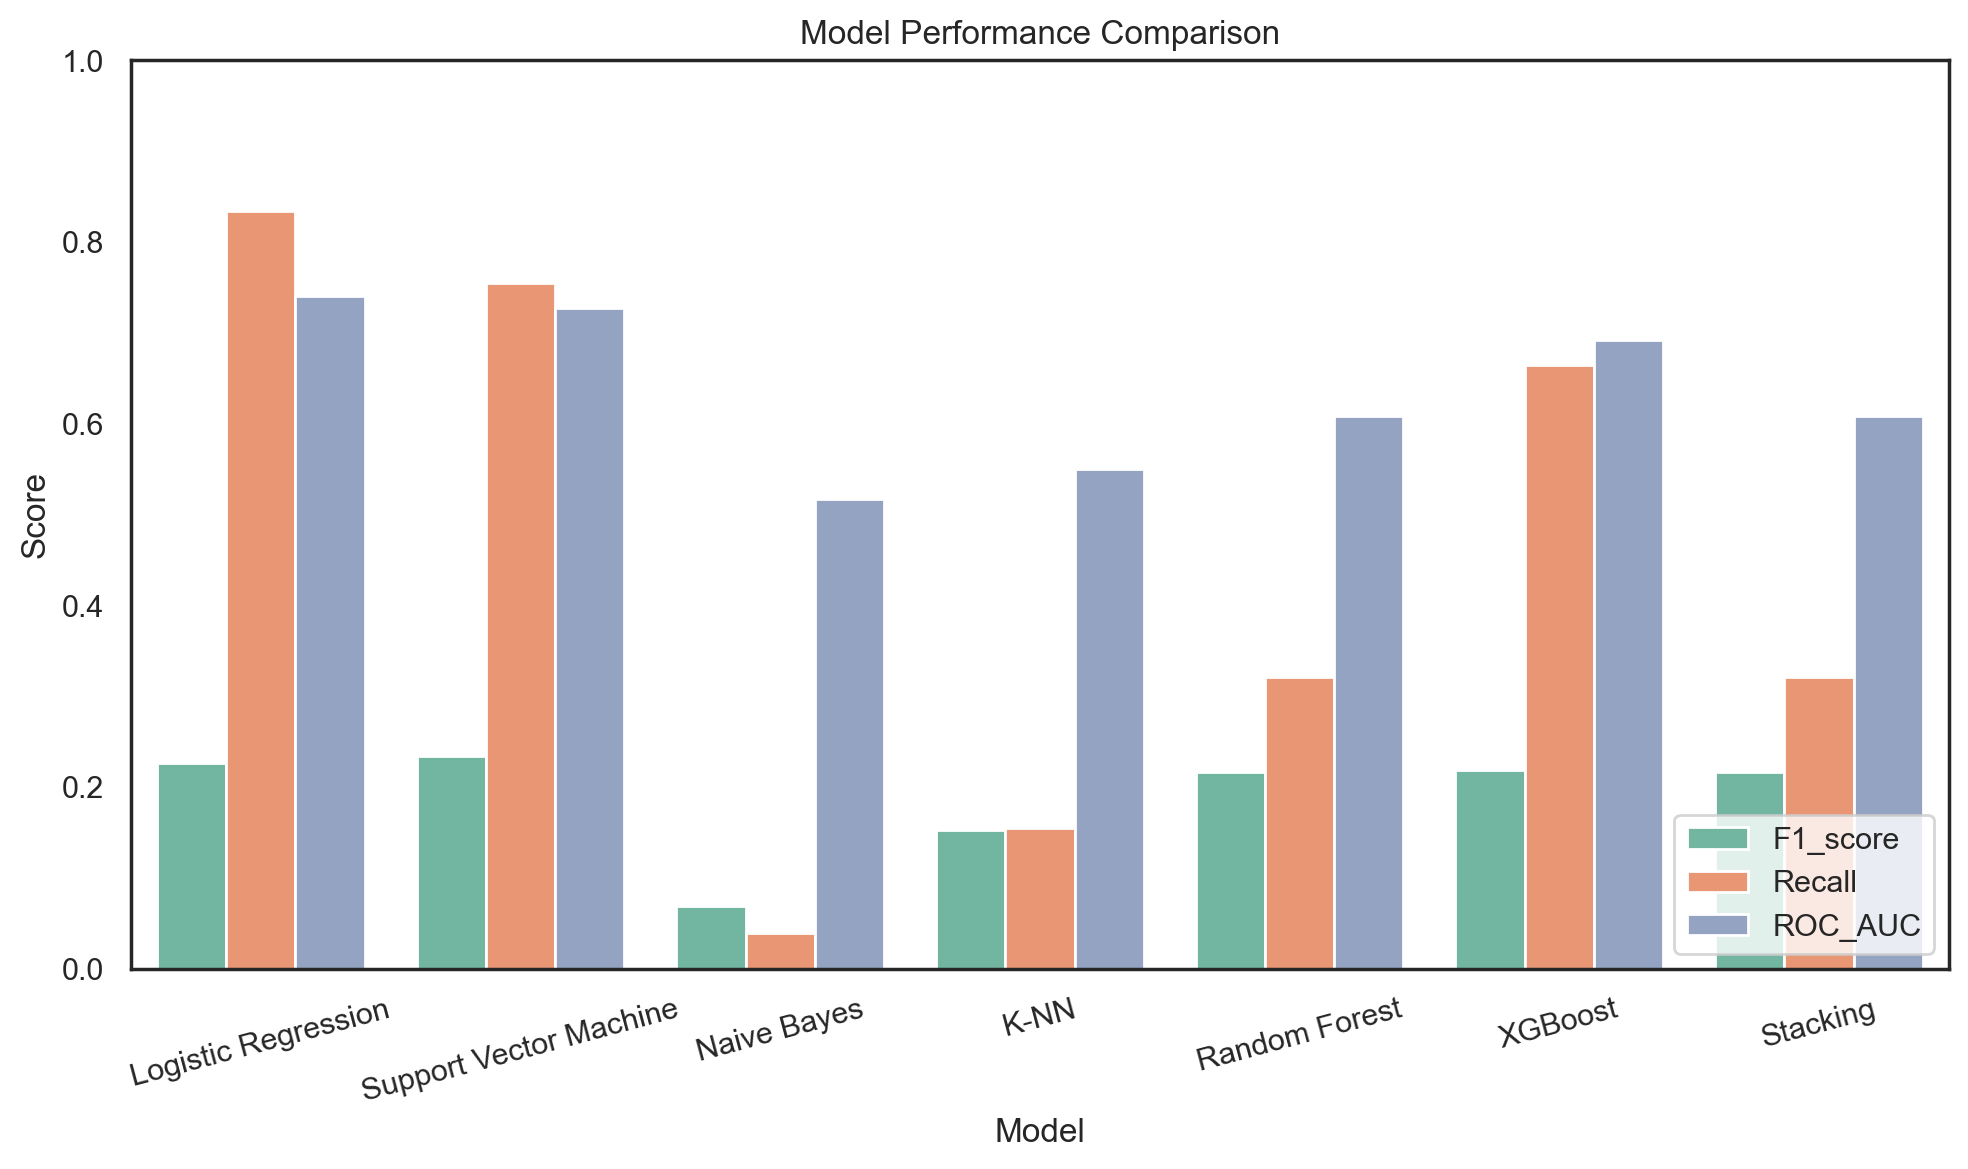

In [87]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall','F1_score', 'ROC_AUC'])

models = [ 'Logistic Regression', 'Support Vector Machine', 'Naive Bayes', 'K-NN', 'Random Forest', 'XGBoost', 'Stacking']
#models = [ 'Support Vector Machine']

#for i, m in enumerate([svc_model]):
for i, m in enumerate([lr_model, svc_model, nb_model, knn_model, rf_model, xgb_model, ens_model]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    #predictions_proba = m.predict_proba(X_test)[:,1]
    #predictions = (predictions_proba >= 0.5).astype(int)

    predictions = m.predict(X_test)
    
    # show the report
    accuracy_, precision_, recall_, f1_, roc_auc_ = show_summary_report(y_test, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i],
                      'Accuracy': accuracy_,
                      'Precision': precision_,
                      'Recall': recall_,
                      'F1_score': f1_,
                      'ROC_AUC': roc_auc_}
print('\nFinal Results:\n')
print(results)

# Plot the comparison
metrics = ['F1_score', 'Recall', 'ROC_AUC']
df_melted = results.melt(id_vars='Model', value_vars=metrics, var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='Set2')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### 5. Make Predictions
The model can be used to predict whether a claim is fraudulent or not.

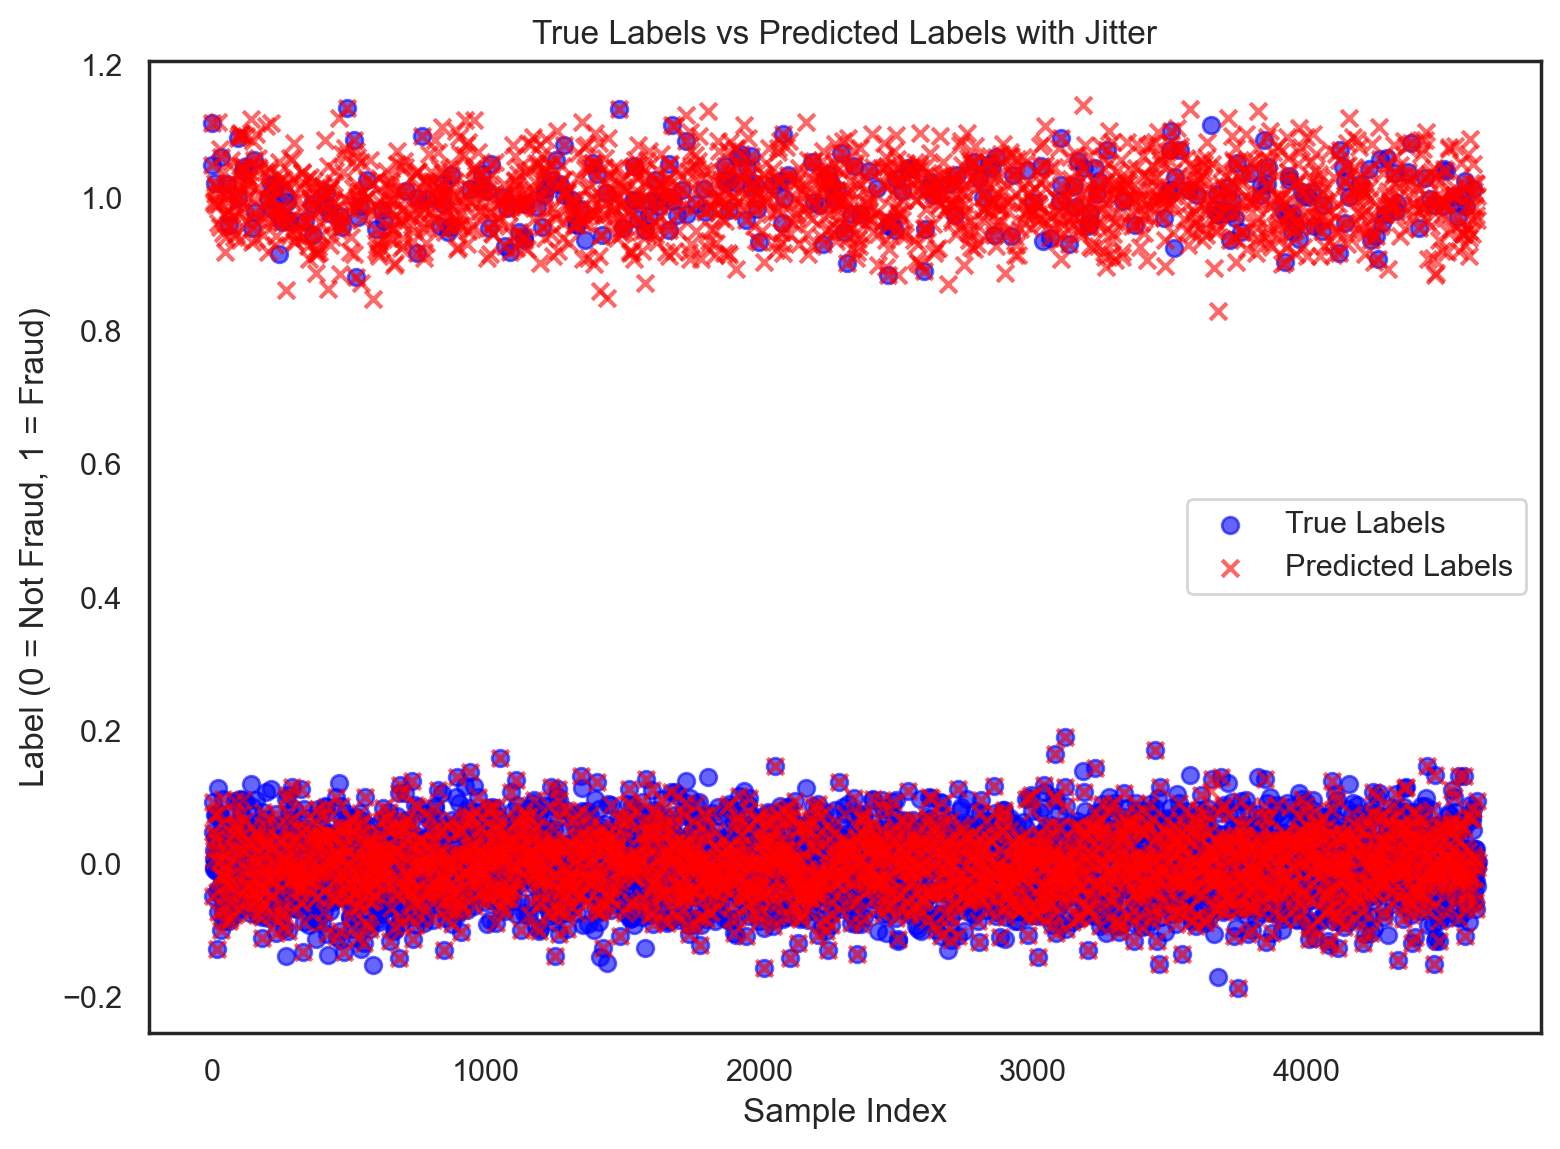

In [89]:
# Get the predictions from the model
predictions = lr_model.predict(X_test)

# Add a small jitter to the y-axis to spread out points for better visibility
jitter = np.random.normal(0, 0.05, size=len(y_test))  # Jitter with small noise

# Create a scatter plot with jitter
plt.figure(figsize=(8, 6))

# Plot true labels with blue color
plt.scatter(range(len(y_test)), y_test + jitter, color='blue', label="True Labels", alpha=0.6, marker='o')

# Plot predicted labels with red color
plt.scatter(range(len(y_test)), predictions + jitter, color='red', label="Predicted Labels", alpha=0.6, marker='x')

# Adding titles and labels
plt.title("True Labels vs Predicted Labels with Jitter")
plt.xlabel("Sample Index")
plt.ylabel("Label (0 = Not Fraud, 1 = Fraud)")

# Show legend
plt.legend()

# Display the plot
plt.show()


In [90]:
# Make Prediction

r = fraud_new_normalized.iloc[2]

for i, c in enumerate(fraud_new_normalized.columns[:-1]):
    print('%-27s: %d' % (c, int(r[i])))
print('%-27s: %s' % (fraud_new_normalized.columns[-1], 'Fraud' if r[-1] == 1 else 'NotFraud'))
print('%-27s: %s' % ('Prediction', 'Fraud' if predictions[2] == 1 else 'NotFraud'))

Fault                      : 0
Age                        : 0
DriverRating               : 0
BasePolicy                 : 0
AgeOfVehicle               : 0
PastNumberOfClaims_none    : 0
NumberOfSuppliments_none   : 1
FraudFound_P               : NotFraud
Prediction                 : NotFraud




---



---



> > > > > > > > > © 2025 Institute of Data


---



---



